Загрузка данных

In [1]:
import pandas as pd

# Загружаем файл Excel
file_path = 'лист 2 общее.xlsx'
try:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    print("Данные успешно загружены.")
except FileNotFoundError:
    print(f"Файл {file_path} не найден.")
    exit()

Данные успешно загружены.


Предобработка данных

In [ ]:
import pandas as pd
from openpyxl import load_workbook
Ф
# Загружаем данные
df = pd.read_excel('лист 2 общее.xlsx')

# Очистка данных
df.dropna(how="all", inplace=True)  # Удаляем полностью пустые строки
df.drop(columns=[col for col in df.columns if 'Дата' in col], inplace=True, errors='ignore')  # Удаляем столбцы с "Дата" в названии

# Преобразуем только числовые столбцы (не затрагиваем текстовые)
for col in df.columns:
    # Проверяем, что столбец состоит только из числовых значений
    if df[col].apply(lambda x: isinstance(x, (int, float))).all():
        # Преобразуем числовые значения, но оставляем значения, которые явно не являются датами
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Преобразуем числовые значения

# Сохраняем очищенные данные с новым именем в файл "Очищенные_данные.xlsx"
output_file = 'Очищенные_данные.xlsx'
df.to_excel(output_file, index=False)

# Настроим ширину столбцов в Excel
workbook = load_workbook(output_file)
sheet = workbook.active
for column in sheet.columns:
    max_length = 0
    column_letter = column[0].column_letter  # Определяем букву столбца
    for cell in column:
        try:
            max_length = max(max_length, len(str(cell.value)))
        except:
            pass
    adjusted_width = (max_length + 2) * 1.2  # Добавляем немного пространства
    sheet.column_dimensions[column_letter].width = adjusted_width
workbook.save(output_file)

print("Очищенные данные успешно сохранены в файл: Очищенные_данные.xlsx")



Очищенные данные успешно сохранены в файл: Очищенные_данные.xlsx


Добавление категорий для показателей

In [5]:
import pandas as pd

# Загрузка данных
input_file = 'Очищенные_данные.xlsx'
df = pd.read_excel(input_file)
df.columns = df.columns.str.strip()  # Убирает пробелы с начала и конца названий столбцов

# Функции классификации для разных показателей


def classify_blood_pressure(value):
    if value < 90:
        return "Низкое"
    elif 90 <= value <= 120:
        return "Нормальное"
    else:
        return "Высокое"

def classify_breathlessness(value):
    if value == 0:
        return "Отсутствует"
    elif value == 1:
        return "Легкая"
    elif value == 2:
        return "Умеренная"
    else:
        return "Тяжелая"

def classify_oxygen_saturation(value):
    if value < 96:
        return "Низкий"
    elif 90 <= value <= 95:
        return "Нормальный"
    else:
        return "Высокий"

def classify_heart_rate(value):
    if value < 60:
        return "Низкий"
    elif 60 <= value <= 100:
        return "Нормальный"
    else:
        return "Высокий"

def classify_respiratory_rate(value):
    if value < 12:
        return "Низкий"
    elif 12 <= value <= 20:
        return "Нормальный"
    else:
        return "Высокий"

def classify_systolic_blood_pressure(value):
    return classify_blood_pressure(value)

def classify_diastolic_blood_pressure(value):
    return classify_blood_pressure(value)

def classify_temperature(value):
    if value < 36.0:
        return "Гипотермия"
    elif 36.0 <= value <= 37.0:
        return "Нормальная температура"
    else:
        return "Лихорадка"

def classify_erythrocytes(value):
    if value < 3.8:
        return "Низкий уровень эритроцитов"
    elif 3.8 <= value <= 5.0:
        return "Нормальный уровень эритроцитов"
    else:
        return "Высокий уровень эритроцитов"

def classify_leukocytes(value):
    if value < 4.0:
        return "Низкий уровень лейкоцитов"
    elif 4.0 <= value <= 10.0:
        return "Нормальный уровень лейкоцитов"
    else:
        return "Высокий уровень лейкоцитов"

def classify_platelets(value):
    if value < 150:
        return "Низкий уровень тромбоцитов"
    elif 150 <= value <= 400:
        return "Нормальный уровень тромбоцитов"
    else:
        return "Высокий уровень тромбоцитов"

def classify_esr(value):
    if value < 10:
        return "Низкая СОЭ"
    elif 10 <= value <= 20:
        return "Нормальная СОЭ"
    else:
        return "Высокая СОЭ"

def classify_s_y(value):
    if value < 20:
        return "Низкий уровень С/Я%"
    elif 20 <= value <= 60:
        return "Нормальный уровень С/Я%"
    else:
        return "Высокий уровень С/Я%"

def classify_p_y(value):
    if value < 1:
        return "Низкий уровень п/я %"
    elif 1 <= value <= 6:
        return "Нормальный уровень п/я %"
    else:
        return "Высокий уровень п/я %"

def classify_lymphocytes(value):
    if value < 20:
        return "Низкий уровень лимфоцитов"
    elif 20 <= value <= 40:
        return "Нормальный уровень лимфоцитов"
    else:
        return "Высокий уровень лимфоцитов"

def classify_monocytes(value):
    if value < 2:
        return "Низкий уровень моноцитов"
    elif 2 <= value <= 8:
        return "Нормальный уровень моноцитов"
    else:
        return "Высокий уровень моноцитов"

def classify_eosinophils(value):
    if value < 1:
        return "Низкий уровень эозинофилов"
    elif 1 <= value <= 4:
        return "Нормальный уровень эозинофилов"
    else:
        return "Высокий уровень эозинофилов"

def classify_basophils(value):
    if value < 0.5:
        return "Низкий уровень базофилов"
    elif 0.5 <= value <= 1:
        return "Нормальный уровень базофилов"
    else:
        return "Высокий уровень базофилов"

def classify_urine_erythrocytes(value):
    if value == 0:
        return "Нет эритроцитов в моче"
    elif 1 <= value <= 3:
        return "Мало эритроцитов в моче"
    else:
        return "Много эритроцитов в моче"

def classify_urine_leukocytes(value):
    if value == 0:
        return "Нет лейкоцитов в моче"
    elif 1 <= value <= 5:
        return "Мало лейкоцитов в моче"
    else:
        return "Много лейкоцитов в моче"

def classify_acetone(value):
    if value < 0.3:
        return "Низкий уровень ацетона"
    elif 0.3 <= value <= 0.5:
        return "Нормальный уровень ацетона"
    else:
        return "Высокий уровень ацетона"

def classify_ph(value):
    if value < 7.35:
        return "Низкий уровень pH"
    elif 7.35 <= value <= 7.45:
        return "Нормальный уровень pH"
    else:
        return "Высокий уровень pH"

def classify_ast(value):
    if value < 15:
        return "Низкий уровень АСТ"
    elif 15 <= value <= 40:
        return "Нормальный уровень АСТ"
    else:
        return "Высокий уровень АСТ"

def classify_alt(value):
    if value < 10:
        return "Низкий уровень АЛТ"
    elif 10 <= value <= 40:
        return "Нормальный уровень АЛТ"
    else:
        return "Высокий уровень АЛТ"

def classify_glucose(value):
    if value < 3.5:
        return "Низкий уровень глюкозы"
    elif 3.5 <= value <= 5.5:
        return "Нормальный уровень глюкозы"
    else:
        return "Высокий уровень глюкозы"

def classify_urea(value):
    if value < 2.5:
        return "Низкий уровень мочевины"
    elif 2.5 <= value <= 8.0:
        return "Нормальный уровень мочевины"
    else:
        return "Высокий уровень мочевины"

def classify_bilirubin_direct(value):
    if value < 2:
        return "Низкий уровень прямого билирубина"
    elif 2 <= value <= 5:
        return "Нормальный уровень прямого билирубина"
    else:
        return "Высокий уровень прямого билирубина"

def classify_bilirubin_total(value):
    if value < 5:
        return "Низкий уровень общего билирубина"
    elif 5 <= value <= 17:
        return "Нормальный уровень общего билирубина"
    else:
        return "Высокий уровень общего билирубина"

def classify_crp(value):
    if value < 5:
        return "Низкий уровень СРБ"
    elif 5 <= value <= 10:
        return "Нормальный уровень СРБ"
    else:
        return "Высокий уровень СРБ"

def classify_ferritin(value):
    if value < 30:
        return "Низкий уровень ферритина"
    elif 30 <= value <= 150:
        return "Нормальный уровень ферритина"
    else:
        return "Высокий уровень ферритина"

def classify_aPTT(value):
    if value < 30:
        return "Низкий уровень АЧТВ"
    elif 30 <= value <= 45:
        return "Нормальный уровень АЧТВ"
    else:
        return "Высокий уровень АЧТВ"

def classify_d_dimer(value):
    if value < 0.5:
        return "Низкий уровень D-димера"
    elif 0.5 <= value <= 1.0:
        return "Нормальный уровень D-димера"
    else:
        return "Высокий уровень D-димера"

def classify_pti(value):
    if value < 70:
        return "Низкий ПТИ"
    elif 70 <= value <= 100:
        return "Нормальный ПТИ"
    else:
        return "Высокий ПТИ"

def classify_vit_d(value):
    if value < 20:
        return "Недостаток витамина D"
    elif 20 <= value <= 50:
        return "Нормальный уровень витамина D"
    else:
        return "Избыток витамина D"

def classify_fibrinogen(value):
    if value < 1.5:
        return "Низкий уровень фибриногена"
    elif 1.5 <= value <= 4.0:
        return "Нормальный уровень фибриногена"
    else:
        return "Высокий уровень фибриногена"
    
def classify_ptv(value):
    if value < 10:
        return "Низкий уровень ПТВ"
    elif 10 <= value <= 15:
        return "Нормальный уровень ПТВ"
    else:
        return "Высокий уровень ПТВ"

def classify_binary(value):
    if value == 0:
        return "Отсутствует"
    elif value == 1:
        return "Присутствует"
    else:
        return "Неопределено"

def classify_lung_damage(value):
    if value < 25:
        return "Низкий уровень поражения"
    elif 25 <= value <= 50:
        return "Умеренный уровень поражения"
    elif 50 < value <= 75:
        return "Высокий уровень поражения"
    else:
        return "Критическое поражение"

def classify_albumin(value):
    if value < 35:
        return "Низкий уровень альбумина"
    elif 35 <= value <= 50:
        return "Нормальный уровень альбумина"
    else:
        return "Высокий уровень альбумина"

# Креатинин мкм/л
def classify_creatinine(value):
    if value < 62:
        return "Низкий уровень креатинина"
    elif 62 <= value <= 115:
        return "Нормальный уровень креатинина"
    else:
        return "Высокий уровень креатинина"

# Белок
def classify_protein(value):
    if value < 60:
        return "Низкий уровень белка"
    elif 60 <= value <= 80:
        return "Нормальный уровень белка"
    else:
        return "Высокий уровень белка"

# Сахар (ммоль/л)
def classify_glucose(value):
    if value < 3.5:
        return "Низкий уровень сахара"
    elif 3.5 <= value <= 5.5:
        return "Нормальный уровень сахара"
    else:
        return "Высокий уровень сахара"


# Гемоглобин
def classify_hemoglobin(value):
    if value < 120:
        return "Низкий уровень гемоглобина"
    elif 120 <= value <= 160:
        return "Нормальный уровень гемоглобина"
    else:
        return "Высокий уровень гемоглобина"

# ЧДД (Частота дыхания в минутах)
def classify_respiratory_rate(value):
    if value < 12:
        return "Низкая частота дыхания"
    elif 12 <= value <= 20:
        return "Нормальная частота дыхания"
    else:
        return "Высокая частота дыхания"

# ЧСС (Частота сердечных сокращений в минуту)
def classify_heart_rate(value):
    if value < 60:
        return "Низкая частота сердечных сокращений"
    elif 60 <= value <= 100:
        return "Нормальная частота сердечных сокращений"
    else:
        return "Высокая частота сердечных сокращений"

# Sat O2 % (Сатурация кислорода в крови)
def classify_oxygen_saturation(value):
    if value < 90:
        return "Низкий уровень сатурации кислорода"
    elif 90 <= value <= 95:
        return "Нормальный уровень сатурации кислорода"
    else:
        return "Высокий уровень сатурации кислорода"





# Применение классификации ко всем столбцам и замена значений непосредственно в них
df['САД'] = df['САД'].apply(classify_systolic_blood_pressure)  # Систолическое давление
df['ДАД'] = df['ДАД'].apply(classify_diastolic_blood_pressure)  # Диастолическое давление
df['Температура тела'] = df['Температура тела'].apply(classify_temperature)  # Температура
df['Эритроциты'] = df['Эритроциты'].apply(classify_erythrocytes)  # Эритроциты
df['Лейкоциты'] = df['Лейкоциты'].apply(classify_leukocytes)  # Лейкоциты
df['Тромбоциты'] = df['Тромбоциты'].apply(classify_platelets)  # Тромбоциты
df['СОЭ мм/ч'] = df['СОЭ мм/ч'].apply(classify_esr)  # СОЭ
df['С/Я%'] = df['С/Я%'].apply(classify_s_y)  # С/Я%
df['п/я %'] = df['п/я %'].apply(classify_p_y)  # П/Я%
df['Лимфоциты'] = df['Лимфоциты'].apply(classify_lymphocytes)  # Лимфоциты
df['Моноциты %'] = df['Моноциты %'].apply(classify_monocytes)  # Моноциты
df['Эозифилы %'] = df['Эозифилы %'].apply(classify_eosinophils)  # Эозинофилы
df['Базофилы %'] = df['Базофилы %'].apply(classify_basophils)  # Базофилы
df['Моча эритроциты'] = df['Моча эритроциты'].apply(classify_urine_erythrocytes)  # Моча эритроциты
df['Моча лейкоциты'] = df['Моча лейкоциты'].apply(classify_urine_leukocytes)  # Моча лейкоциты
df['Ацетон ммоль/л'] = df['Ацетон ммоль/л'].apply(classify_acetone)  # Ацетон
df['РН'] = df['РН'].apply(classify_ph)  # РН
df['АСТ'] = df['АСТ'].apply(classify_ast)  # АСТ
df['АЛТ'] = df['АЛТ'].apply(classify_alt)  # АЛТ
df['Глюкоза ммоль/л'] = df['Глюкоза ммоль/л'].apply(classify_glucose)  # Глюкоза
df['Мочевина ммоль/л'] = df['Мочевина ммоль/л'].apply(classify_urea)  # Мочевина
df['Бил прямой мкм/л'] = df['Бил прямой мкм/л'].apply(classify_bilirubin_direct)  # Прямой билирубин
df['Бил общий мкм/л'] = df['Бил общий мкм/л'].apply(classify_bilirubin_total)  # Общий билирубин
df['СРБ мг/л'] = df['СРБ мг/л'].apply(classify_crp)  # СРБ
df['Ферритин нг/л'] = df['Ферритин нг/л'].apply(classify_ferritin)  # Ферритин
df['АЧТВ, с'] = df['АЧТВ, с'].apply(classify_aPTT)  # АЧТВ
df['Концентрация D-димера'] = df['Концентрация D-димера'].apply(classify_d_dimer)  # D-димер
df['ПТИ %'] = df['ПТИ %'].apply(classify_pti)  # ПТИ
df['Фибриноген, г/л'] = df['Фибриноген, г/л'].apply(classify_fibrinogen)  # Фибриноген
df['ПТВ, с'] = df['ПТВ, с'].apply(classify_ptv)  # ПТВ
df['Инсуфляция'] = df['Инсуфляция'].apply(classify_binary)  # Инсуфляция
df['ИВЛ'] = df['ИВЛ'].apply(classify_binary)  # ИВЛ
df['Антибиотики'] = df['Антибиотики'].apply(classify_binary)  # Антибиотики
df['Гормоны'] = df['Гормоны'].apply(classify_binary)  # Гормоны
df['Пневмония'] = df['Пневмония'].apply(classify_binary)  # Пневмония
df['Объем поражения легких %'] = df['Объем поражения легких %'].apply(classify_lung_damage)  # Поражение легких
df['Альбумин'] = df['Альбумин'].apply(classify_albumin)  # Альбумин
df['Креатинин мкм/л'] = df['Креатинин мкм/л'].apply(classify_creatinine)  # Креатинин
df['Белок'] = df['Белок'].apply(classify_protein)  # Белок
df['Сахар ммоль/л'] = df['Сахар ммоль/л'].apply(classify_glucose)  # Сахар ммоль/л
df['Гемоглобин'] = df['Гемоглобин'].apply(classify_hemoglobin)  # Гемоглобин
df['ЧДД'] = df['ЧДД'].apply(classify_respiratory_rate)  # ЧДД
df['ЧСС'] = df['ЧСС'].apply(classify_heart_rate)  # ЧСС
df['Sat O2 %'] = df['Sat O2 %'].apply(classify_oxygen_saturation)  # Sat O2 %





# Сохранение результатов в новый файл
df.to_excel('Очищенные_данные_с_классификацией.xlsx', index=False)


Для женщин

In [ ]:
import pandas as pd

# Загрузка данных
input_file = 'Очищенные_данные.xlsx'
df = pd.read_excel(input_file)
df.columns = df.columns.str.strip()  # Убирает пробелы с начала и конца названий столбцов
df = df[df['Пол'] == 1]

# Функции классификации для разных показателей

#Отдышка
def classify_breathlessness(value):
    if value == 1:
        return "Отсутствует"
    elif value == 2:
        return "При физической нагрузке"
    else:
        return "В покое"
#Температура тела
def classify_temperature(value):
    if value < 36.0 or value > 37.0:
        return "Референсные значения"
    else:
        return "Нереференсные значения"
#Эритроциты
def classify_erythrocytes(value):
    if value < 3.6 or value > 4.6:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Лейкоциты
def classify_leukocytes(value):
    if value < 4.0 or value > 9.0:
        return "Нереференсные значения"
    else:
        return "Референсные значения"
    
# Гемоглобин
def classify_hemoglobin(value):
    if value < 128 or value >150:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Тромбоциты
def classify_platelets(value):
    if value < 178 or value >218:
        return "Нереференсные значения"
    else:
        return "Референсные значения"
    
#СОЭ
def classify_esr(value):
    if value < 2 or value > 16:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#C/Я%
def classify_s_y(value):
    if value < 43 or value > 71:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#П/Я%
def classify_p_y(value):
    if value < 1 or value > 5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Лимфоциты
def classify_lymphocytes(value):
    if value < 17 or value > 38:
        return "Нереференсные значения"
    else:
        return "Референсные значения"
    
#Моноциты   
def classify_monocytes(value):
    if value <3 or value > 12:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Эозинофилы
def classify_eosinophils(value):
    if value < 0.5 or value > 5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Базофилы ???(уточнить)
def classify_basophils(value):
    if value < 0 or value >1:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Эритроциты в моче ??? (уточнить)
def classify_urine_erythrocytes(value):
    if value > 3:
        return "Нереференсные значения"
    else:
        return "Референсные значения"


#Лейкоциты в моче
def classify_urine_leukocytes(value):
    if value > 6:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Ацетон (уточнить)
def classify_acetone(value):
    if value > 0.0:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#ph показатель
def classify_ph(value):
    if value == 0:
        return "Кис."
    elif value == 1:
        return "Нейт."
    else:
        return "Щелоч."

#АСТ
def classify_ast(value):
    if value > 31:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#АЛТ
def classify_alt(value):
    if value > 31:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Глюкоза
def classify_glucose(value):
    if value < 3.3 or value > 5.5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Мочевина
def classify_urea(value):
    if value < 2.5 or value > 8.3:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Билирубин прямой
def classify_bilirubin_direct(value):
    if value > 5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Билирубин общий
def classify_bilirubin_total(value):
    if value < 3.5 or value > 21:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#СРБ
def classify_crp(value):
    if value < 1 or value >5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Ферритин
def classify_ferritin(value):
    if value < 10 or value > 200:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#АЧТВ, с
def classify_aPTT(value):
    if value < 22.5 or value > 33.5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Д-димер
def classify_d_dimer(value):
    if value < 250 or value > 500:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#ПТИ %
def classify_pti(value):
    if value < 73 or value > 122:
        return "Нереференсные значения"
    else:
        return "Референсные значения"


#Фибриноген
def classify_fibrinogen(value):
    if value < 2 or value >4:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#ПТВ, с
def classify_ptv(value):
    if value < 11 or value > 15:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Инсуфляция
def classify_infulation(value):
    if value == 0:
        return "Отсутствует"
    else:
        return "Присутствует"
    
#ИВЛ
def classify_ivl(value):
    if value == 0:
        return "Отсутствует"
    else:
        return "Присутствует"

#Антибиотики
def classify_antibiotic(value):
    if value == 0:
        return "Нет"
    else:
        return "Да"

#Гормоны
def classify_hormones(value):
    if value == 0:
        return "Отсутствует"
    else:
        return "Присутствует"

#Процент поражения легких
def classify_lung_damage(value):
    if value == 0:
        return "КТ0, отсутствует поражение"
    elif 0 < value <= 25:
        return "КТ1, легкая форма"
    elif 25 < value <= 50:
        return "КТ2, умеренная форма"
    elif 50 < value <= 75:
        return "КТ3, среднетяжелая форма"
    else:
        return "Тяжелая форма"

#Пневмония
def classify_pnevmonia(value):
    if value == 0:
        return "Нет"
    elif value == 1:
        return "Односторонняя"
    elif value == 2:
        return "Двухсторонняя"
    else:
        return "Присутствует"


#Альбумин
def classify_albumin(value):
    if value < 35 or value > 50:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Креатинин мкм/л
def classify_creatinine(value):
    if value < 53 or value > 97:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Белок в моче
def classify_protein(value):
    if value > 0.03:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Сахар (ммоль/л) в моче
def classify_glucose(value):
    if value > 0.8:
        return "Нереференсные значения"
    else:
        return "Референсные значения"


# ЧДД (Частота дыхания в минутах)
def classify_respiratory_rate(value):
    if value < 16 or value >20:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# ЧСС (Частота сердечных сокращений в минуту при госпитализации)
def classify_heart_rate(value):
    if value < 60 or value >80:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Sat O2 % (Сатурация кислорода в крови)
def classify_oxygen_saturation(value):
    if value <= 94:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#САД
def classify_systolic_blood_pressure(value):
    if value <120 or value >20:
      return "Нереференсные значения"
    else:
        return "Референсные значения"

#ДАД
def classify_diastolic_blood_pressure(value):
    if value <75 or value > 80:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Применение классификации ко всем столбцам и замена значений непосредственно в них
df['САД'] = df['САД'].apply(classify_systolic_blood_pressure)  # Систолическое давление
df['ДАД'] = df['ДАД'].apply(classify_diastolic_blood_pressure)  # Диастолическое давление
df['Температура тела'] = df['Температура тела'].apply(classify_temperature)  # Температура
df['Эритроциты'] = df['Эритроциты'].apply(classify_erythrocytes)  # Эритроциты
df['Лейкоциты'] = df['Лейкоциты'].apply(classify_leukocytes)  # Лейкоциты
df['Тромбоциты'] = df['Тромбоциты'].apply(classify_platelets)  # Тромбоциты
df['СОЭ мм/ч'] = df['СОЭ мм/ч'].apply(classify_esr)  # СОЭ
df['С/Я%'] = df['С/Я%'].apply(classify_s_y)  # С/Я%
df['п/я %'] = df['п/я %'].apply(classify_p_y)  # П/Я%
df['Лимфоциты'] = df['Лимфоциты'].apply(classify_lymphocytes)  # Лимфоциты
df['Моноциты %'] = df['Моноциты %'].apply(classify_monocytes)  # Моноциты
df['Эозифилы %'] = df['Эозифилы %'].apply(classify_eosinophils)  # Эозинофилы
df['Базофилы %'] = df['Базофилы %'].apply(classify_basophils)  # Базофилы
df['Моча эритроциты'] = df['Моча эритроциты'].apply(classify_urine_erythrocytes)  # Моча эритроциты
df['Моча лейкоциты'] = df['Моча лейкоциты'].apply(classify_urine_leukocytes)  # Моча лейкоциты
df['Ацетон ммоль/л'] = df['Ацетон ммоль/л'].apply(classify_acetone)  # Ацетон
df['РН'] = df['РН'].apply(classify_ph)  # РН
df['АСТ'] = df['АСТ'].apply(classify_ast)  # АСТ
df['АЛТ'] = df['АЛТ'].apply(classify_alt)  # АЛТ
df['Глюкоза ммоль/л'] = df['Глюкоза ммоль/л'].apply(classify_glucose)  # Глюкоза
df['Мочевина ммоль/л'] = df['Мочевина ммоль/л'].apply(classify_urea)  # Мочевина
df['Бил прямой мкм/л'] = df['Бил прямой мкм/л'].apply(classify_bilirubin_direct)  # Прямой билирубин
df['Бил общий мкм/л'] = df['Бил общий мкм/л'].apply(classify_bilirubin_total)  # Общий билирубин
df['СРБ мг/л'] = df['СРБ мг/л'].apply(classify_crp)  # СРБ
df['Ферритин нг/л'] = df['Ферритин нг/л'].apply(classify_ferritin)  # Ферритин
df['АЧТВ, с'] = df['АЧТВ, с'].apply(classify_aPTT)  # АЧТВ
df['Концентрация D-димера'] = df['Концентрация D-димера'].apply(classify_d_dimer)  # D-димер
df['ПТИ %'] = df['ПТИ %'].apply(classify_pti)  # ПТИ
df['Фибриноген, г/л'] = df['Фибриноген, г/л'].apply(classify_fibrinogen)  # Фибриноген
df['ПТВ, с'] = df['ПТВ, с'].apply(classify_ptv)  # ПТВ
df['Инсуфляция'] = df['Инсуфляция'].apply(classify_infulation)  # Инсуфляция
df['ИВЛ'] = df['ИВЛ'].apply(classify_ivl)  # ИВЛ
df['Антибиотики'] = df['Антибиотики'].apply(classify_antibiotic)  # Антибиотики
df['Гормоны'] = df['Гормоны'].apply(classify_hormones)  # Гормоны
df['Пневмония'] = df['Пневмония'].apply(classify_pnevmonia)  # Пневмония
df['Объем поражения легких %'] = df['Объем поражения легких %'].apply(classify_lung_damage)  # Поражение легких
df['Альбумин'] = df['Альбумин'].apply(classify_albumin)  # Альбумин
df['Креатинин мкм/л'] = df['Креатинин мкм/л'].apply(classify_creatinine)  # Креатинин
df['Белок'] = df['Белок'].apply(classify_protein)  # Белок
df['Сахар ммоль/л'] = df['Сахар ммоль/л'].apply(classify_glucose)  # Сахар ммоль/л
df['Гемоглобин'] = df['Гемоглобин'].apply(classify_hemoglobin)  # Гемоглобин
df['ЧДД'] = df['ЧДД'].apply(classify_respiratory_rate)  # ЧДД
df['ЧСС'] = df['ЧСС'].apply(classify_heart_rate)  # ЧСС
df['Sat O2 %'] = df['Sat O2 %'].apply(classify_oxygen_saturation)  # Sat O2 %





# Сохранение результатов в новый файл
df.to_excel('Очищенные_данные_с_классификацией_женщины.xlsx', index=False)


Для мужчин

In [ ]:
import pandas as pd

# Загрузка данных
input_file = 'Очищенные_данные.xlsx'
df = pd.read_excel(input_file)
df.columns = df.columns.str.strip()  # Убирает пробелы с начала и конца названий столбцов
df = df[df['Пол'] == 0]

# Функции классификации для разных показателей

#Отдышка
def classify_breathlessness(value):
    if value == 1:
        return "Отсутствует"
    elif value == 2:
        return "При физической нагрузке"
    else:
        return "В покое"
#Температура тела
def classify_temperature(value):
    if value < 36.0 or value > 37.0:
        return "Референсные значения"
    else:
        return "Нереференсные значения"
#Эритроциты
def classify_erythrocytes(value):
    if value < 4.1 or value > 5.2:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Лейкоциты
def classify_leukocytes(value):
    if value < 4.0 or value > 9.0:
        return "Нереференсные значения"
    else:
        return "Референсные значения"
    
# Гемоглобин
def classify_hemoglobin(value):
    if value < 128 or value >150:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Тромбоциты
def classify_platelets(value):
    if value < 178 or value >218:
        return "Нереференсные значения"
    else:
        return "Референсные значения"
    
#СОЭ
def classify_esr(value):
    if value < 2 or value > 10:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#C/Я%
def classify_s_y(value):
    if value < 43 or value > 71:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#П/Я%
def classify_p_y(value):
    if value < 1 or value > 5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Лимфоциты
def classify_lymphocytes(value):
    if value < 17 or value > 38:
        return "Нереференсные значения"
    else:
        return "Референсные значения"
    
#Моноциты   
def classify_monocytes(value):
    if value <3 or value > 12:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Эозинофилы
def classify_eosinophils(value):
    if value < 0.5 or value > 5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Базофилы ???(уточнить)
def classify_basophils(value):
    if value < 0 or value >1:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Эритроциты в моче ??? (уточнить)
def classify_urine_erythrocytes(value):
    if value > 1:
        return "Нереференсные значения"
    else:
        return "Референсные значения"


#Лейкоциты в моче
def classify_urine_leukocytes(value):
    if value > 3:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Ацетон (уточнить)
def classify_acetone(value):
    if value > 0.0:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#ph показатель
def classify_ph(value):
    if value == 0:
        return "Кис."
    elif value == 1:
        return "Нейт."
    else:
        return "Щелоч."

#АСТ
def classify_ast(value):
    if value > 45:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#АЛТ
def classify_alt(value):
    if value > 45:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Глюкоза
def classify_glucose(value):
    if value < 3.3 or value > 5.5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Мочевина
def classify_urea(value):
    if value < 2.5 or value > 8.3:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Билирубин прямой
def classify_bilirubin_direct(value):
    if value > 5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Билирубин общий
def classify_bilirubin_total(value):
    if value < 3.5 or value > 21:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#СРБ
def classify_crp(value):
    if value < 1 or value >5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Ферритин
def classify_ferritin(value):
    if value < 20 or value > 250:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#АЧТВ, с
def classify_aPTT(value):
    if value < 22.5 or value > 33.5:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Д-димер
def classify_d_dimer(value):
    if value < 250 or value > 500:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#ПТИ %
def classify_pti(value):
    if value < 73 or value > 122:
        return "Нереференсные значения"
    else:
        return "Референсные значения"


#Фибриноген
def classify_fibrinogen(value):
    if value < 2 or value >4:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#ПТВ, с
def classify_ptv(value):
    if value < 11 or value > 15:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#Инсуфляция
def classify_infulation(value):
    if value == 0:
        return "Отсутствует"
    else:
        return "Присутствует"
    
#ИВЛ
def classify_ivl(value):
    if value == 0:
        return "Отсутствует"
    else:
        return "Присутствует"

#Антибиотики
def classify_antibiotic(value):
    if value == 0:
        return "Нет"
    else:
        return "Да"

#Гормоны
def classify_hormones(value):
    if value == 0:
        return "Отсутствует"
    else:
        return "Присутствует"

#Процент поражения легких
def classify_lung_damage(value):
    if value == 0:
        return "КТ0, отсутствует поражение"
    elif 0 < value <= 25:
        return "КТ1, легкая форма"
    elif 25 < value <= 50:
        return "КТ2, умеренная форма"
    elif 50 < value <= 75:
        return "КТ3, среднетяжелая форма"
    else:
        return "Тяжелая форма"

#Пневмония
def classify_pnevmonia(value):
    if value == 0:
        return "Нет"
    elif value == 1:
        return "Односторонняя"
    elif value == 2:
        return "Двухсторонняя"
    else:
        return "Присутствует"


#Альбумин
def classify_albumin(value):
    if value < 35 or value > 50:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Креатинин мкм/л
def classify_creatinine(value):
    if value < 62 or value > 115:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Белок в моче
def classify_protein(value):
    if value > 0.03:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Сахар (ммоль/л) в моче
def classify_glucose(value):
    if value > 0.8:
        return "Нереференсные значения"
    else:
        return "Референсные значения"


# ЧДД (Частота дыхания в минутах)
def classify_respiratory_rate(value):
    if value < 16 or value >20:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# ЧСС (Частота сердечных сокращений в минуту при госпитализации)
def classify_heart_rate(value):
    if value < 60 or value >80:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Sat O2 % (Сатурация кислорода в крови)
def classify_oxygen_saturation(value):
    if value <= 94:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

#САД
def classify_systolic_blood_pressure(value):
    if value <120 or value >20:
      return "Нереференсные значения"
    else:
        return "Референсные значения"

#ДАД
def classify_diastolic_blood_pressure(value):
    if value <75 or value > 80:
        return "Нереференсные значения"
    else:
        return "Референсные значения"

# Применение классификации ко всем столбцам и замена значений непосредственно в них
df['САД'] = df['САД'].apply(classify_systolic_blood_pressure)  # Систолическое давление
df['ДАД'] = df['ДАД'].apply(classify_diastolic_blood_pressure)  # Диастолическое давление
df['Температура тела'] = df['Температура тела'].apply(classify_temperature)  # Температура
df['Эритроциты'] = df['Эритроциты'].apply(classify_erythrocytes)  # Эритроциты
df['Лейкоциты'] = df['Лейкоциты'].apply(classify_leukocytes)  # Лейкоциты
df['Тромбоциты'] = df['Тромбоциты'].apply(classify_platelets)  # Тромбоциты
df['СОЭ мм/ч'] = df['СОЭ мм/ч'].apply(classify_esr)  # СОЭ
df['С/Я%'] = df['С/Я%'].apply(classify_s_y)  # С/Я%
df['п/я %'] = df['п/я %'].apply(classify_p_y)  # П/Я%
df['Лимфоциты'] = df['Лимфоциты'].apply(classify_lymphocytes)  # Лимфоциты
df['Моноциты %'] = df['Моноциты %'].apply(classify_monocytes)  # Моноциты
df['Эозифилы %'] = df['Эозифилы %'].apply(classify_eosinophils)  # Эозинофилы
df['Базофилы %'] = df['Базофилы %'].apply(classify_basophils)  # Базофилы
df['Моча эритроциты'] = df['Моча эритроциты'].apply(classify_urine_erythrocytes)  # Моча эритроциты
df['Моча лейкоциты'] = df['Моча лейкоциты'].apply(classify_urine_leukocytes)  # Моча лейкоциты
df['Ацетон ммоль/л'] = df['Ацетон ммоль/л'].apply(classify_acetone)  # Ацетон
df['РН'] = df['РН'].apply(classify_ph)  # РН
df['АСТ'] = df['АСТ'].apply(classify_ast)  # АСТ
df['АЛТ'] = df['АЛТ'].apply(classify_alt)  # АЛТ
df['Глюкоза ммоль/л'] = df['Глюкоза ммоль/л'].apply(classify_glucose)  # Глюкоза
df['Мочевина ммоль/л'] = df['Мочевина ммоль/л'].apply(classify_urea)  # Мочевина
df['Бил прямой мкм/л'] = df['Бил прямой мкм/л'].apply(classify_bilirubin_direct)  # Прямой билирубин
df['Бил общий мкм/л'] = df['Бил общий мкм/л'].apply(classify_bilirubin_total)  # Общий билирубин
df['СРБ мг/л'] = df['СРБ мг/л'].apply(classify_crp)  # СРБ
df['Ферритин нг/л'] = df['Ферритин нг/л'].apply(classify_ferritin)  # Ферритин
df['АЧТВ, с'] = df['АЧТВ, с'].apply(classify_aPTT)  # АЧТВ
df['Концентрация D-димера'] = df['Концентрация D-димера'].apply(classify_d_dimer)  # D-димер
df['ПТИ %'] = df['ПТИ %'].apply(classify_pti)  # ПТИ
df['Фибриноген, г/л'] = df['Фибриноген, г/л'].apply(classify_fibrinogen)  # Фибриноген
df['ПТВ, с'] = df['ПТВ, с'].apply(classify_ptv)  # ПТВ
df['Инсуфляция'] = df['Инсуфляция'].apply(classify_infulation)  # Инсуфляция
df['ИВЛ'] = df['ИВЛ'].apply(classify_ivl)  # ИВЛ
df['Антибиотики'] = df['Антибиотики'].apply(classify_antibiotic)  # Антибиотики
df['Гормоны'] = df['Гормоны'].apply(classify_hormones)  # Гормоны
df['Пневмония'] = df['Пневмония'].apply(classify_pnevmonia)  # Пневмония
df['Объем поражения легких %'] = df['Объем поражения легких %'].apply(classify_lung_damage)  # Поражение легких
df['Альбумин'] = df['Альбумин'].apply(classify_albumin)  # Альбумин
df['Креатинин мкм/л'] = df['Креатинин мкм/л'].apply(classify_creatinine)  # Креатинин
df['Белок'] = df['Белок'].apply(classify_protein)  # Белок
df['Сахар ммоль/л'] = df['Сахар ммоль/л'].apply(classify_glucose)  # Сахар ммоль/л
df['Гемоглобин'] = df['Гемоглобин'].apply(classify_hemoglobin)  # Гемоглобин
df['ЧДД'] = df['ЧДД'].apply(classify_respiratory_rate)  # ЧДД
df['ЧСС'] = df['ЧСС'].apply(classify_heart_rate)  # ЧСС
df['Sat O2 %'] = df['Sat O2 %'].apply(classify_oxygen_saturation)  # Sat O2 %





# Сохранение результатов в новый файл
df.to_excel('Очищенные_данные_с_классификацией_мужчины.xlsx', index=False)


Анализ данных

In [3]:
import pandas as pd
import tkinter as tk
from tkinter import ttk

# Загрузка данных
data = pd.read_excel('Очищенные_данные.xlsx')
data = data.dropna(subset=['Шифр'])  # Убираем строки с NaN в 'Шифр'

# Фильтрация по заболеванию
flu_data = data[data['Шифр'].str.startswith('Г')]
covid_data = data[data['Шифр'].str.contains('кф')]

# Функция для форматирования распределения по полу
def format_gender_distribution(data):
    gender_counts = data['Пол'].value_counts()
    male_count = gender_counts.get(1, 0)  # Если нет мужчин, значение будет 0
    female_count = gender_counts.get(0, 0)  # Если нет женщин, значение будет 0
    return f"Мужчины: {male_count}, Женщины: {female_count}"

# Вычисления показателей
results = {
    "Средний возраст - Грипп": flu_data['Возраст'].mean(),
    "Средний возраст - COVID": covid_data['Возраст'].mean(),
    "Распределение по полу для Гриппа": format_gender_distribution(flu_data),
    "Распределение по полу для COVID": format_gender_distribution(covid_data),
    "Средняя продолжительность госпитализации - Грипп": flu_data['Продолжительность госпитализации'].mean(),
    "Средняя продолжительность госпитализации - COVID": covid_data['Продолжительность госпитализации'].mean(),
    "Средняя сатурация - Грипп": flu_data['Sat O2 %'].mean(),
    "Средняя сатурация - COVID": covid_data['Sat O2 %'].mean(),
    "Средний уровень СРБ - Грипп": flu_data['СРБ мг/л'].mean(),
    "Средний уровень СРБ - COVID": covid_data['СРБ мг/л'].mean(),
    "Средний уровень эритроцитов - Грипп": flu_data['Эритроциты'].mean(),
    "Средний уровень эритроцитов - COVID": covid_data['Эритроциты'].mean(),
    "Средний уровень лейкоцитов - Грипп": flu_data['Лейкоциты'].mean(),
    "Средний уровень лейкоцитов - COVID": covid_data['Лейкоциты'].mean(),
    "Средний уровень тромбоцитов - Грипп": flu_data['Тромбоциты'].mean(),
    "Средний уровень тромбоцитов - COVID": covid_data['Тромбоциты'].mean(),
    "Средний уровень СОЭ - Грипп": flu_data['СОЭ мм/ч'].mean(),
    "Средний уровень СОЭ - COVID": covid_data['СОЭ мм/ч'].mean()
}

# Преобразуем данные в DataFrame для отображения
df_results = pd.DataFrame(list(results.items()), columns=["Показатель", "Значение"])

# Функция для формирования текстовых выводов
def generate_comparative_analysis():
    analysis = ""

    if results["Средний возраст - Грипп"] < results["Средний возраст - COVID"]:
        analysis += "1. Грипп чаще встречается у более молодых пациентов, чем COVID.\n"
    else:
        analysis += "1. COVID чаще встречается у более молодых пациентов, чем грипп.\n"

    if results["Средняя продолжительность госпитализации - Грипп"] < results["Средняя продолжительность госпитализации - COVID"]:
        analysis += "2. Пациенты с COVID проводят больше времени в больнице, чем с гриппом.\n"
    else:
        analysis += "2. Пациенты с гриппом проводят больше времени в больнице, чем с COVID.\n"

    if results["Средняя сатурация - Грипп"] > results["Средняя сатурация - COVID"]:
        analysis += "3. У пациентов с гриппом наблюдается немного более высокая сатурация, чем у пациентов с COVID.\n"
    else:
        analysis += "3. У пациентов с COVID наблюдается немного более высокая сатурация, чем у пациентов с гриппом.\n"

    if results["Средний уровень СРБ - Грипп"] < results["Средний уровень СРБ - COVID"]:
        analysis += "4. Уровень СРБ выше у пациентов с COVID, что может свидетельствовать о более выраженной воспалительной реакции.\n"
    else:
        analysis += "4. Уровень СРБ выше у пациентов с гриппом.\n"

    if results["Средний уровень эритроцитов - Грипп"] < results["Средний уровень эритроцитов - COVID"]:
        analysis += "5. У пациентов с COVID наблюдается более высокий уровень эритроцитов.\n"
    else:
        analysis += "5. У пациентов с гриппом наблюдается более высокий уровень эритроцитов.\n"

    if results["Средний уровень лейкоцитов - Грипп"] < results["Средний уровень лейкоцитов - COVID"]:
        analysis += "6. У пациентов с COVID выше уровень лейкоцитов, что может говорить о различиях в иммунной реакции.\n"
    else:
        analysis += "6. У пациентов с гриппом выше уровень лейкоцитов.\n"

    return analysis

# Создаем окно
root = tk.Tk()
root.title("Результаты анализа")

# Обработчик закрытия окна
def on_close():
    root.destroy()
    root.quit()  # Прерывает цикл кинтер

# Настроим таблицу для выводов
tree = ttk.Treeview(root, columns=("Показатель", "Значение"), show="headings", height=10)
tree.heading("Показатель", text="Показатель")
tree.heading("Значение", text="Значение")

# Вставляем данные в таблицу
for index, row in df_results.iterrows():
    tree.insert("", "end", values=(row["Показатель"], row["Значение"]))

# Размещаем таблицу в окне
tree.pack(padx=10, pady=10)

# Текстовое поле для выводов
label = tk.Label(root, text="Сравнительный анализ: \n" + generate_comparative_analysis(), justify="left", anchor="w")
label.pack(padx=10, pady=10)

# Установка обработчика закрытия
root.protocol("WM_DELETE_WINDOW", on_close)

# Запуск приложения
root.mainloop()


Построение графиков 

Мужчины

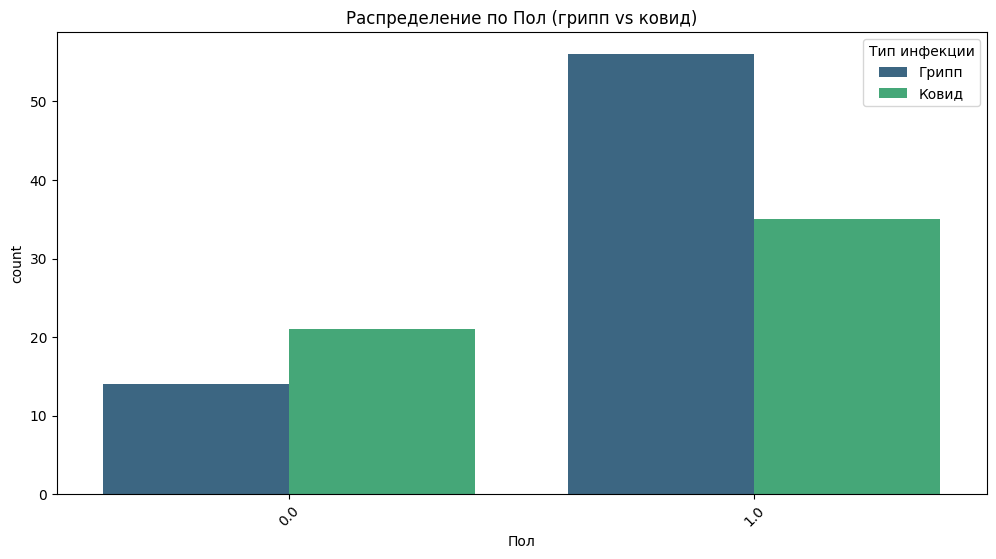

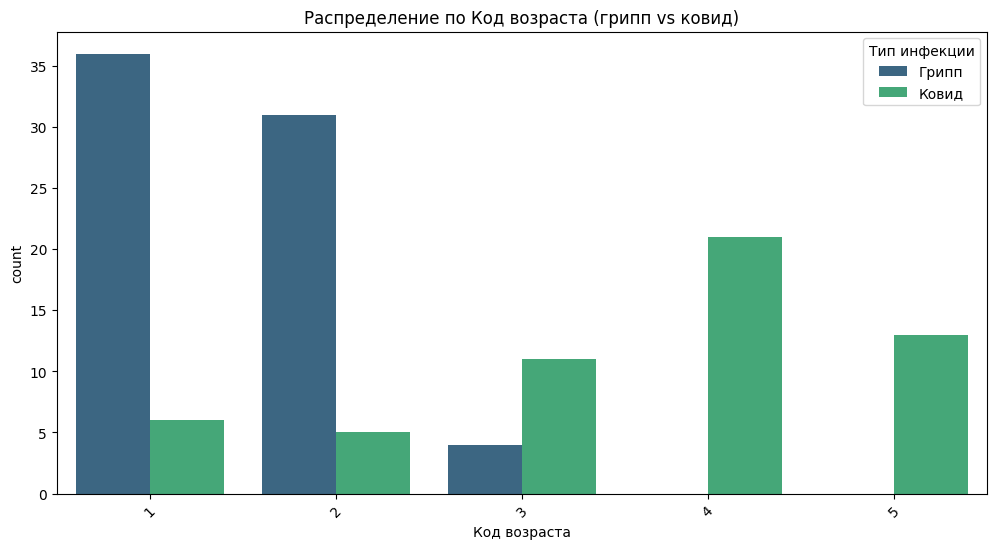

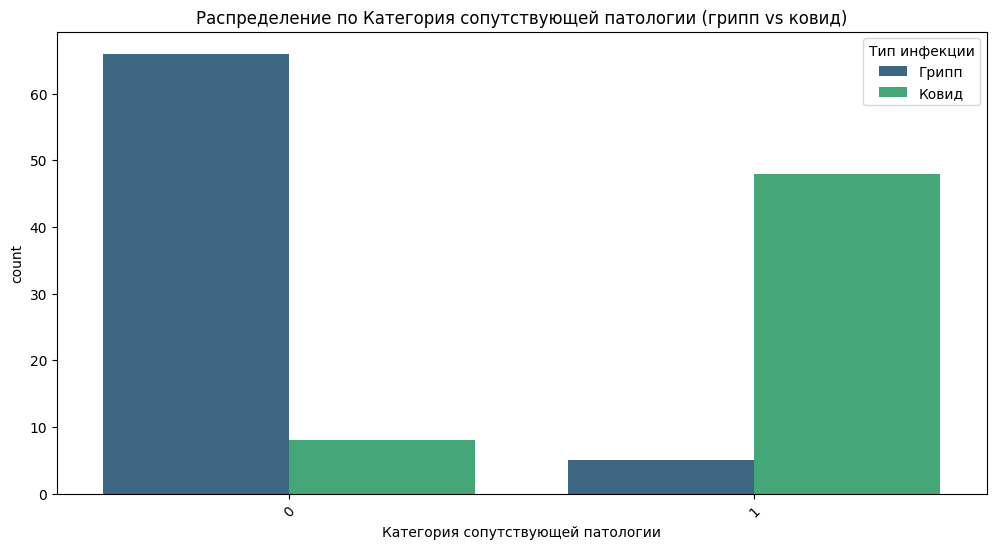

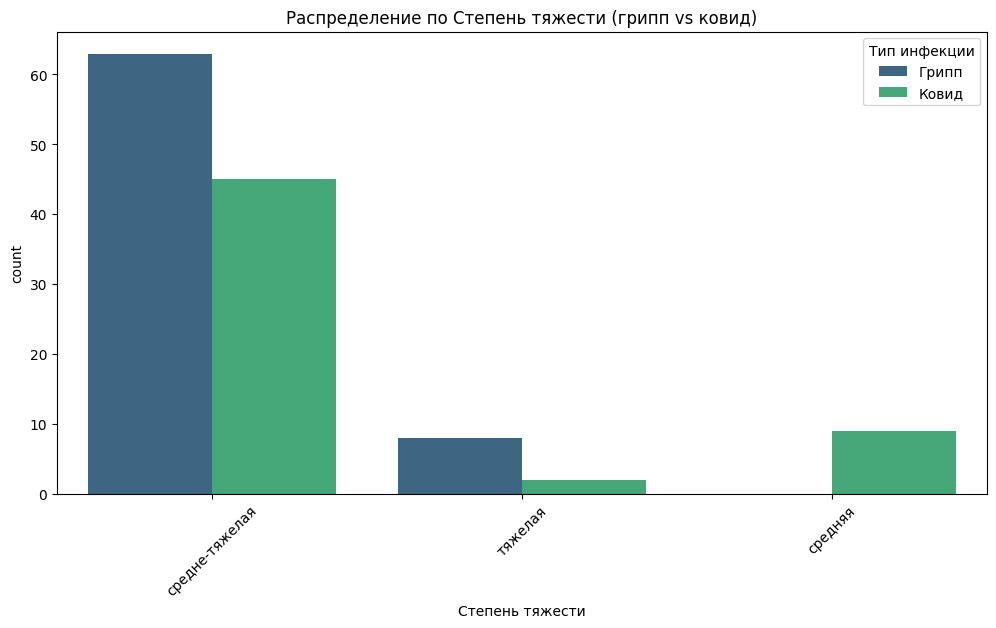

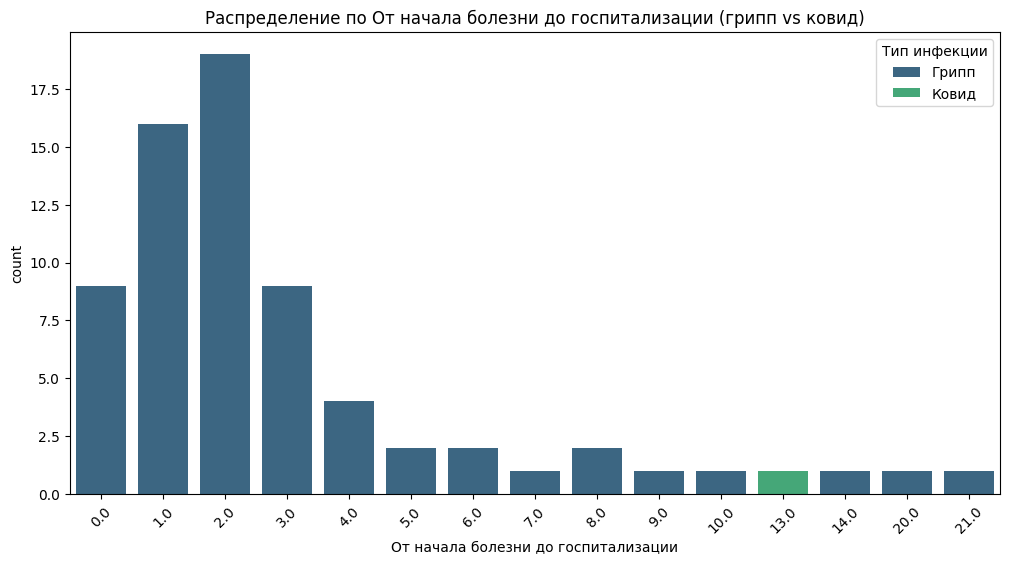

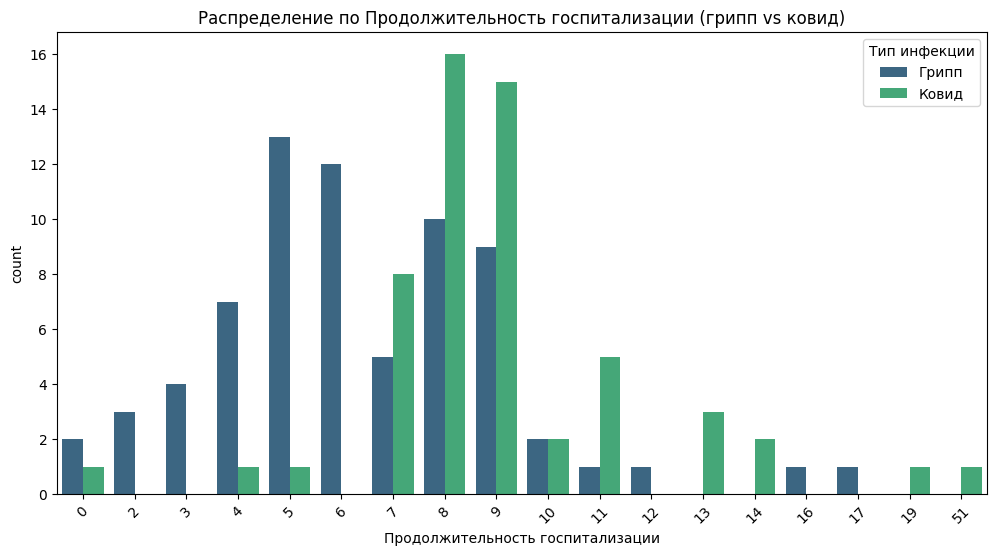

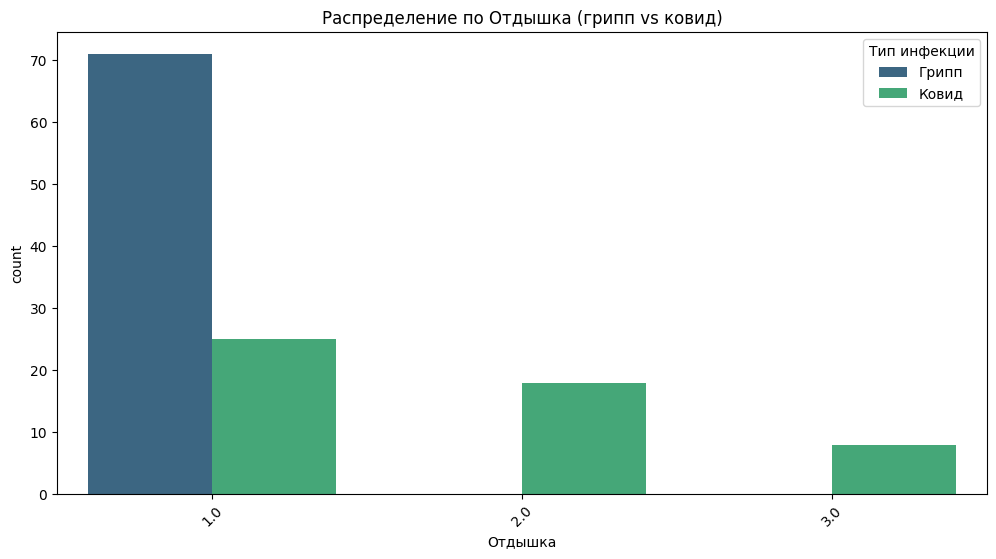

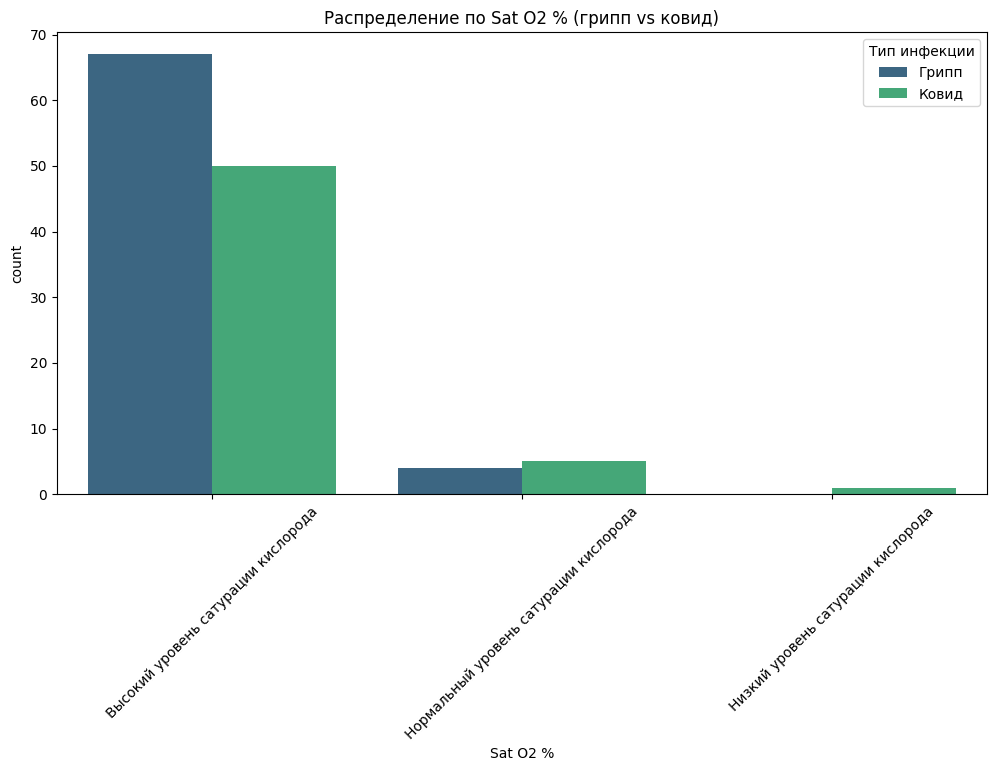

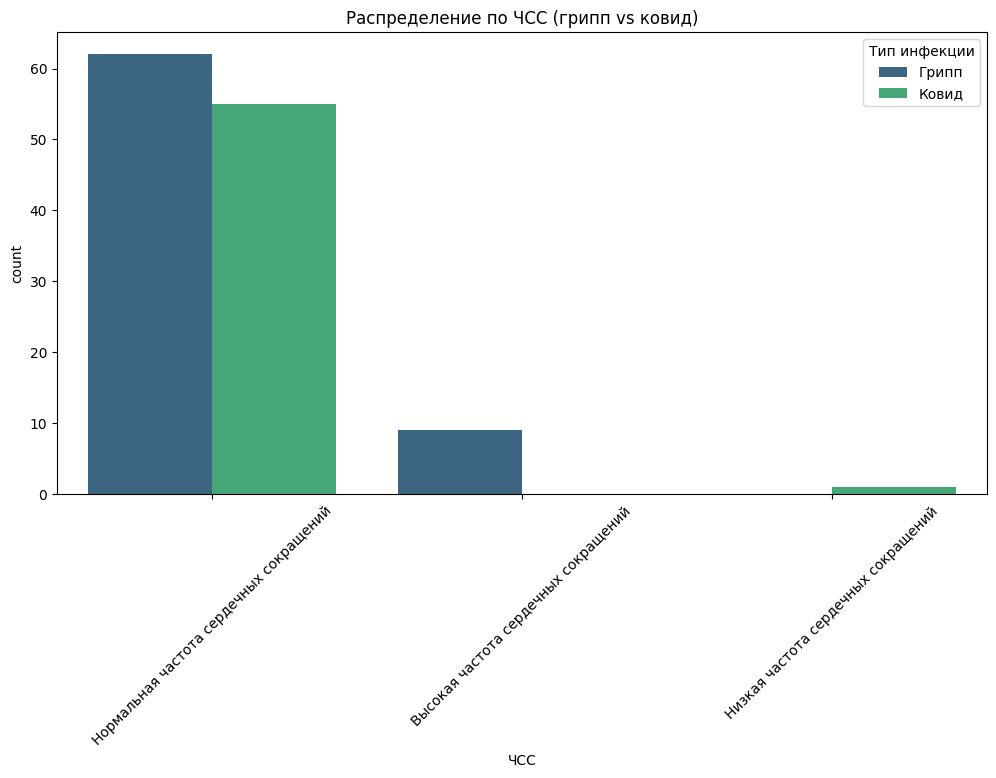

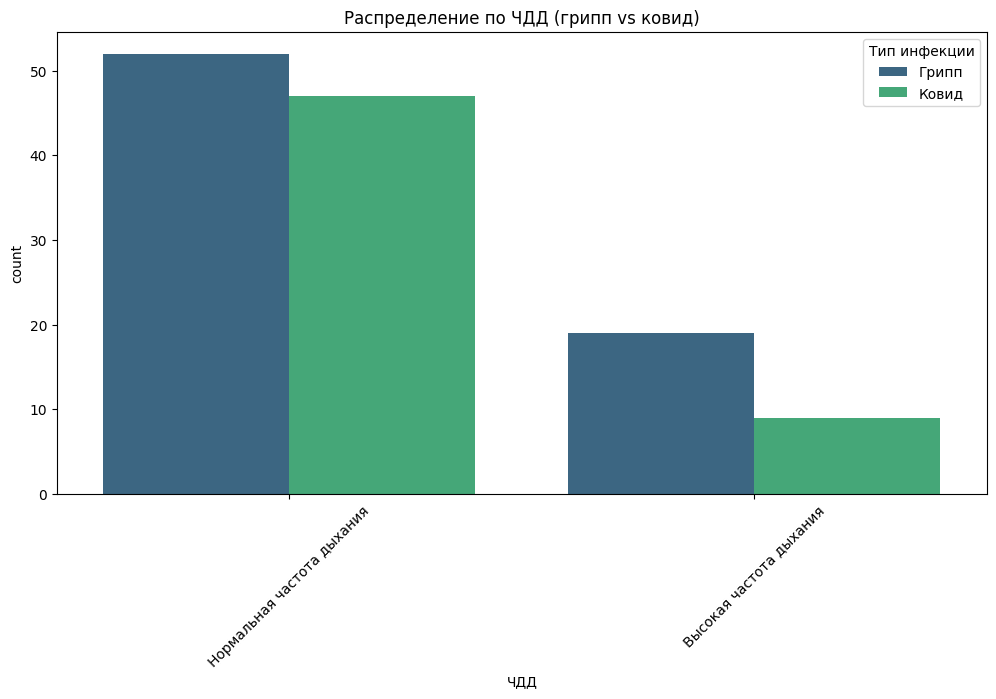

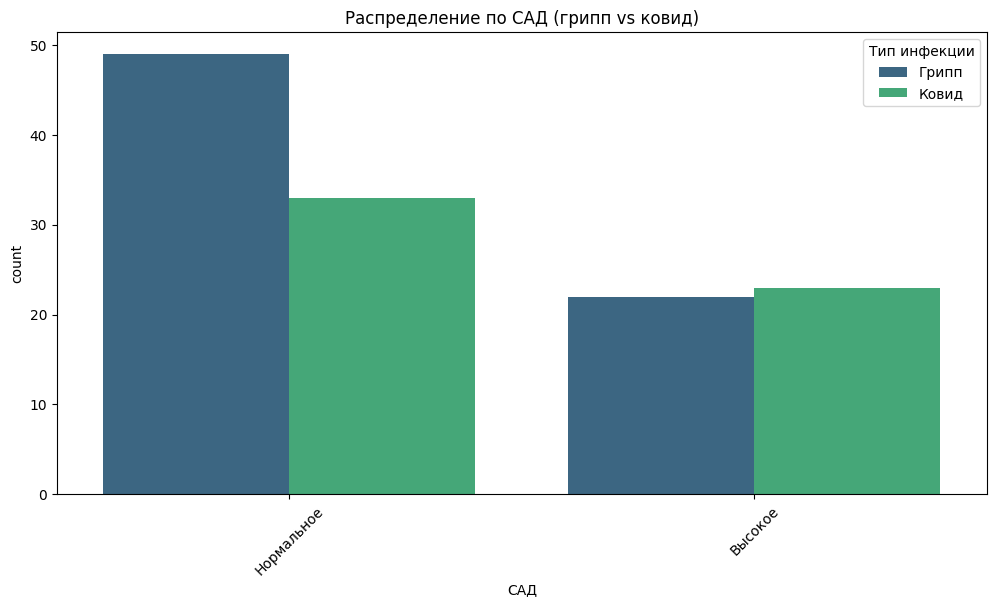

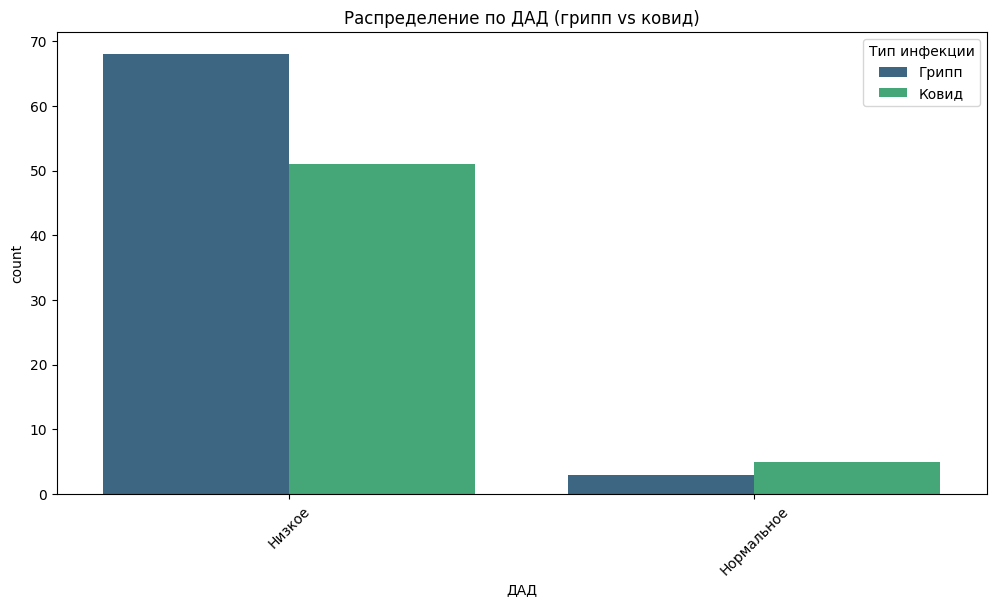

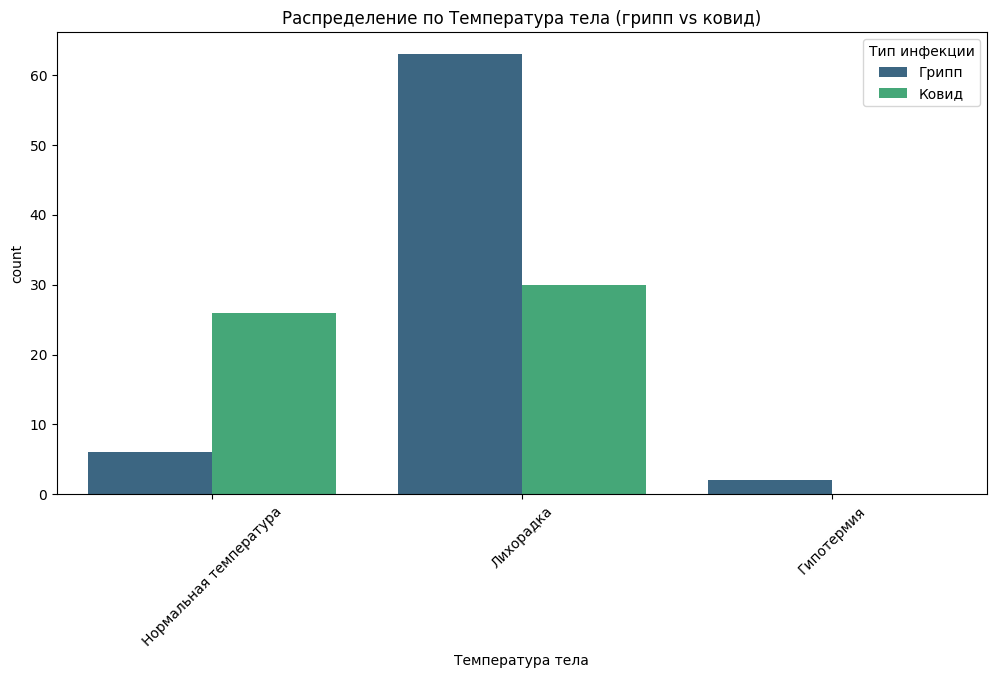

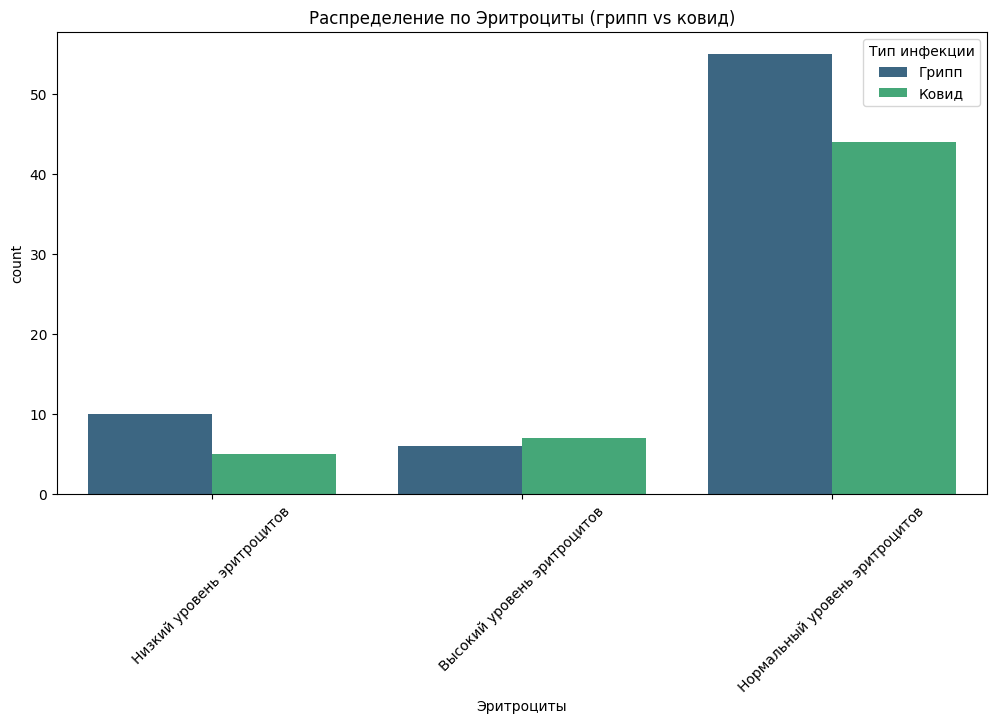

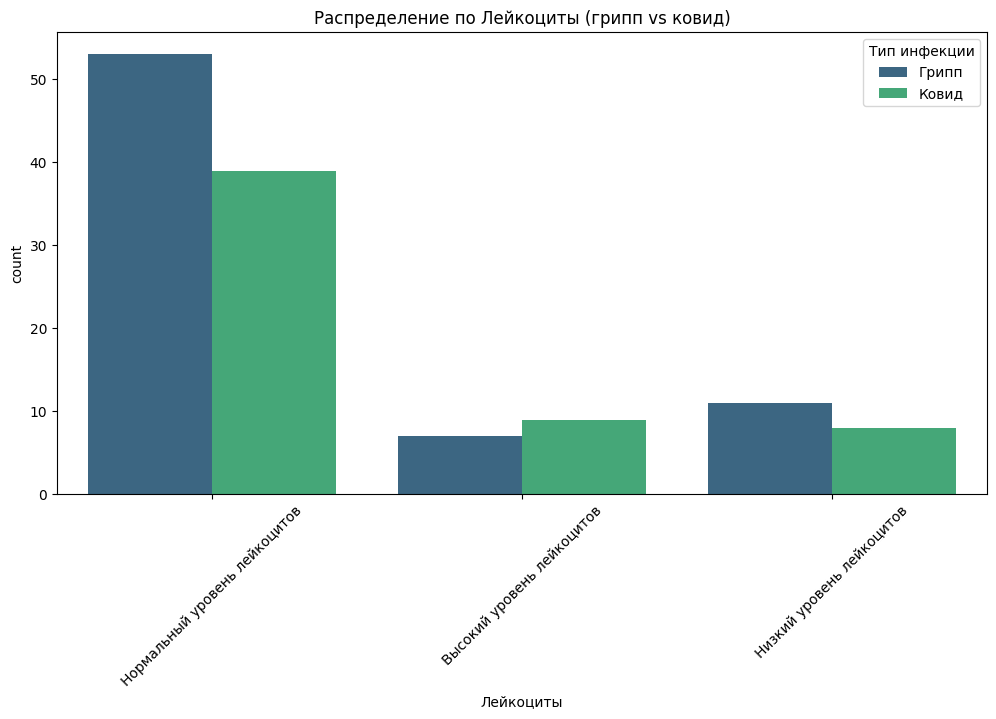

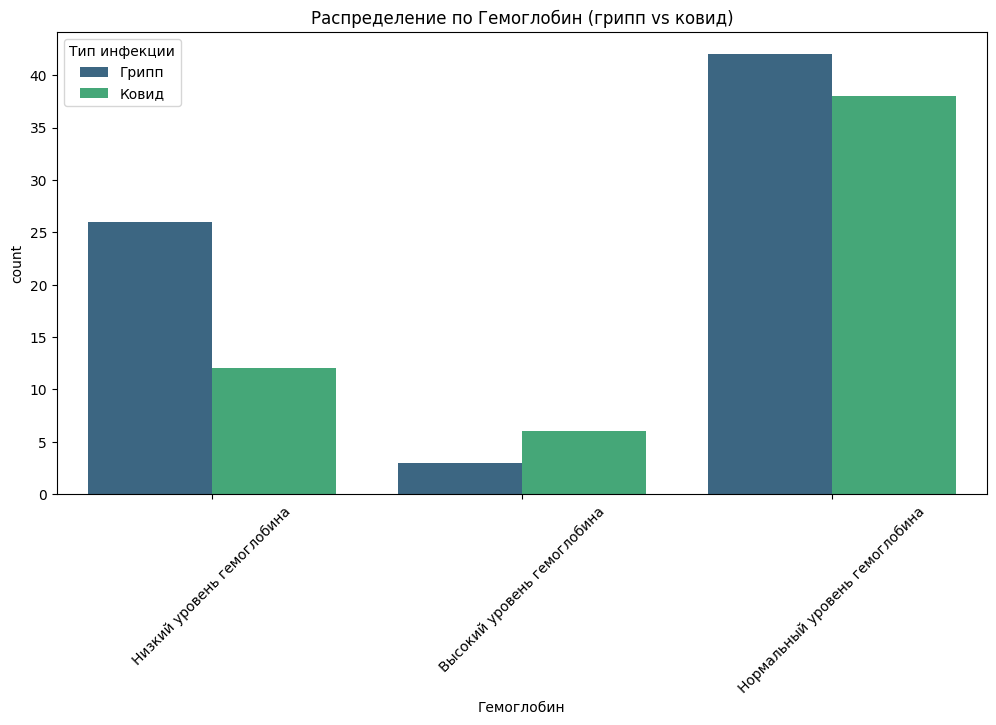

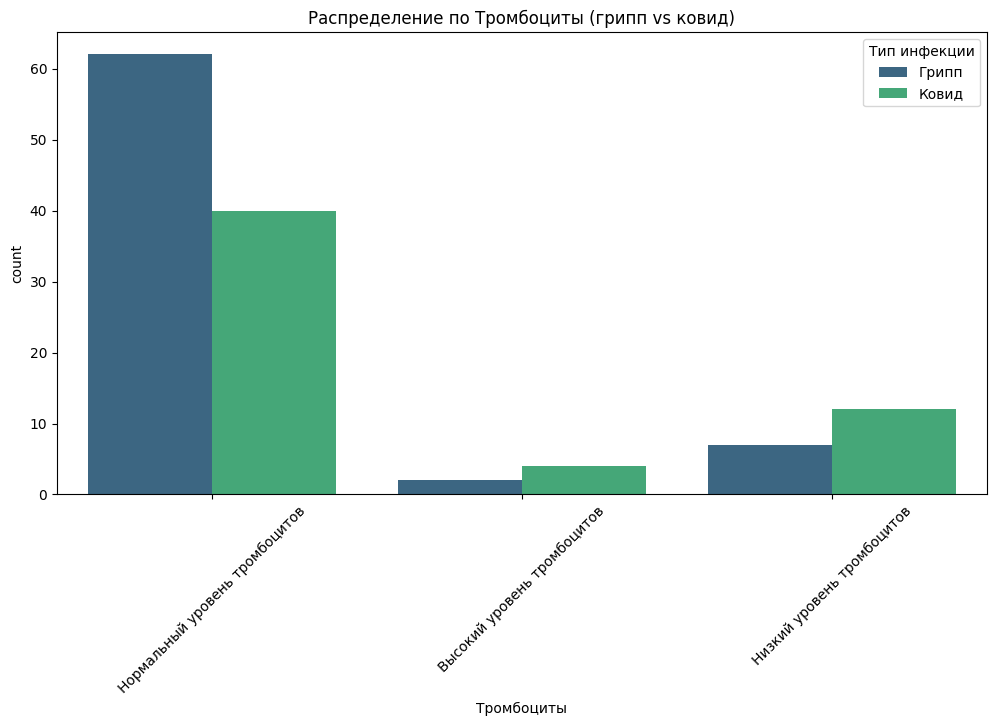

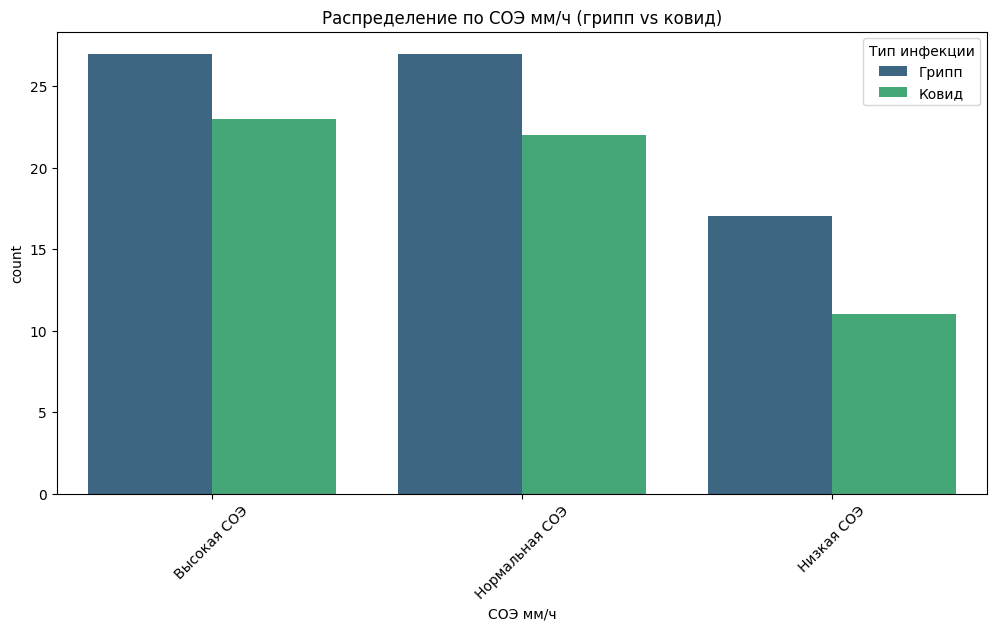

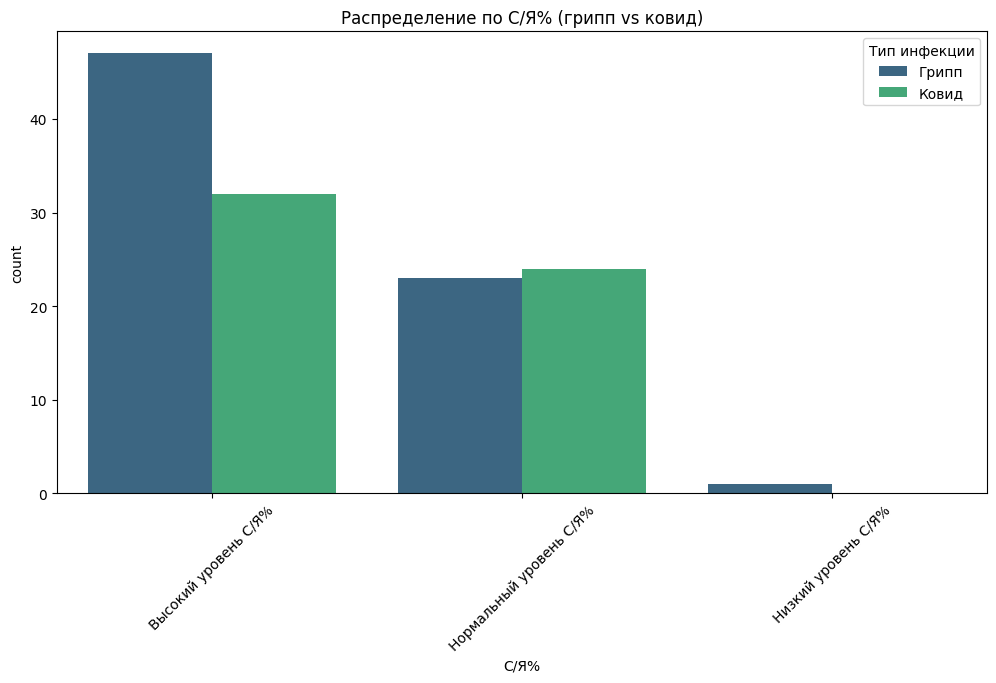

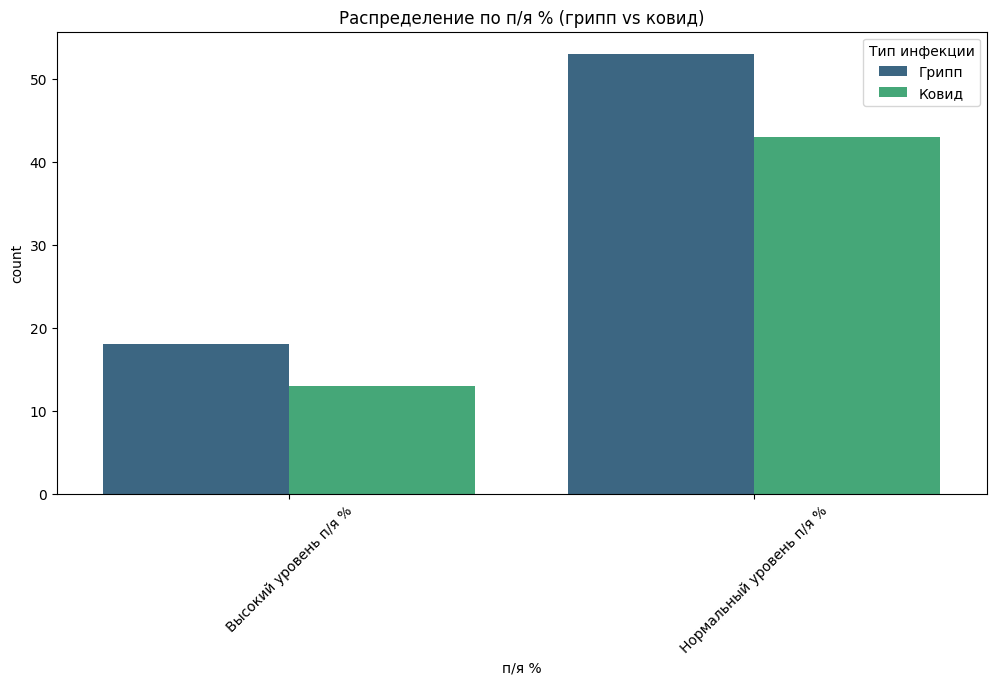

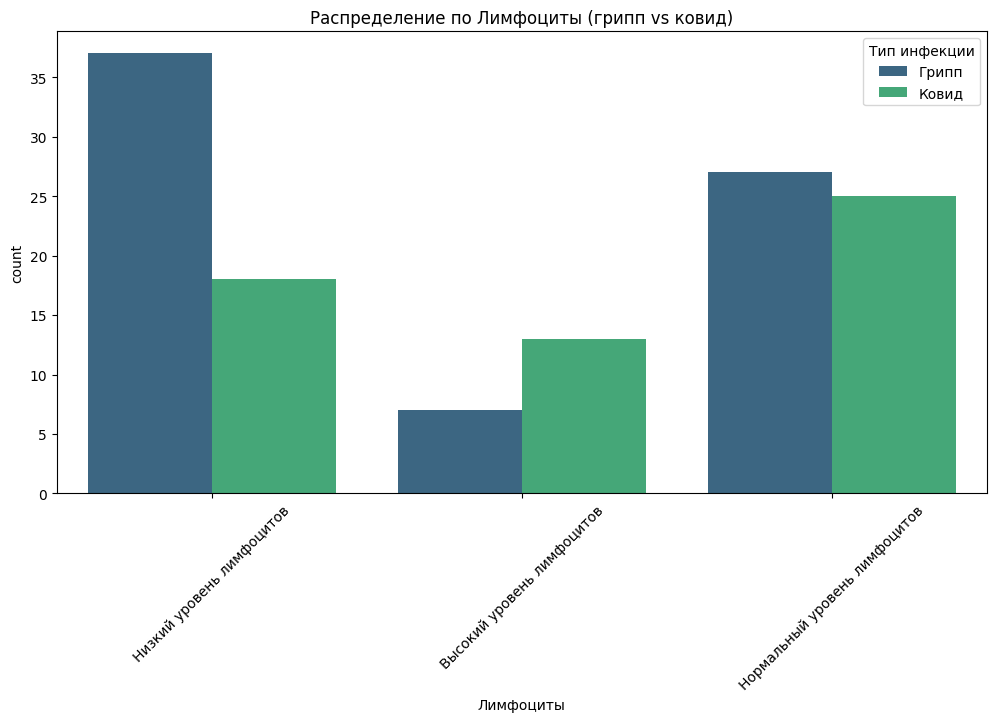

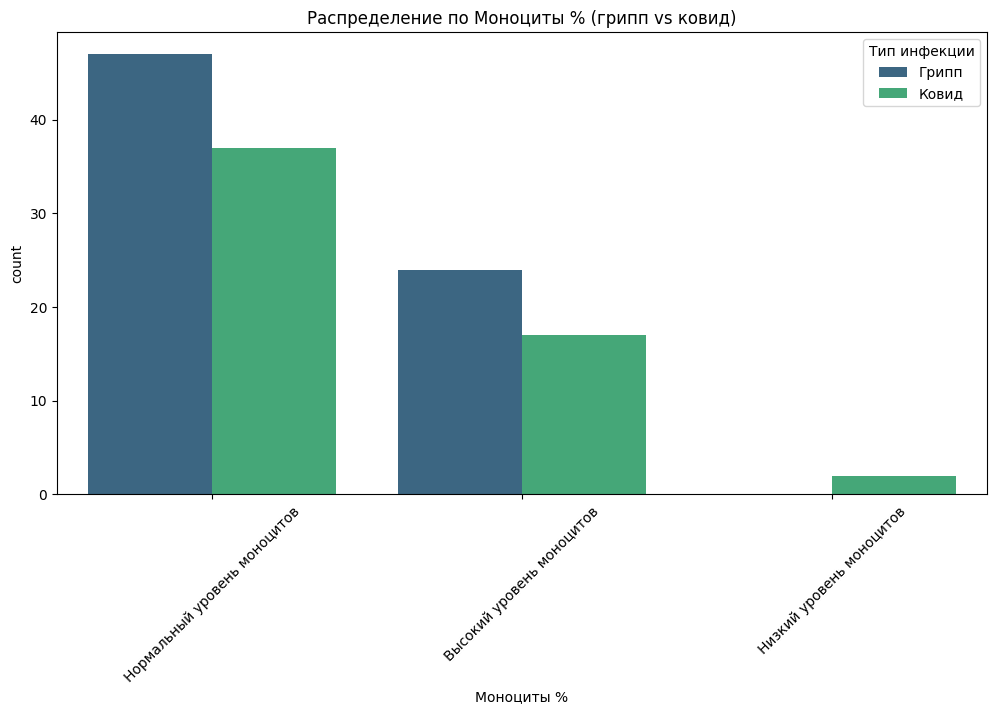

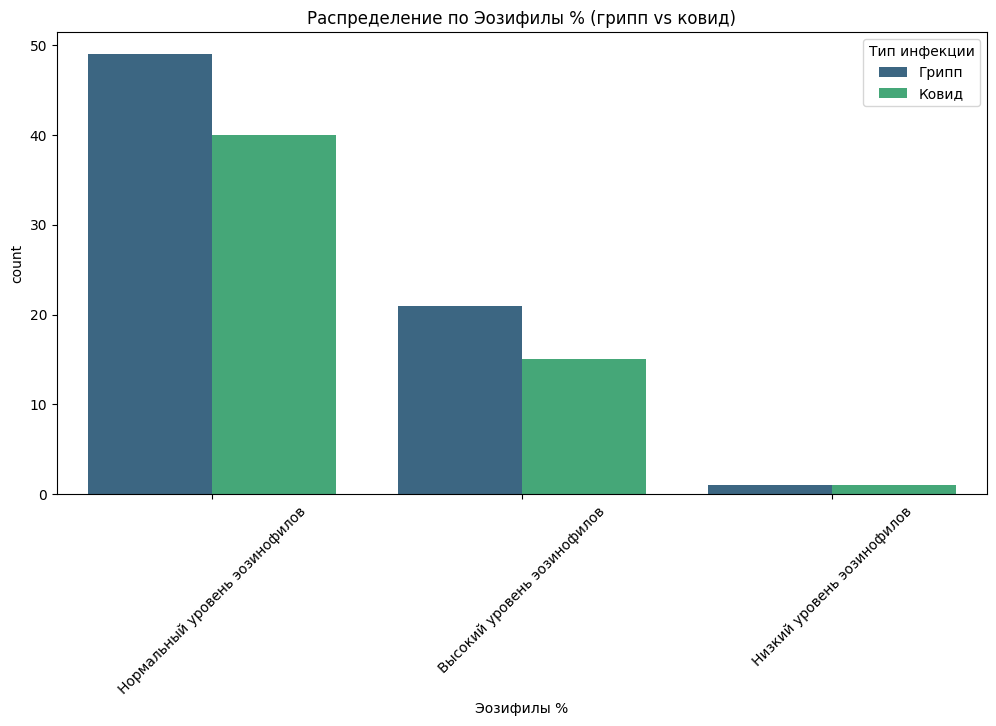

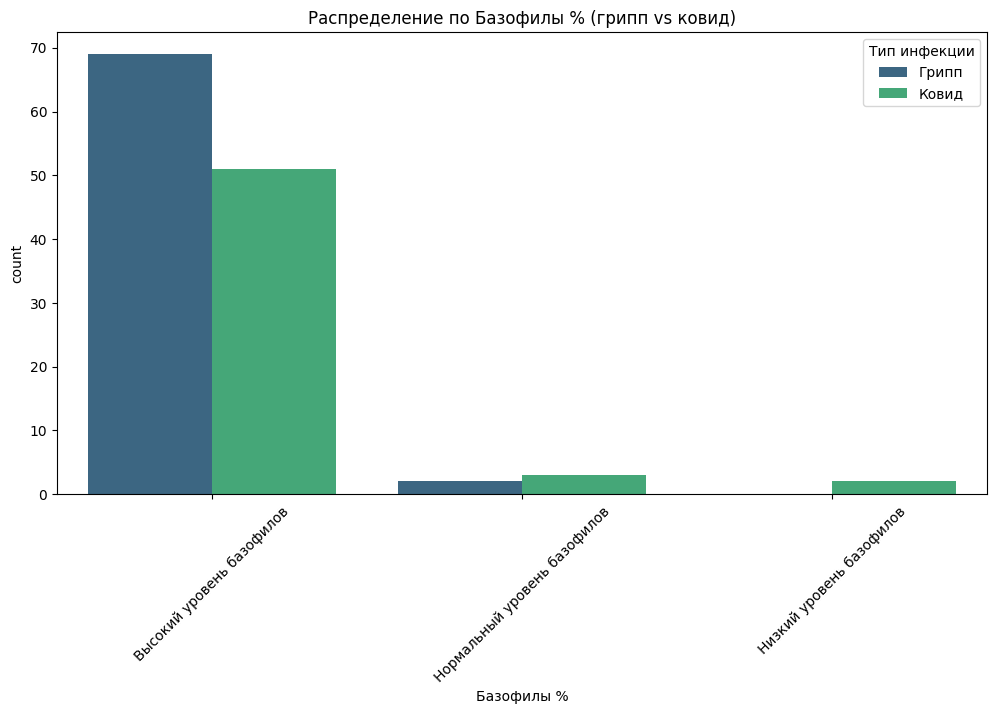

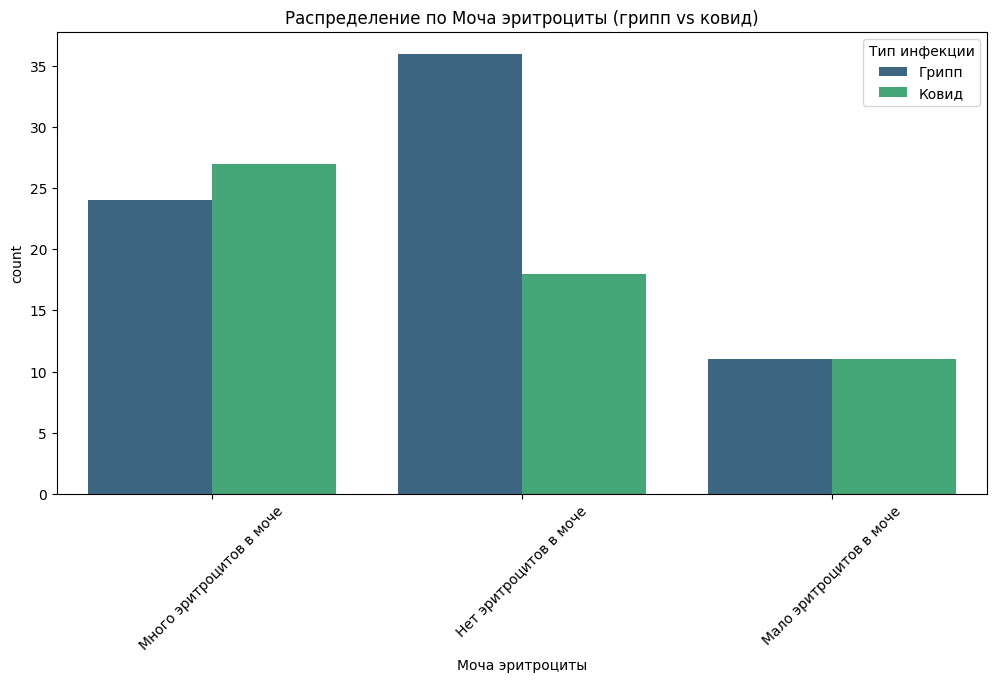

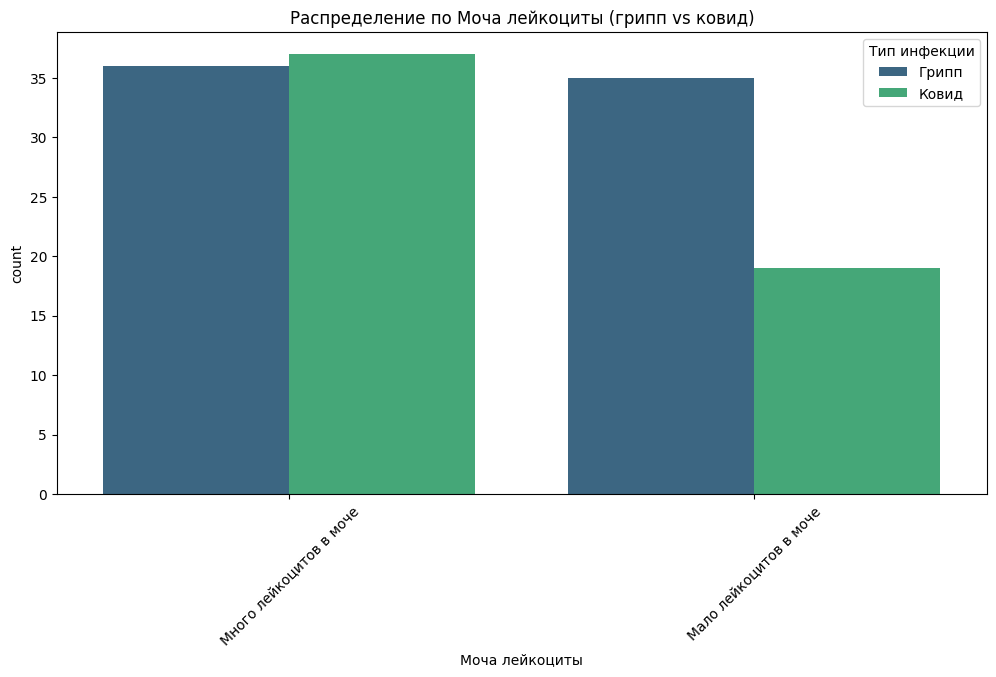

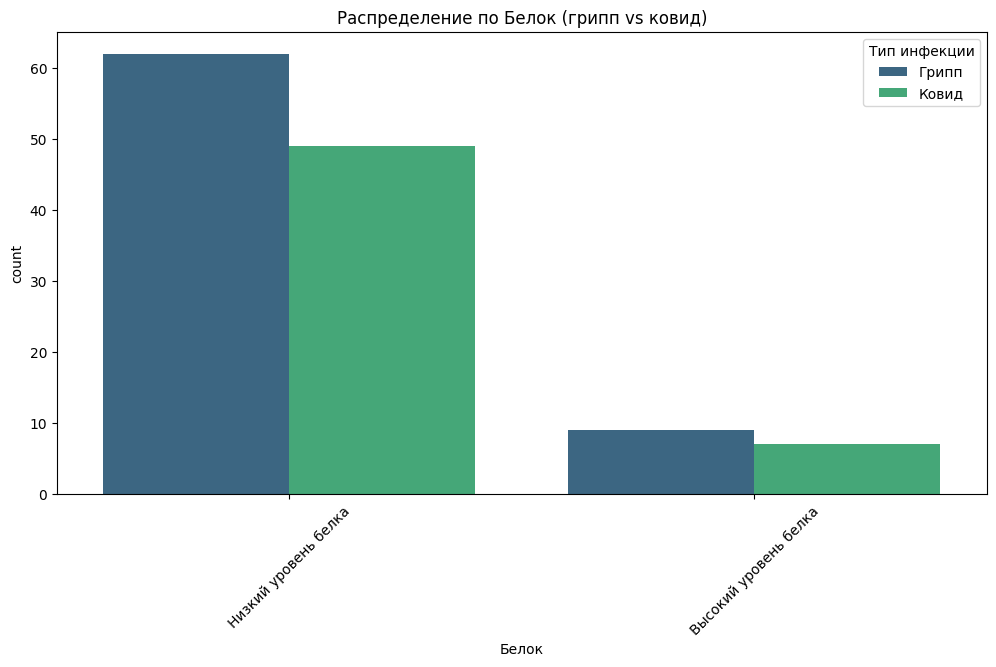

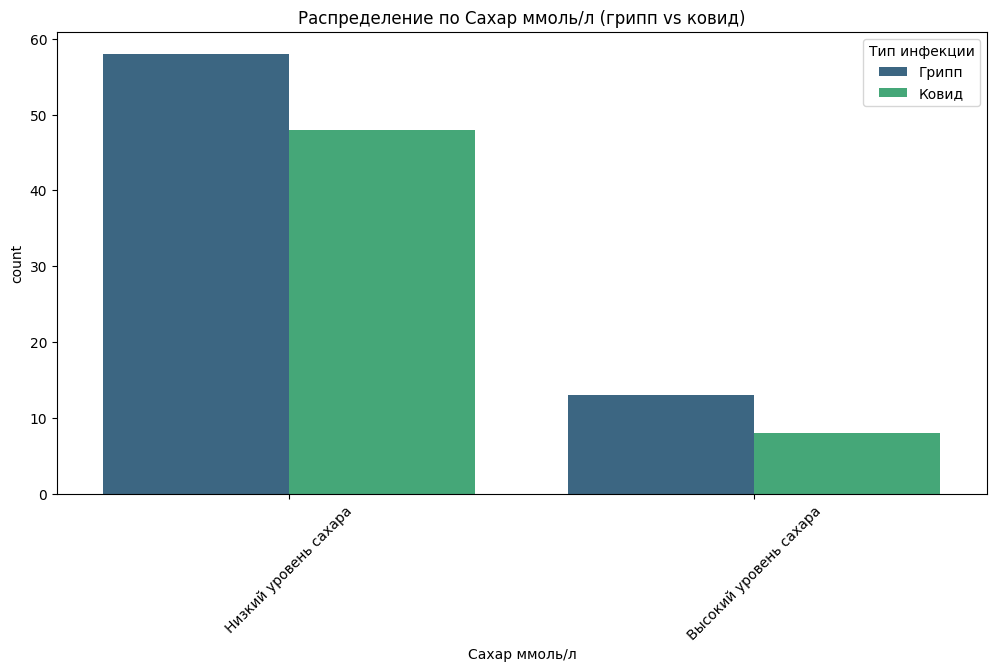

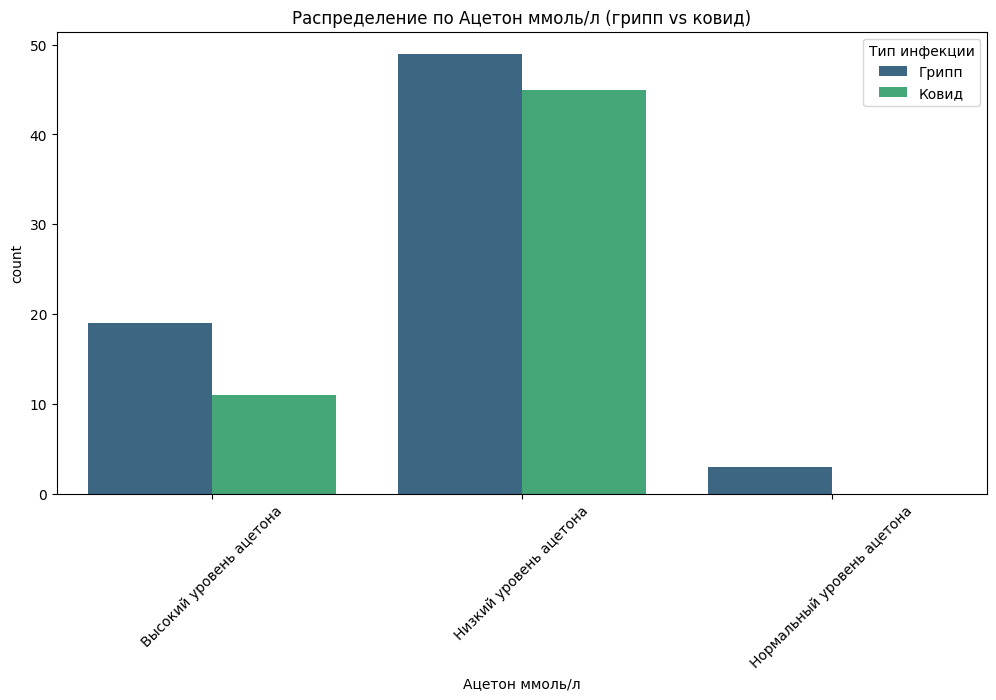

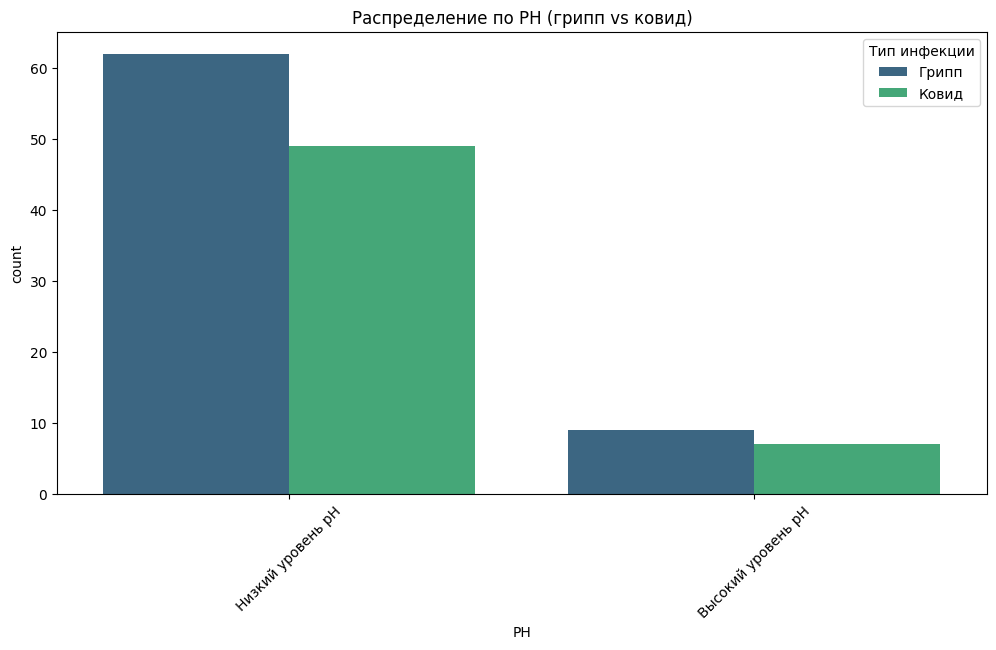

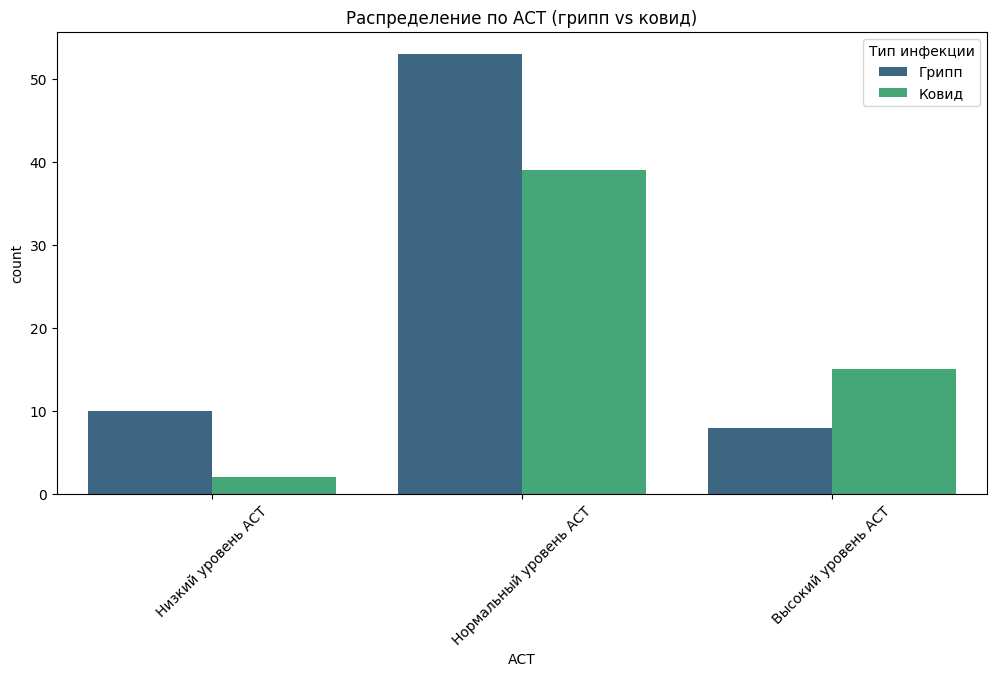

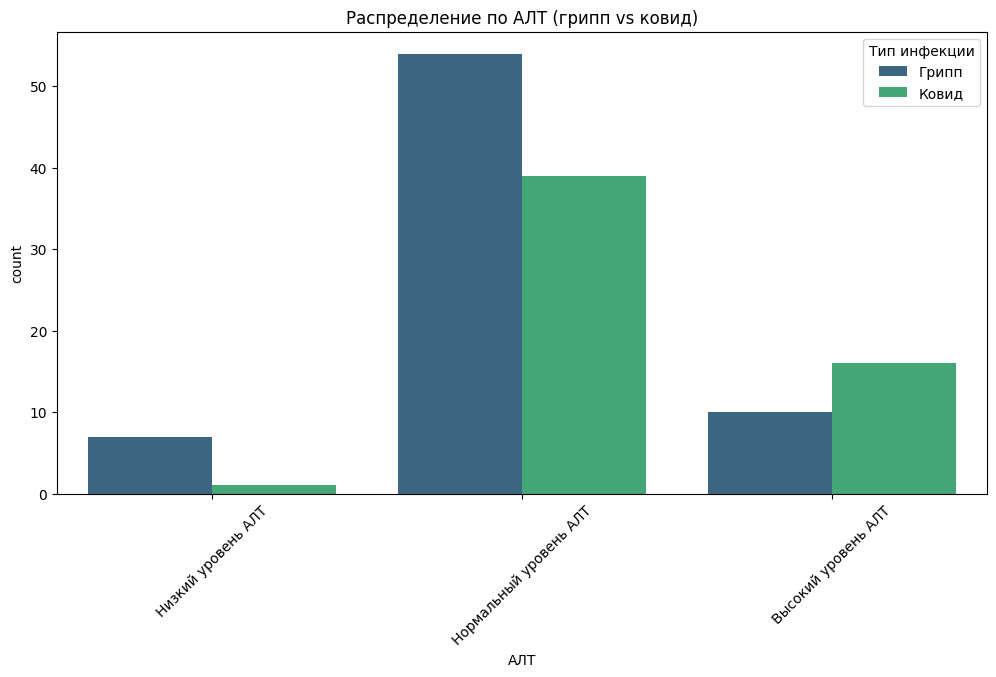

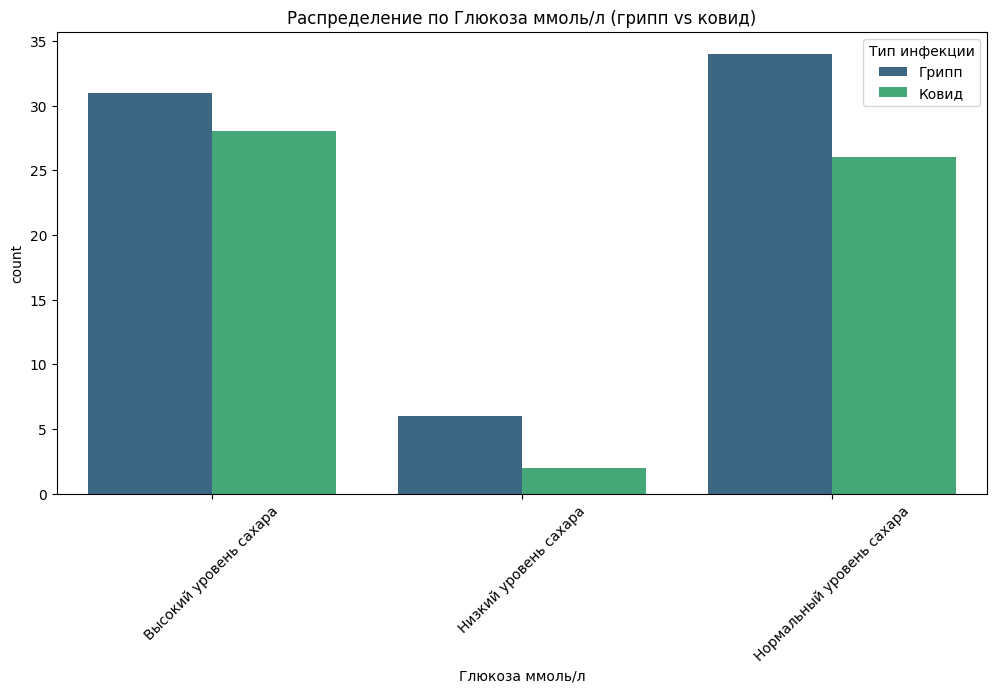

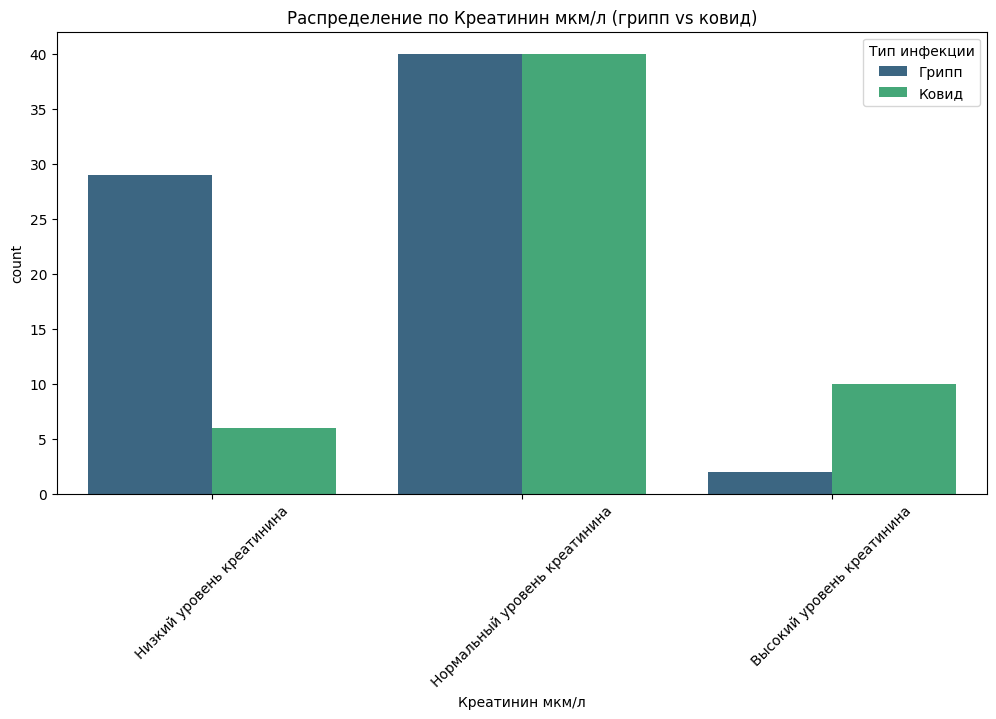

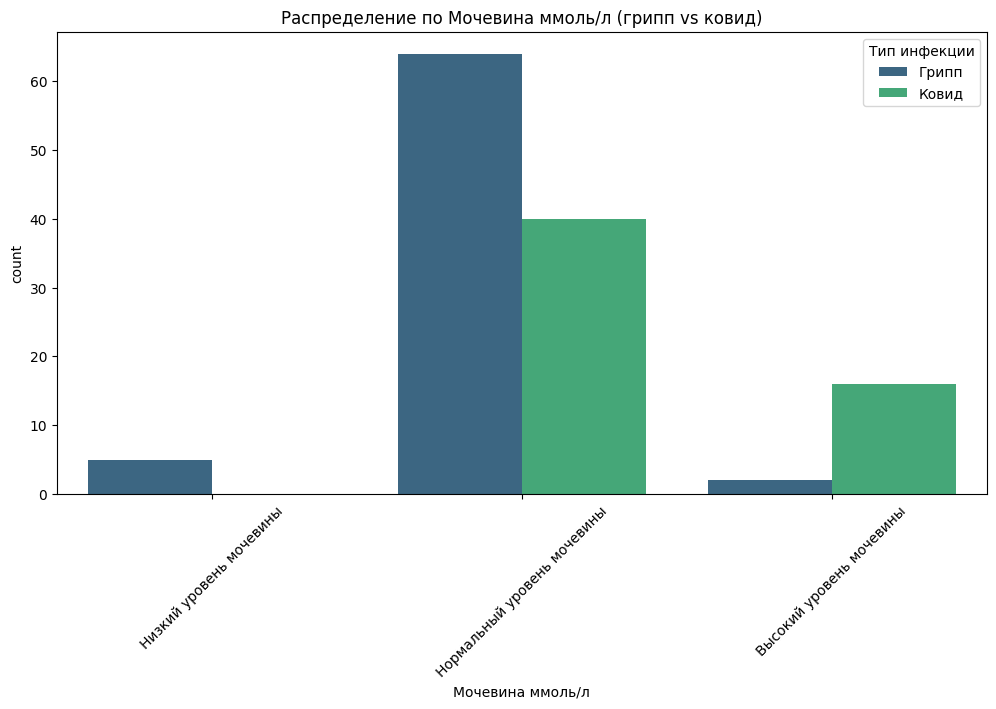

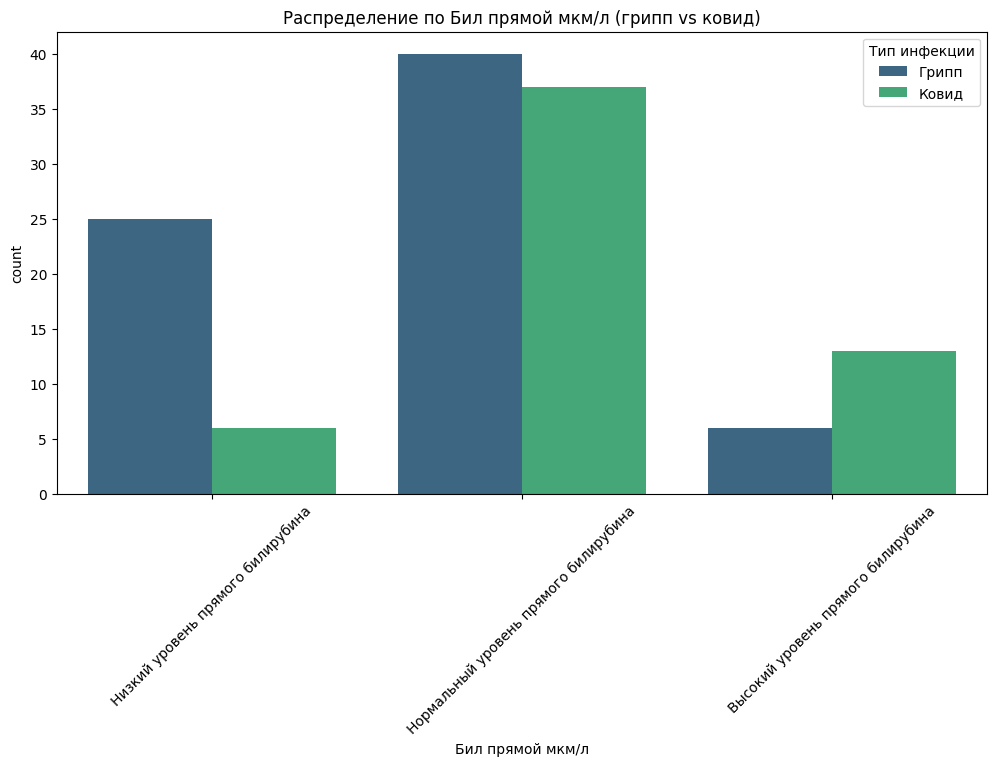

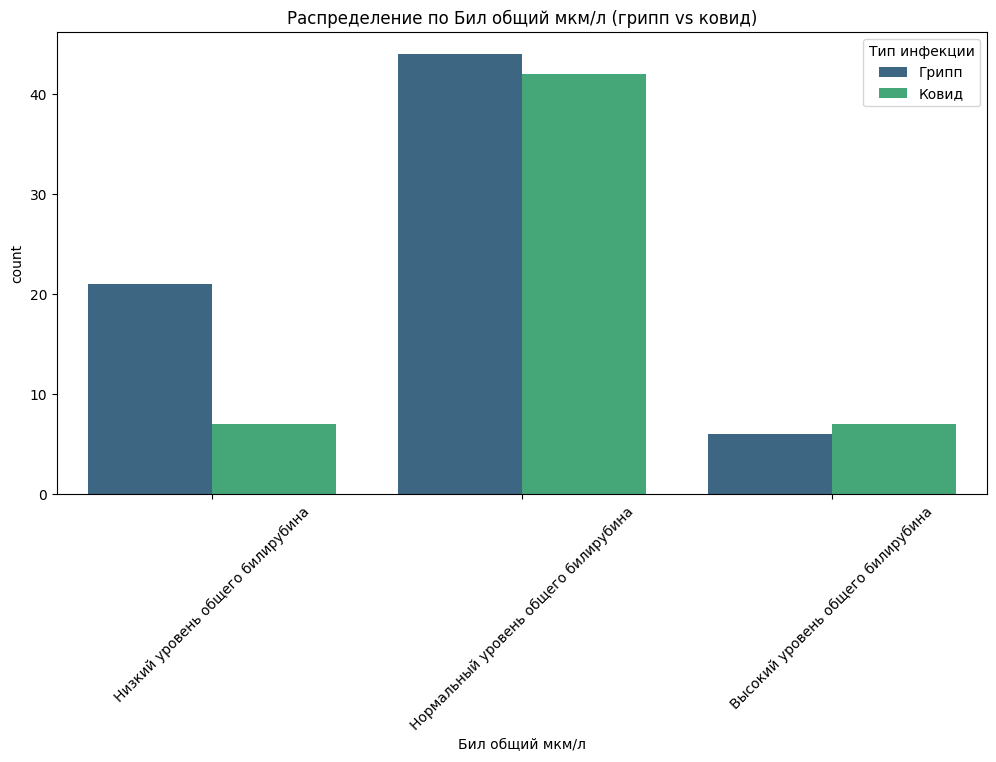

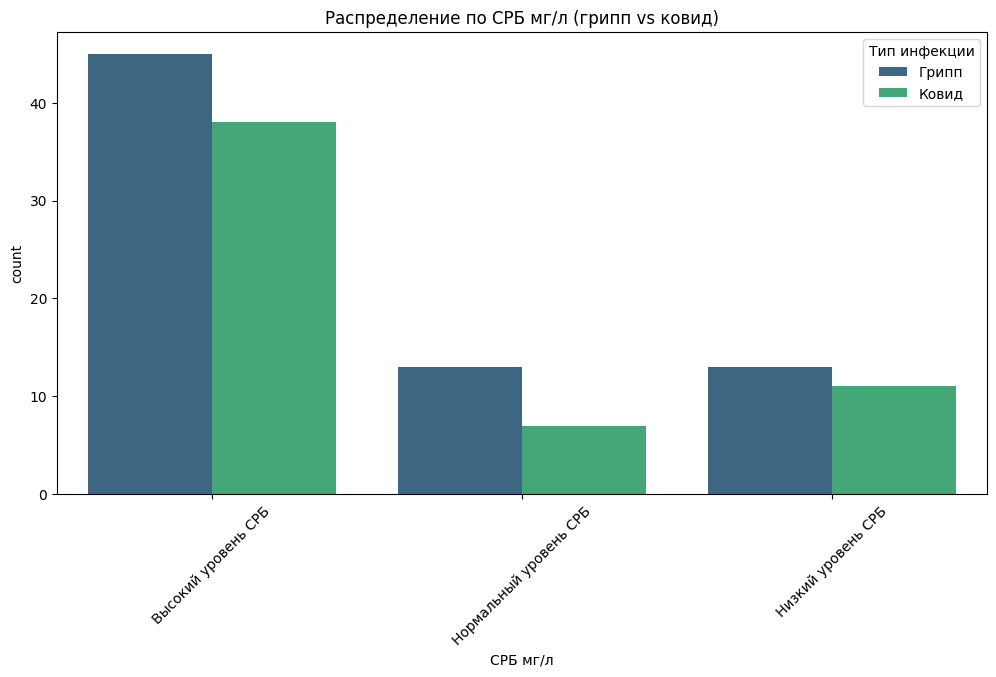

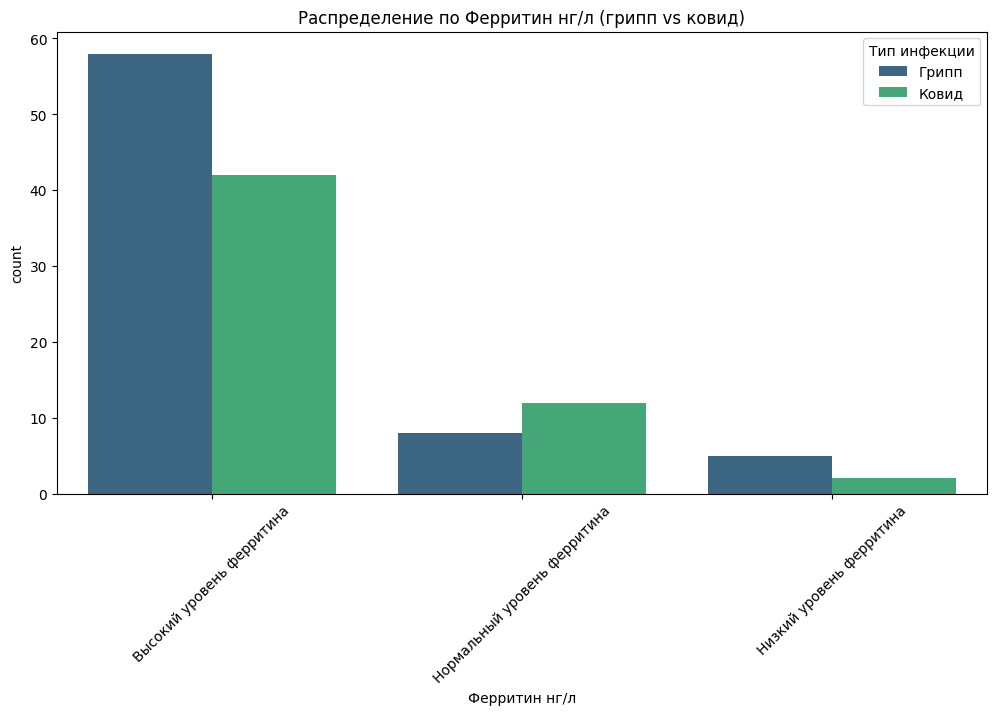

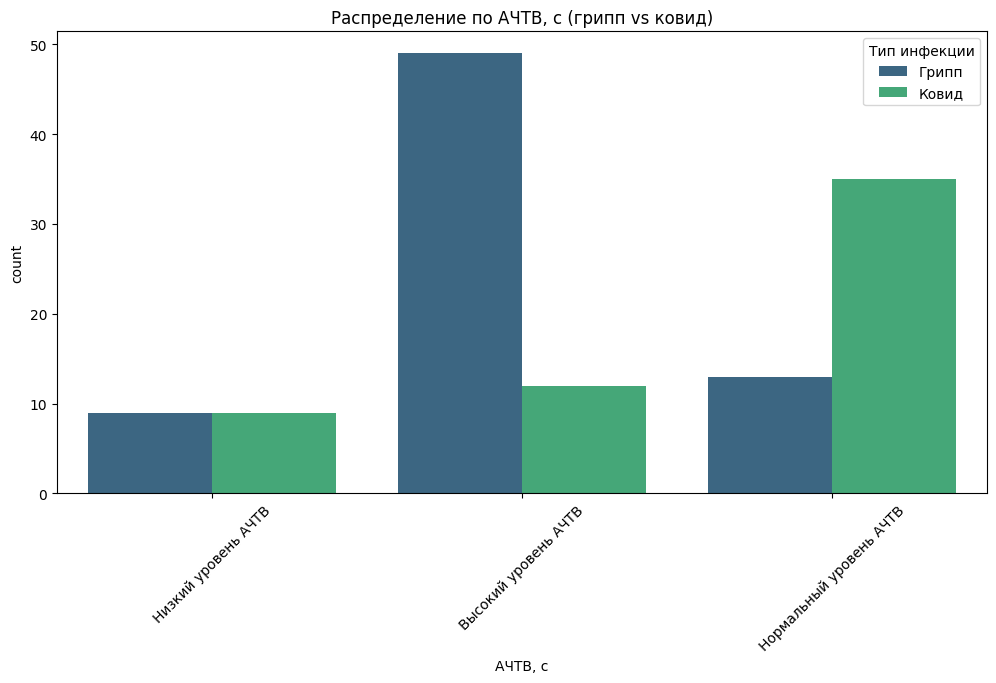

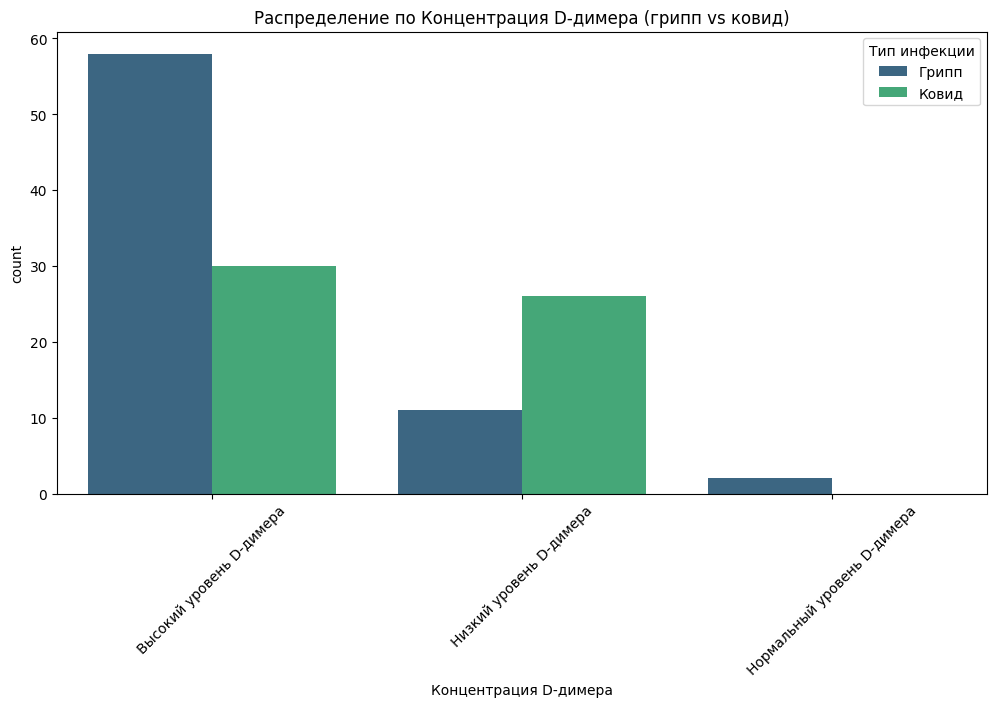

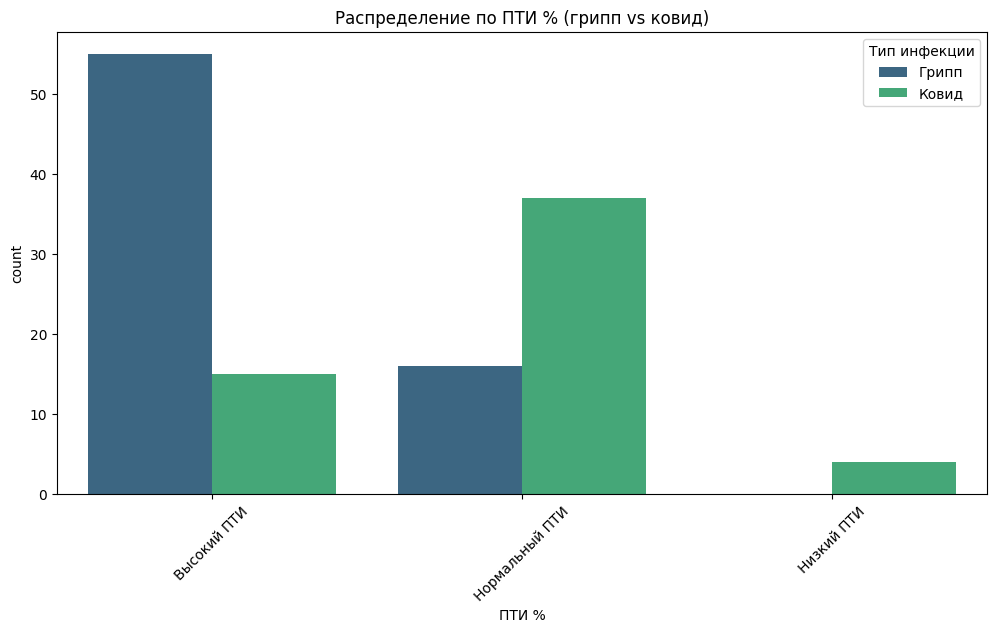

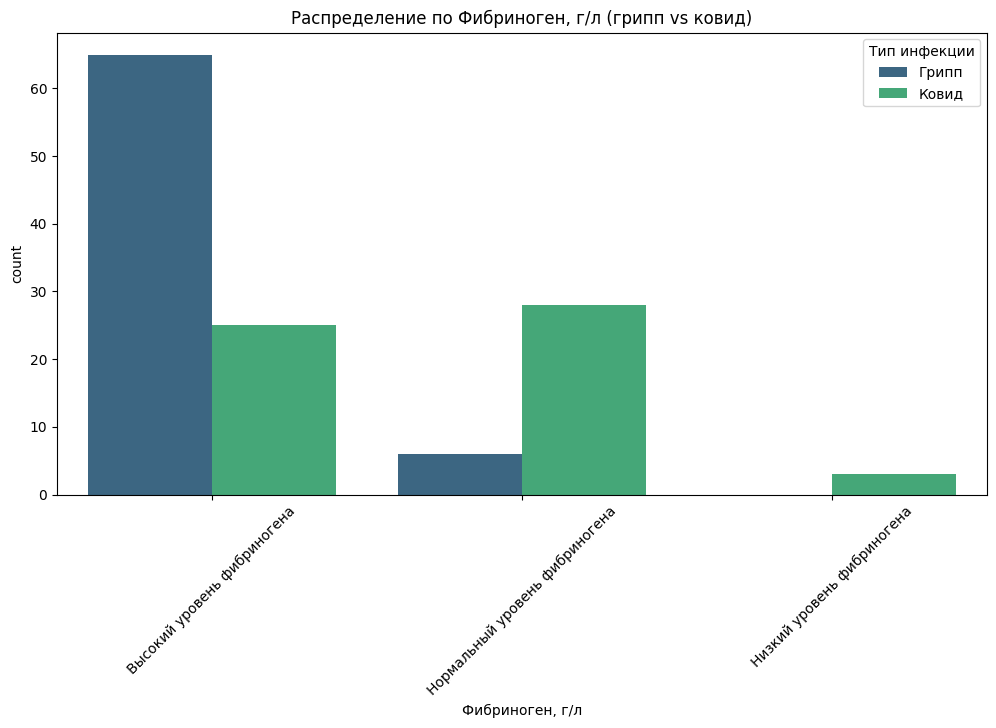

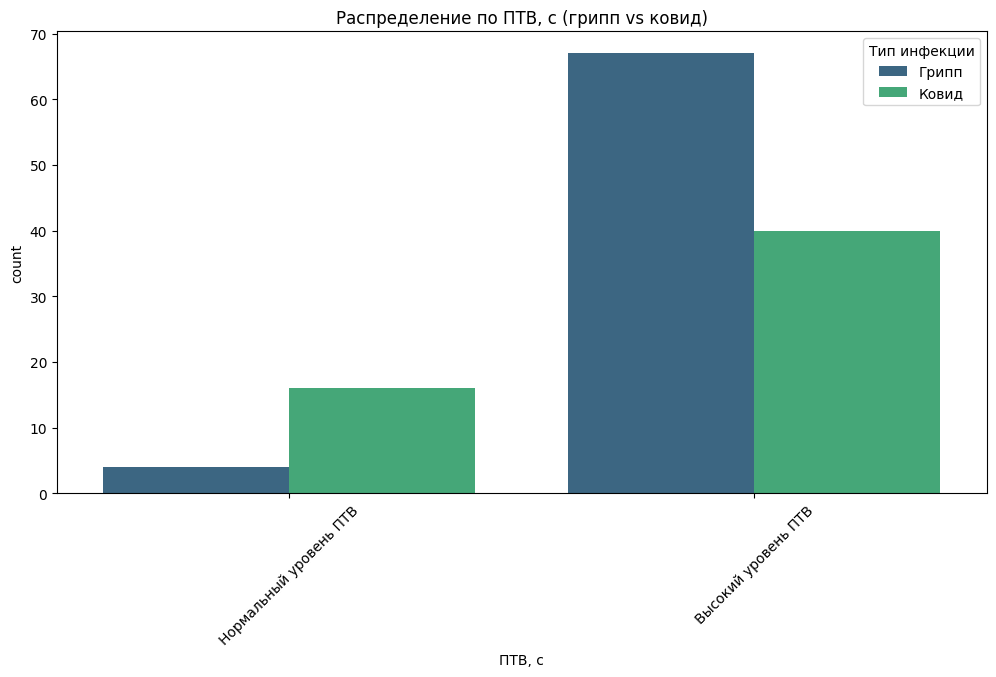

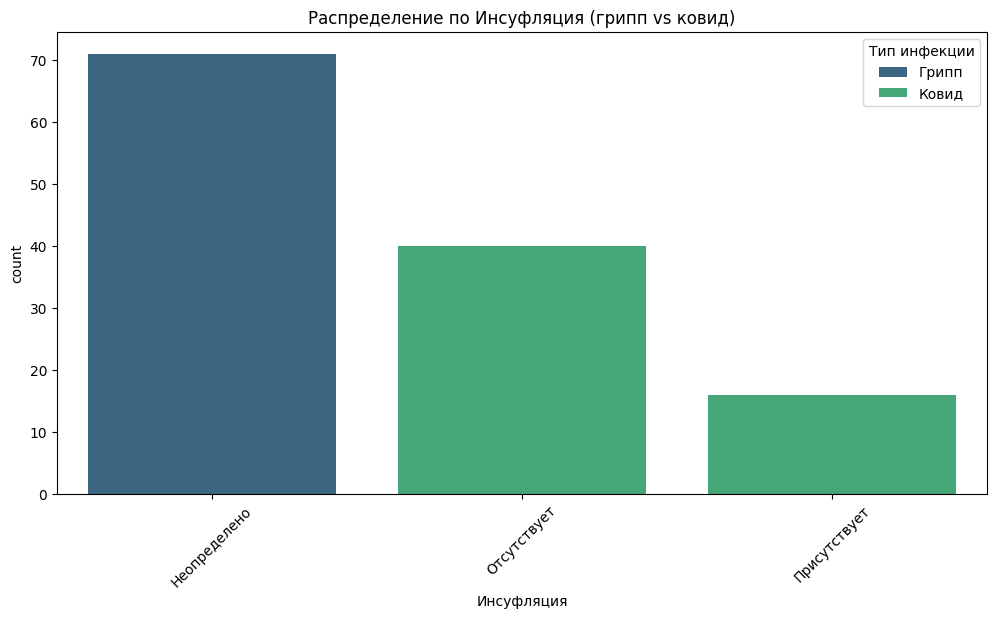

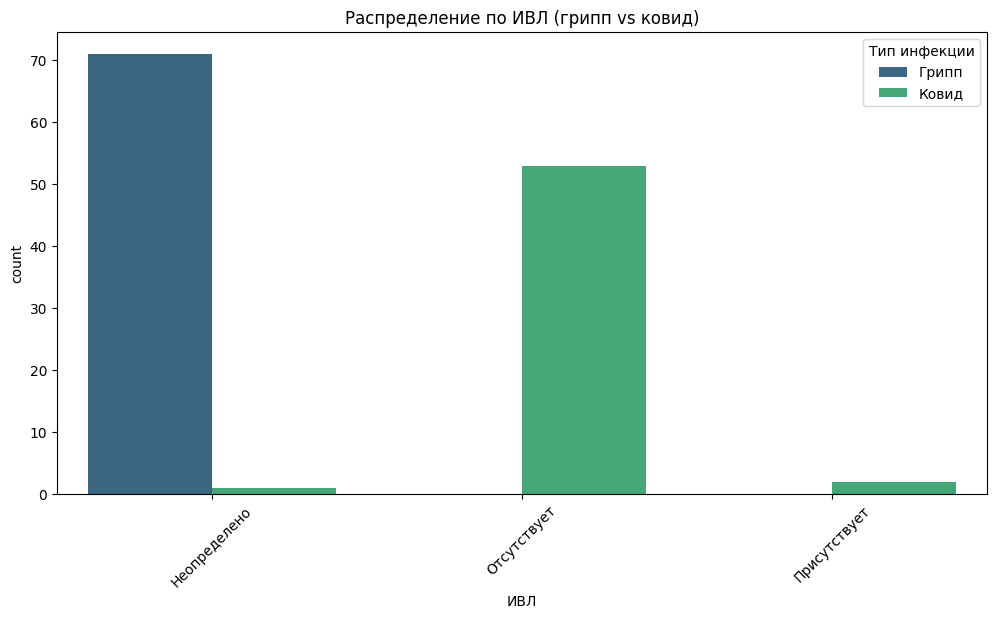

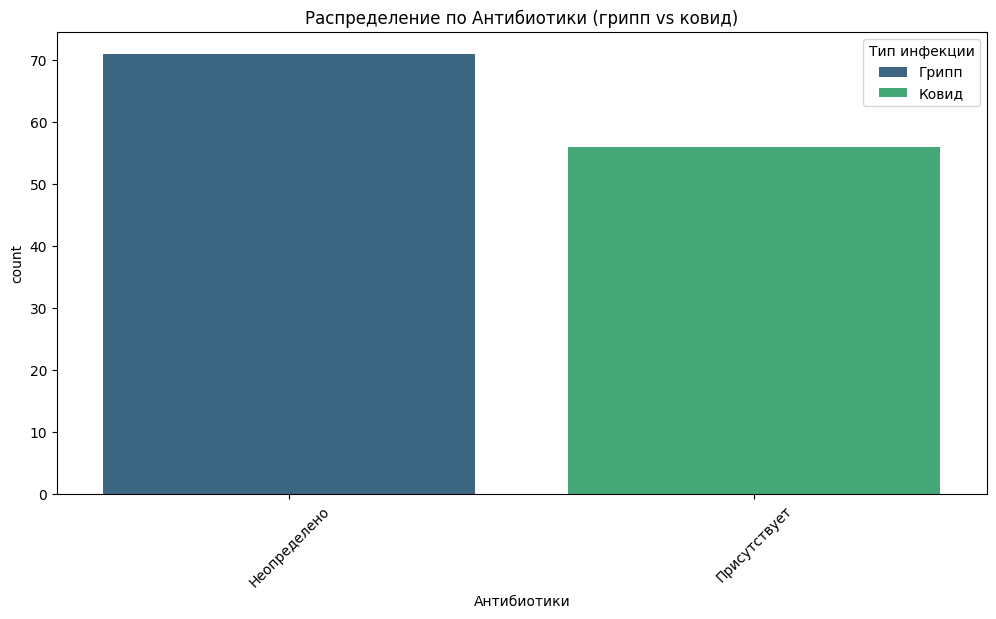

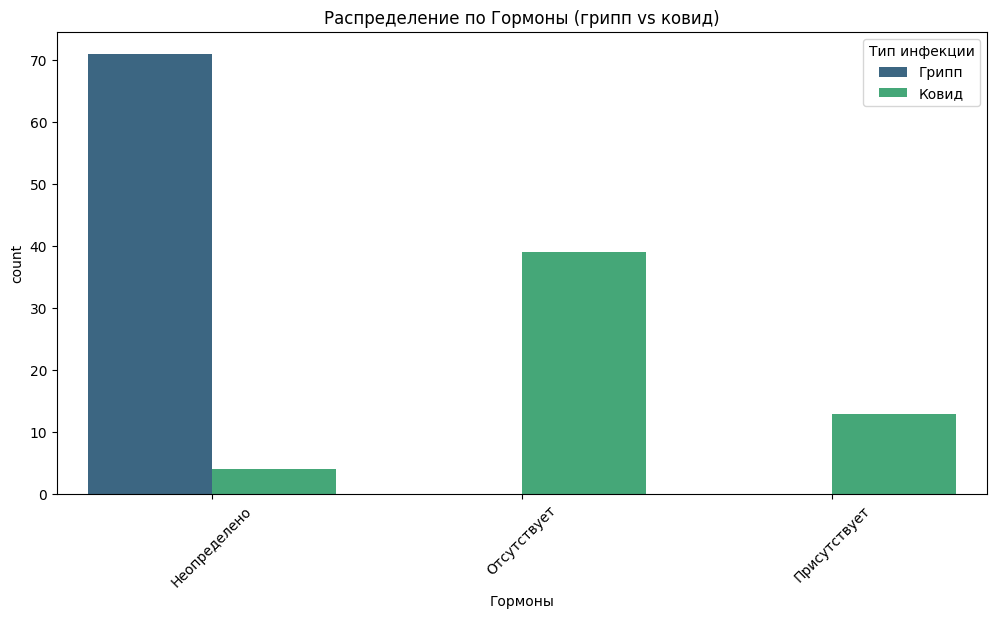

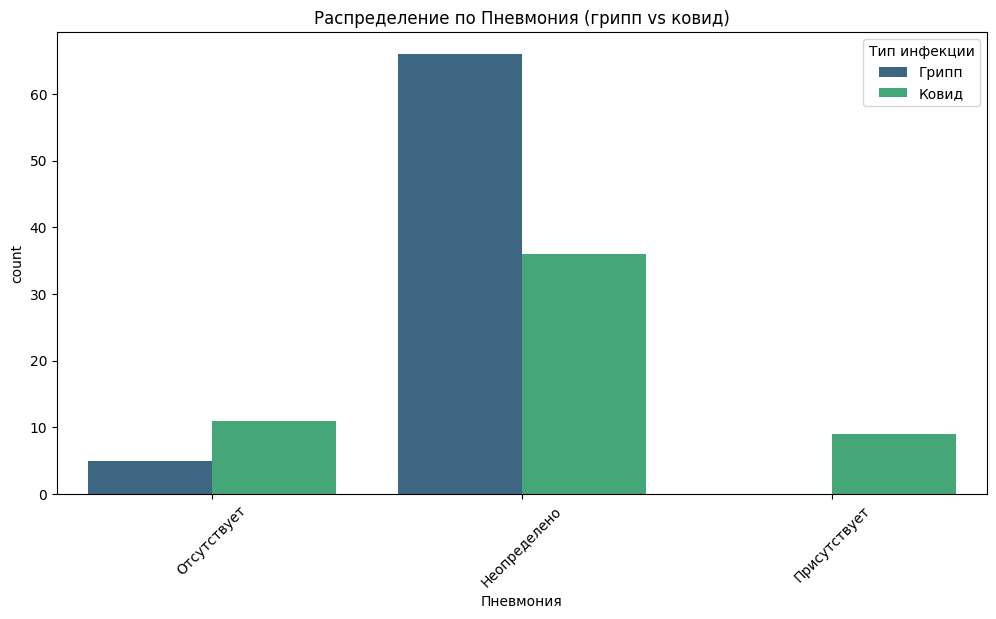

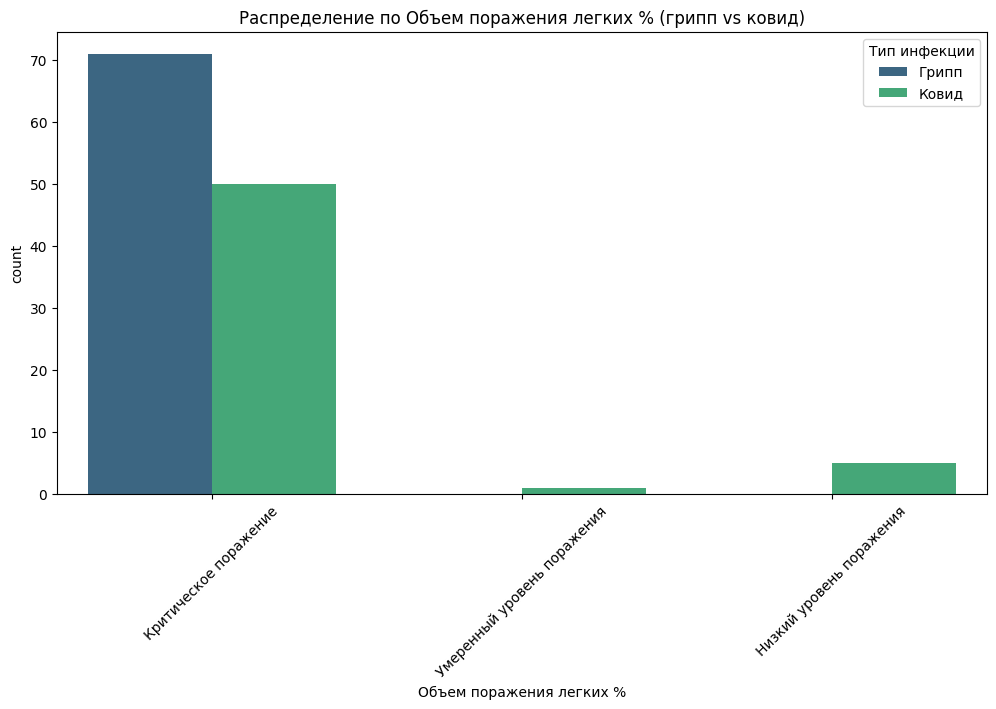

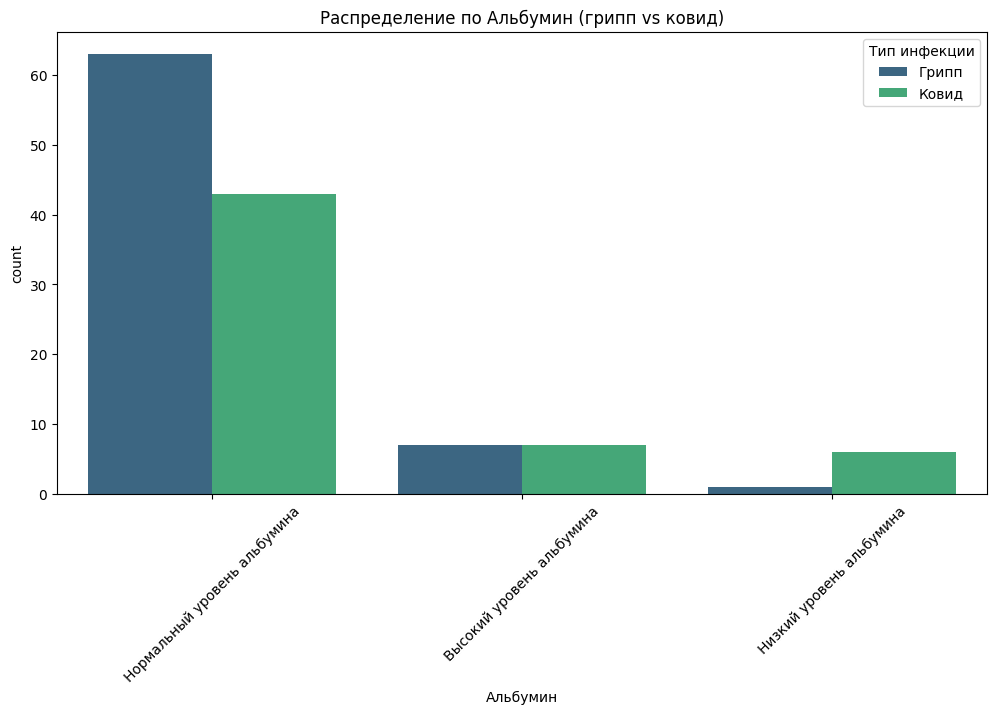

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Загрузка данных
data = pd.read_excel('Очищенные_данные_с_классификацией.xlsx',
                    )


# Функция для построения графиков
def plot_column_distribution(column_name):
    plt.figure(figsize=(12, 6))

    # Применяем условие на разделение по COVID-19 и гриппу
    sns.countplot(
        data=data,
        x=column_name,
        hue=data['Шифр'].apply(lambda x: 'Грипп' if 'Г' in str(x) else 'Ковид' if 'кф' in str(x) else ''),
        palette='viridis'
    )

    plt.title(f'Распределение по {column_name} (грипп vs ковид)')
    plt.xticks(rotation=45)
    plt.legend(title="Тип инфекции")
    plt.show()


# Построение графиков для всех столбцов данных
for column in data.columns:
    if column not in ['Шифр', '№', 'Возраст', '']:  # Исключаем ненужные столбцы
        plot_column_distribution(column)




Выводы:
1. Возрастная группа:
Если сравнить средний возраст пациентов с гриппом и COVID-19, то мы можем выделить важное наблюдение. Например:
Грипп чаще встречается у более молодых пациентов (если средний возраст для гриппа меньше, чем для COVID-19), что может указывать на то, что грипп более характерен для людей в возрасте 18-34 лет.
COVID-19, наоборот, может чаще встречаться среди более старшей возрастной группы, что указывает на особую уязвимость этой болезни среди пожилых людей.
2. Продолжительность госпитализации:
COVID-19 может требовать более длительного пребывания в больнице, чем грипп. Это связано с тем, что COVID-19 имеет более серьезные осложнения, такие как пневмония и нарушение дыхательной функции, что увеличивает потребность в медицинском наблюдении и терапии.
Грипп, в свою очередь, обычно вызывает более легкие формы заболевания, что может привести к более короткому сроку госпитализации.
3. Сатурация (уровень кислорода в крови):
У пациентов с COVID-19 обычно наблюдается более низкий уровень сатурации кислорода, чем у пациентов с гриппом. Это может быть связано с более выраженными проблемами с дыхательной системой у больных COVID-19, включая пневмонию или синдром острого респираторного дистресса.
4. Уровень С-реактивного белка (СРБ):
Уровень С-реактивного белка (СРБ) может быть выше у пациентов с COVID-19, что указывает на более выраженную воспалительную реакцию в организме. СРБ является маркером воспаления, и его повышение может свидетельствовать о более серьезных воспалительных процессах, характерных для COVID-19.
В случае с гриппом уровень СРБ может быть ниже, что указывает на менее выраженную воспалительную реакцию.
5. Эритроциты, лейкоциты и тромбоциты:
У пациентов с COVID-19 могут быть повышенные уровни эритроцитов и лейкоцитов, что может указывать на увеличение количества клеток, пытающихся бороться с инфекцией.
Тромбоциты у пациентов с COVID-19 также могут показывать отклонения, так как вирус может повлиять на систему свёртывания крови, увеличивая риск тромбообразования.
6. Лейкоциты и СОЭ:
Повышенные уровни лейкоцитов у пациентов с COVID-19 могут указывать на сильную иммунную реакцию, направленную на борьбу с вирусом.
Уровень СОЭ (скорости оседания эритроцитов) также может быть выше у пациентов с COVID-19, что является показателем воспалительного процесса.
Сравнительный анализ:
Грипп чаще встречается у молодых пациентов, а COVID-19 — у более пожилых, что может быть связано с различиями в уязвимости этих заболеваний в зависимости от возраста.
Пациенты с COVID-19 проводят в больнице больше времени, что может быть связано с более тяжелым течением болезни и большими рисками для здоровья.
У пациентов с COVID-19 наблюдается более низкий уровень сатурации, более высокий уровень СРБ и, вероятно, более выраженные изменения в уровне клеток крови, таких как лейкоциты и эритроциты.
Грипп, как правило, вызывает менее тяжелые симптомы и требует более короткого времени госпитализации, но все равно может сопровождаться некоторыми воспалительными процессами.
Итог:
В заключение можно сказать, что несмотря на общую схожесть симптомов у пациентов с гриппом и COVID-19 (например, повышение температуры, кашель, слабость), эти заболевания имеют ряд ключевых различий в их клинических проявлениях. Пациенты с COVID-19, как правило, требуют более длительного госпитализации и имеют более серьезные изменения в лабораторных показателях, таких как сатурация кислорода, С-реактивный белок и лейкоциты.

Этот вывод может служить основой для дальнейшего изучения различий между этими двумя заболеваниями и выработки более эффективных методов лечения и профилактики.








Графики по мужчинам

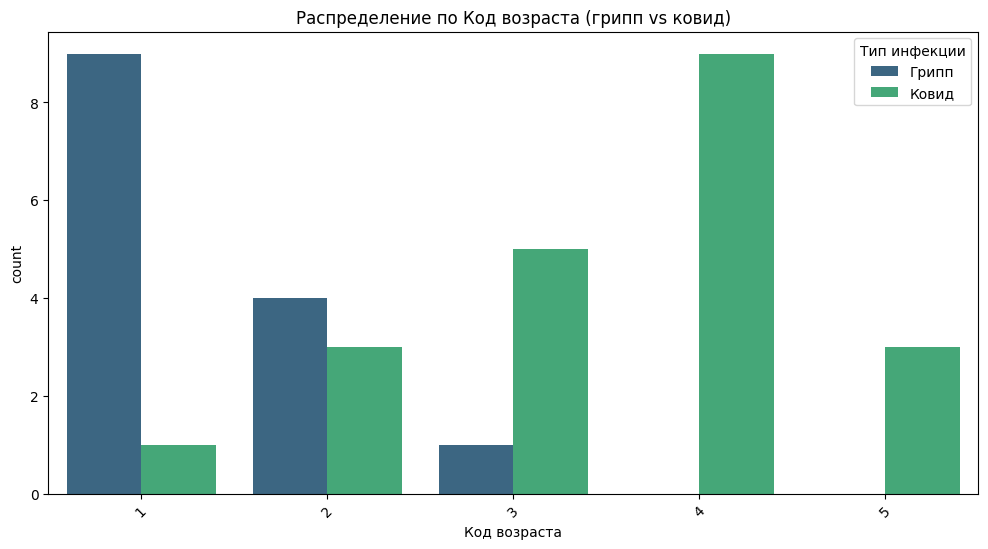

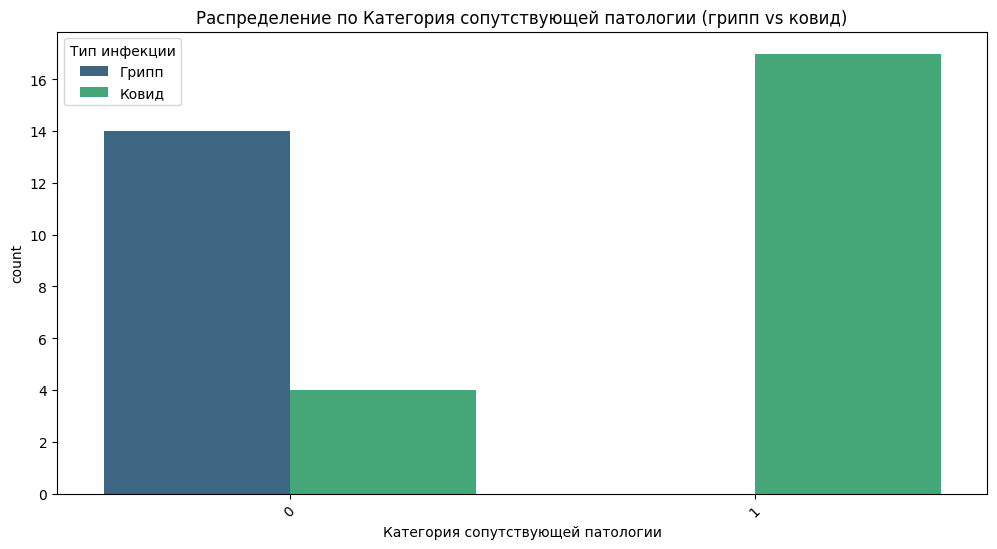

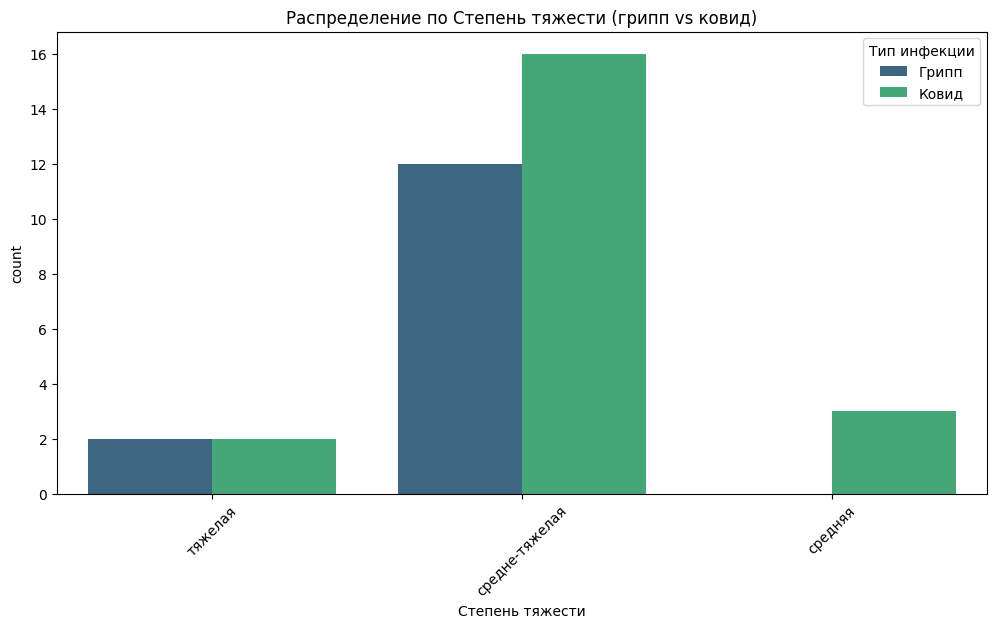

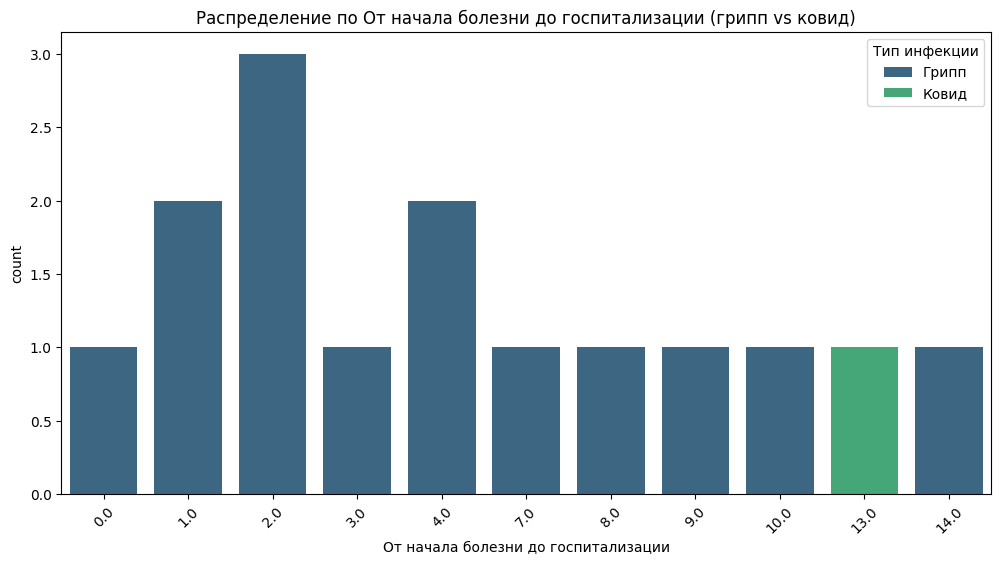

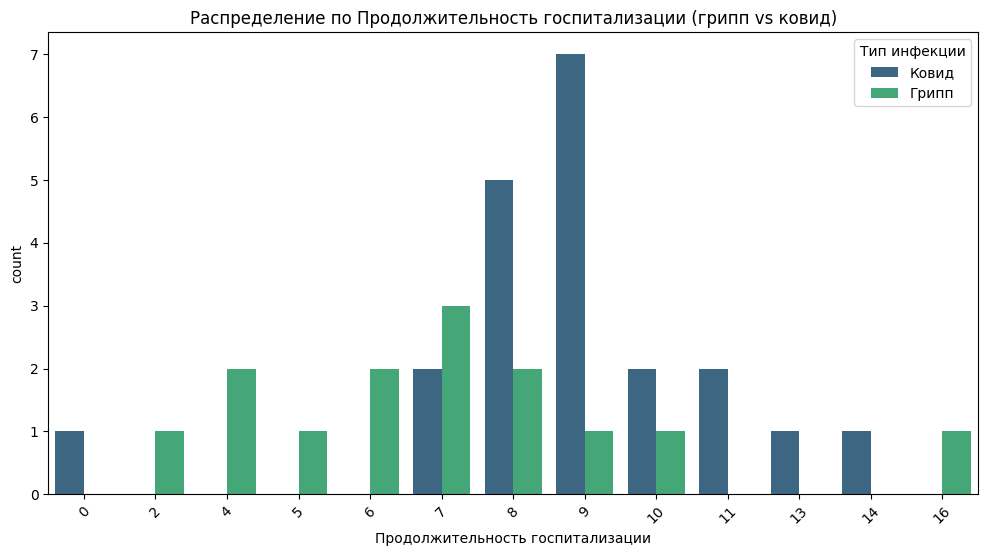

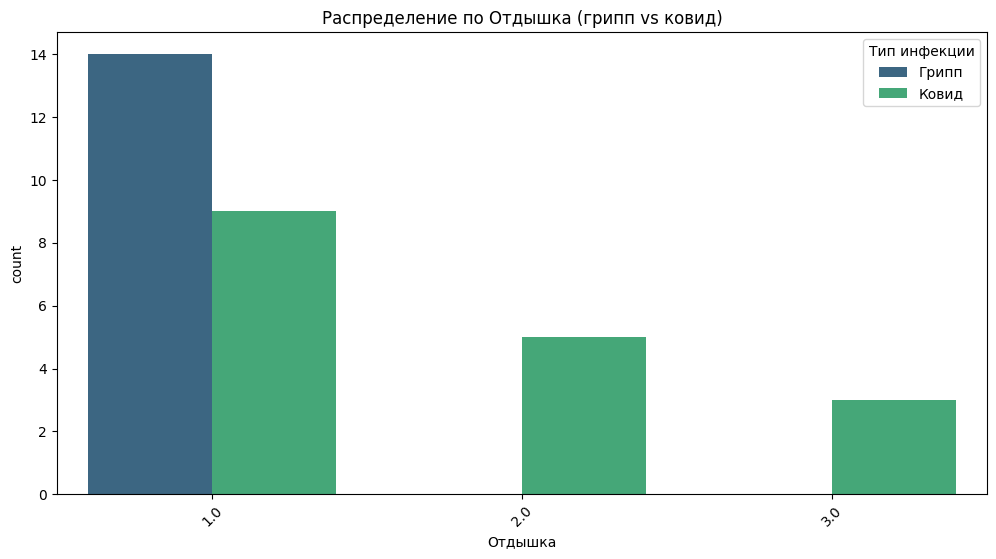

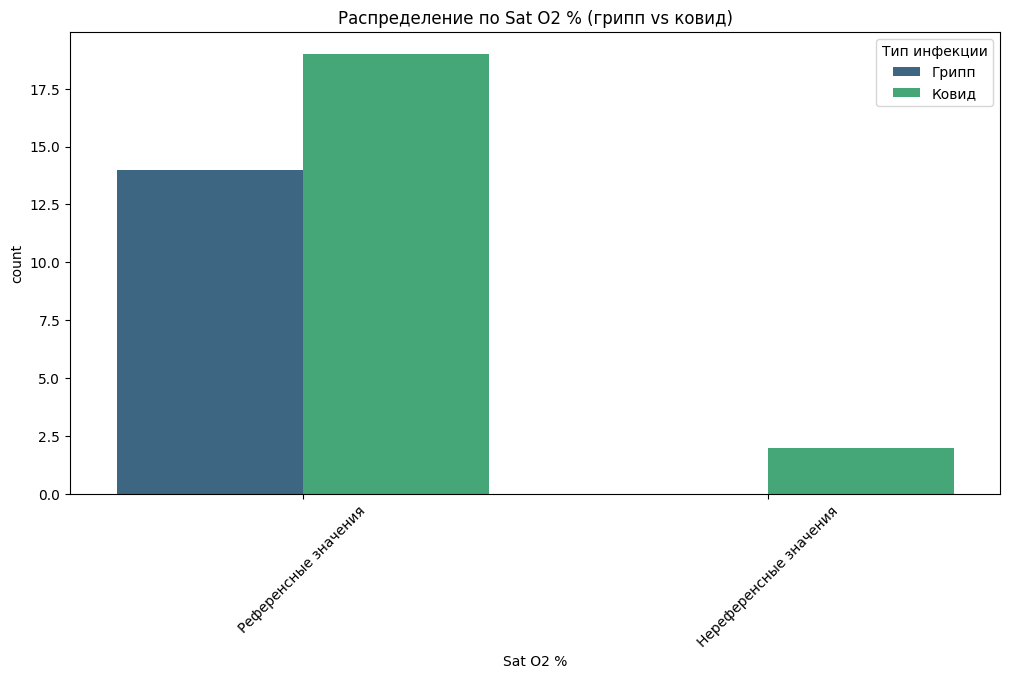

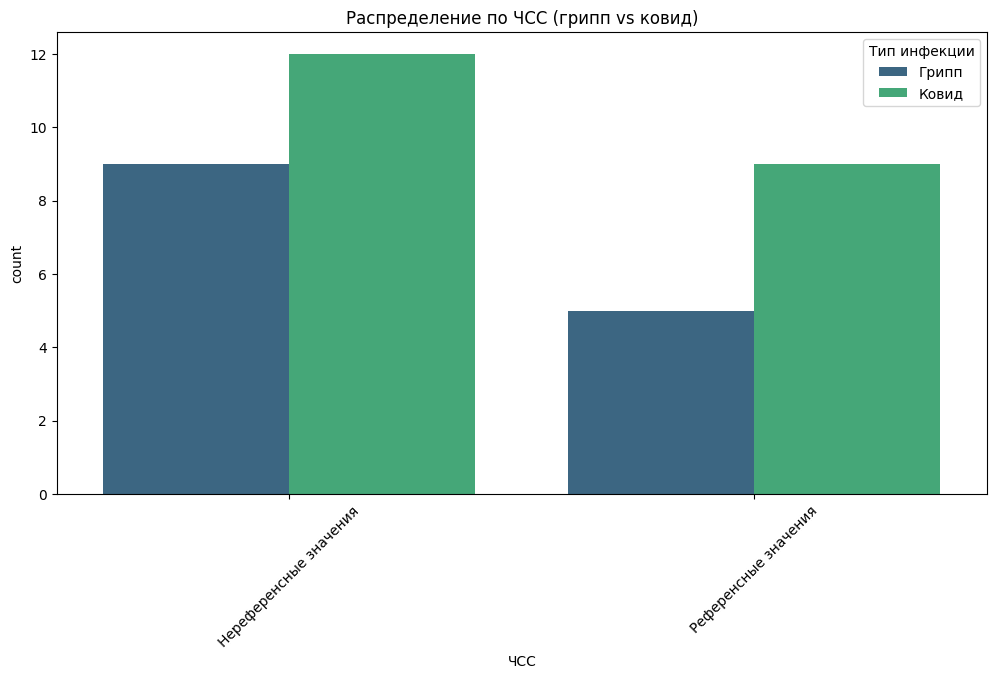

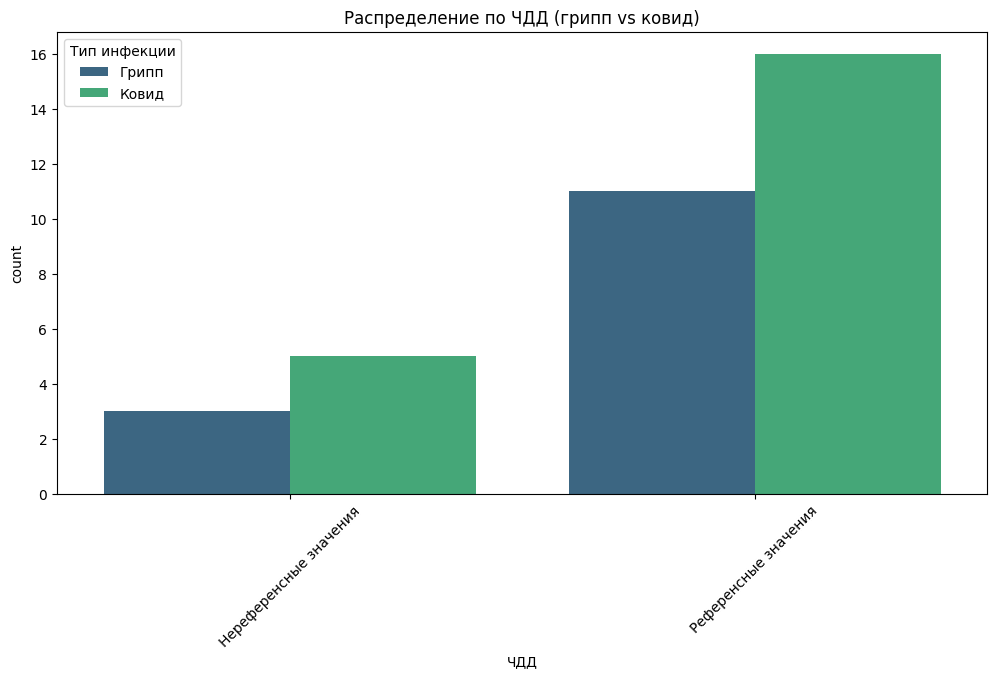

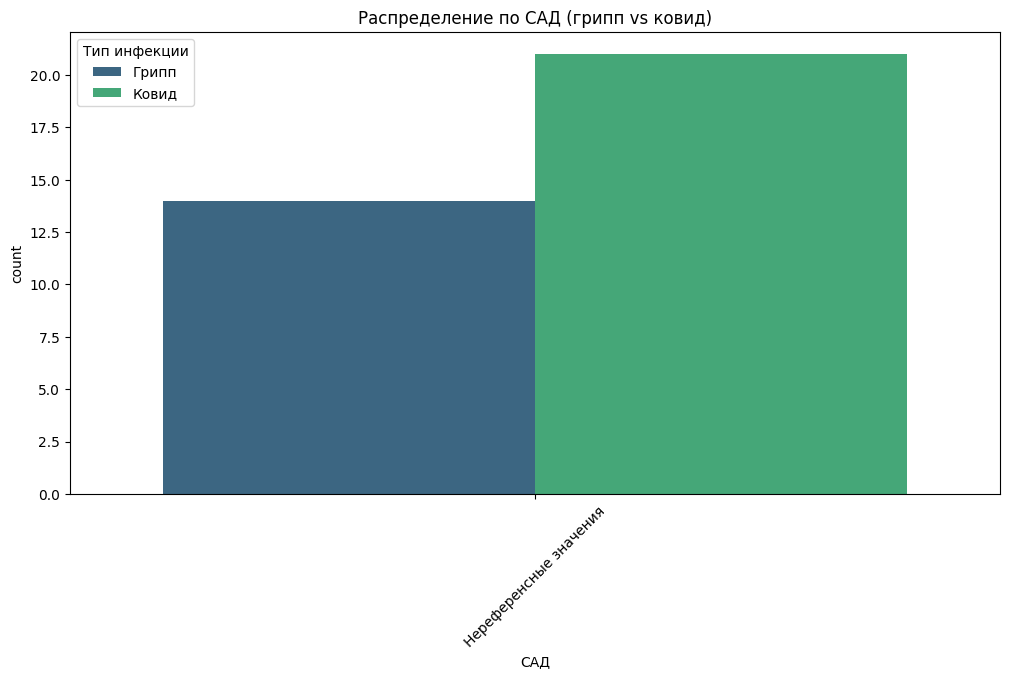

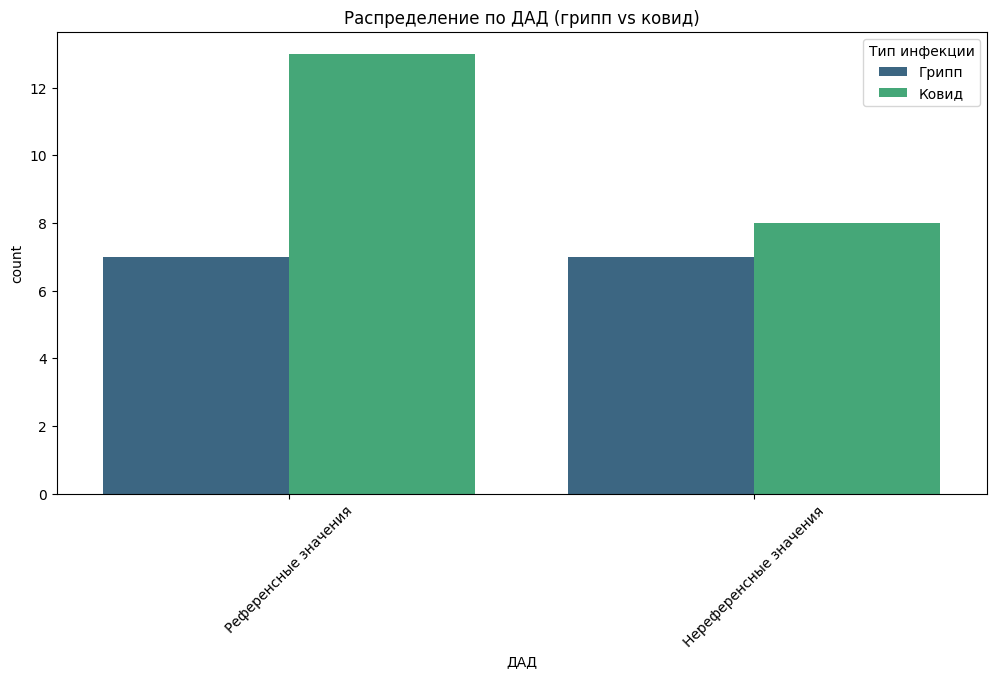

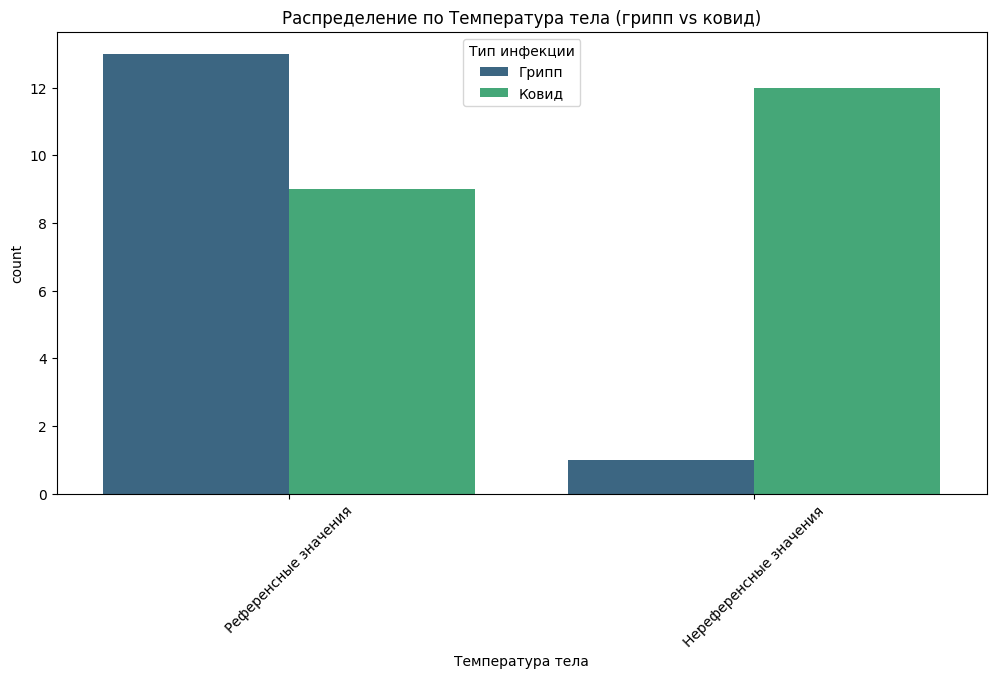

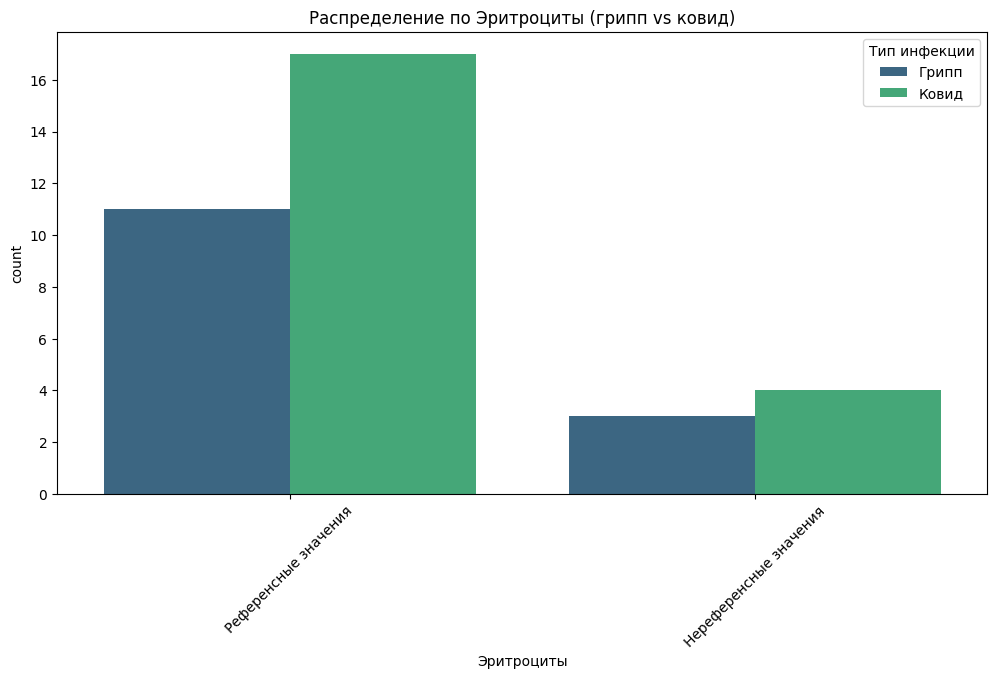

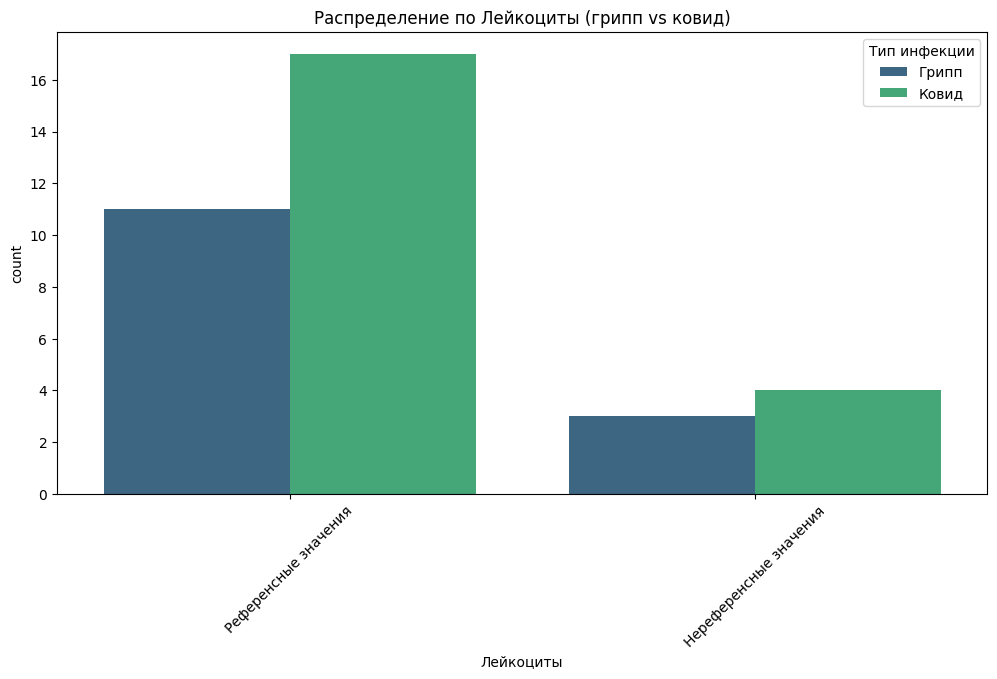

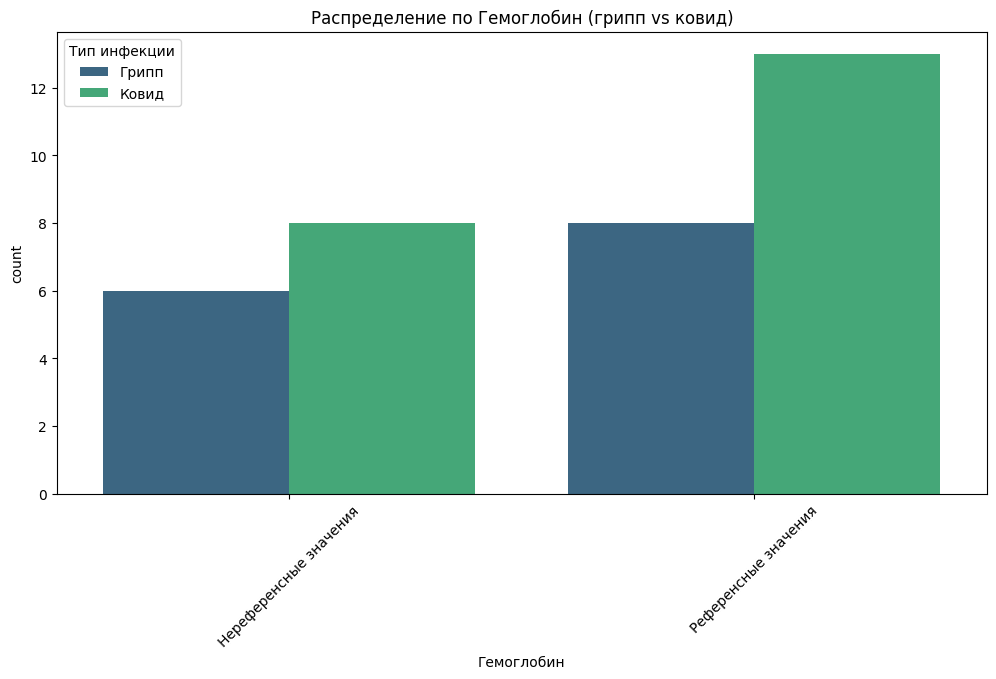

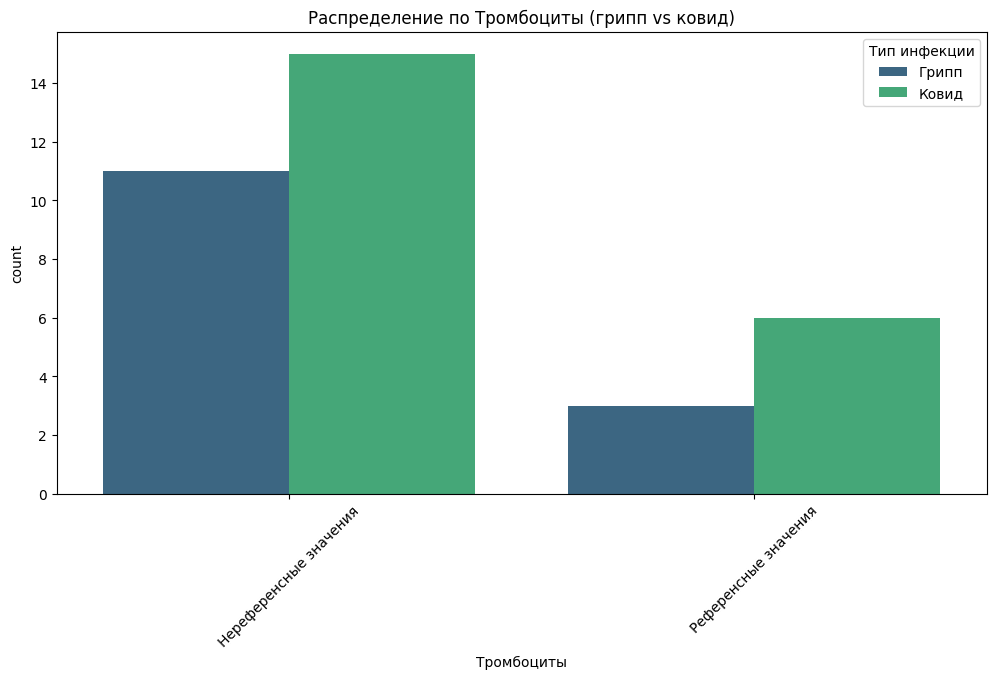

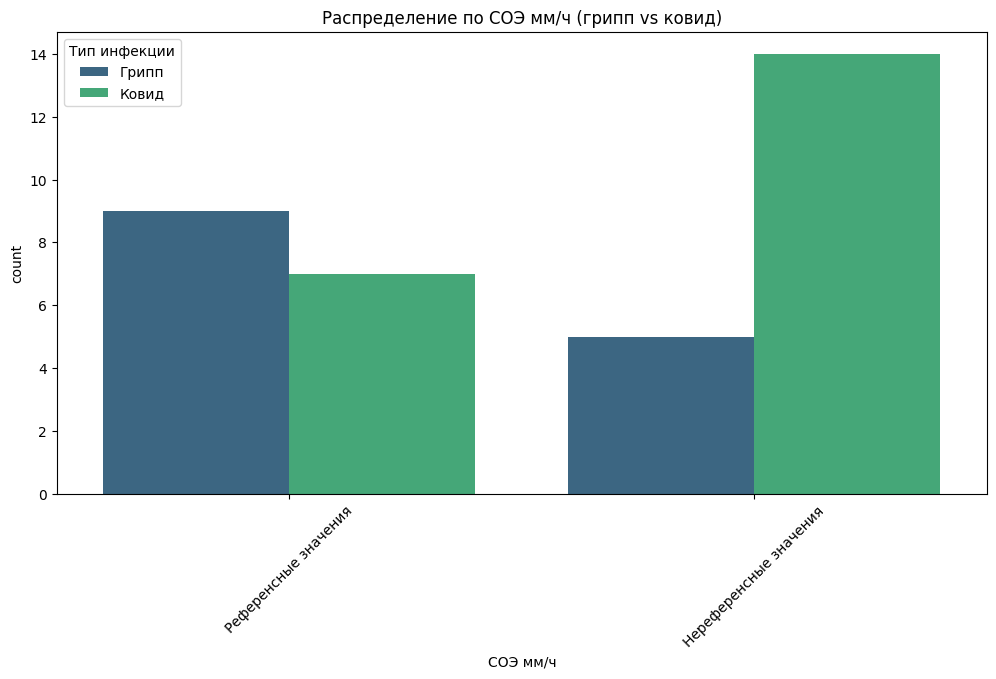

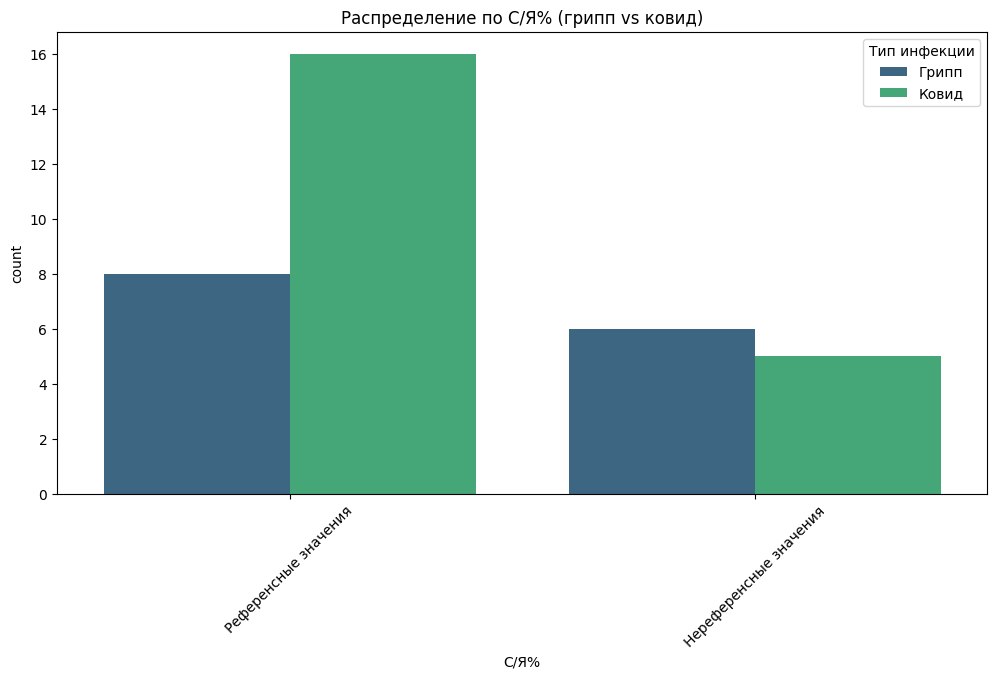

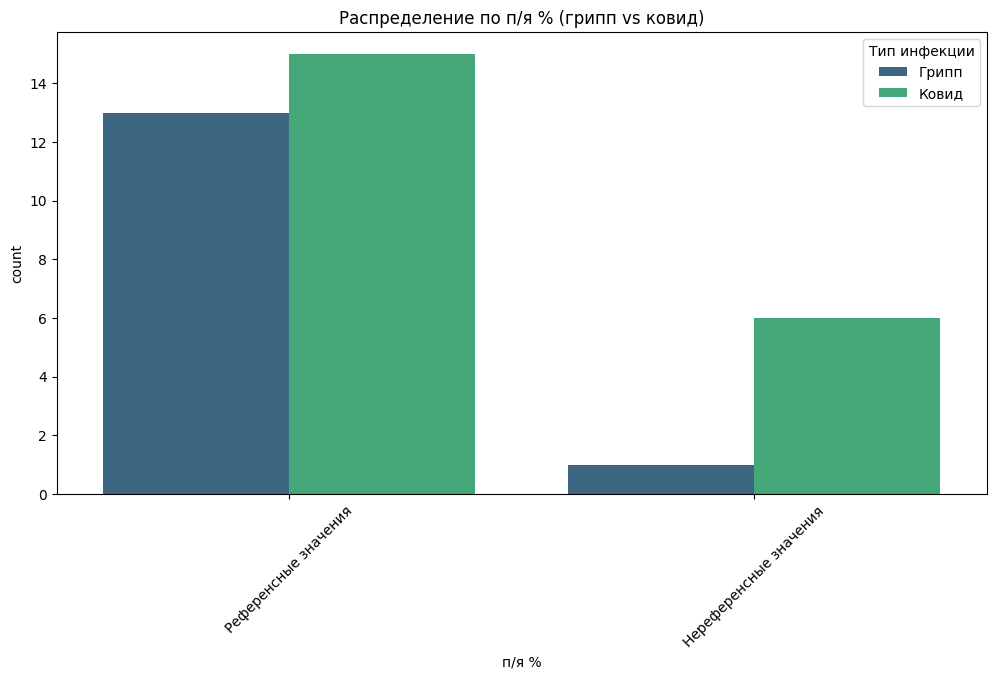

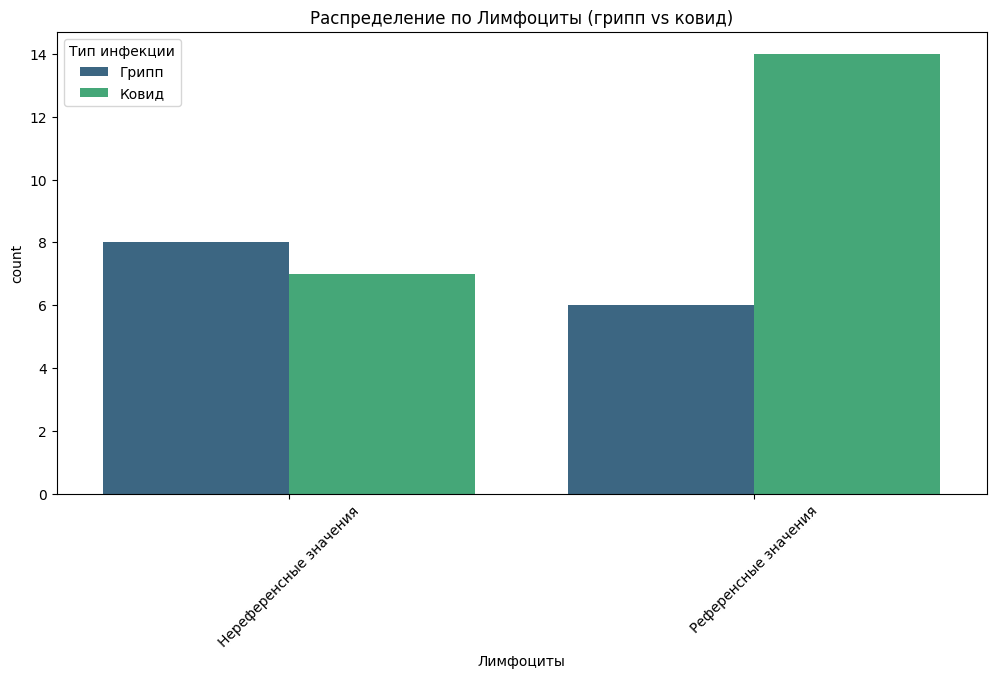

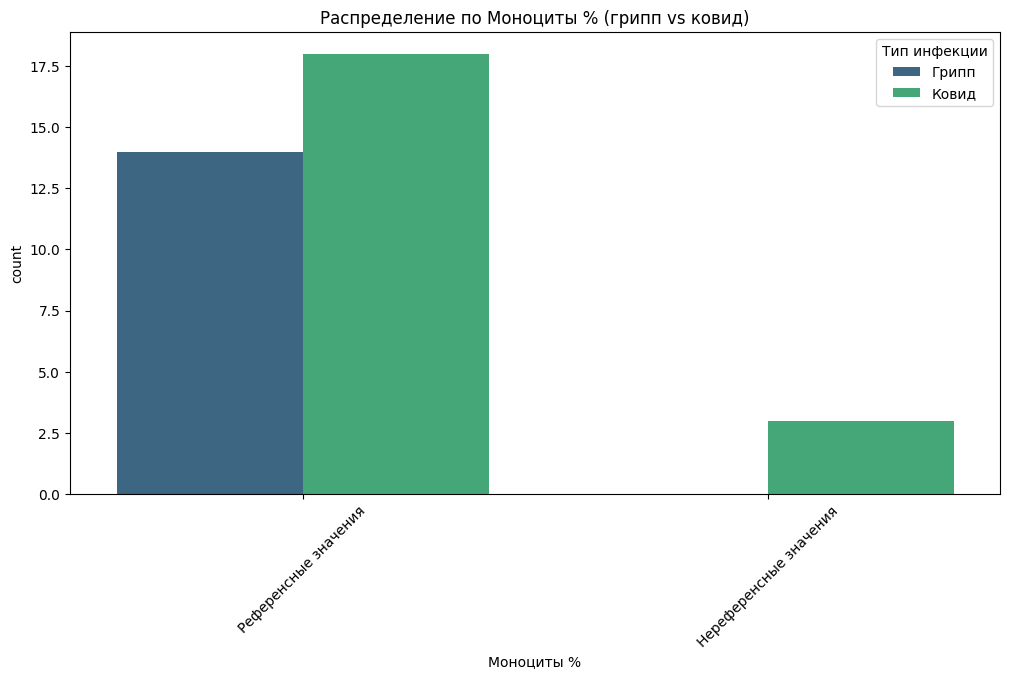

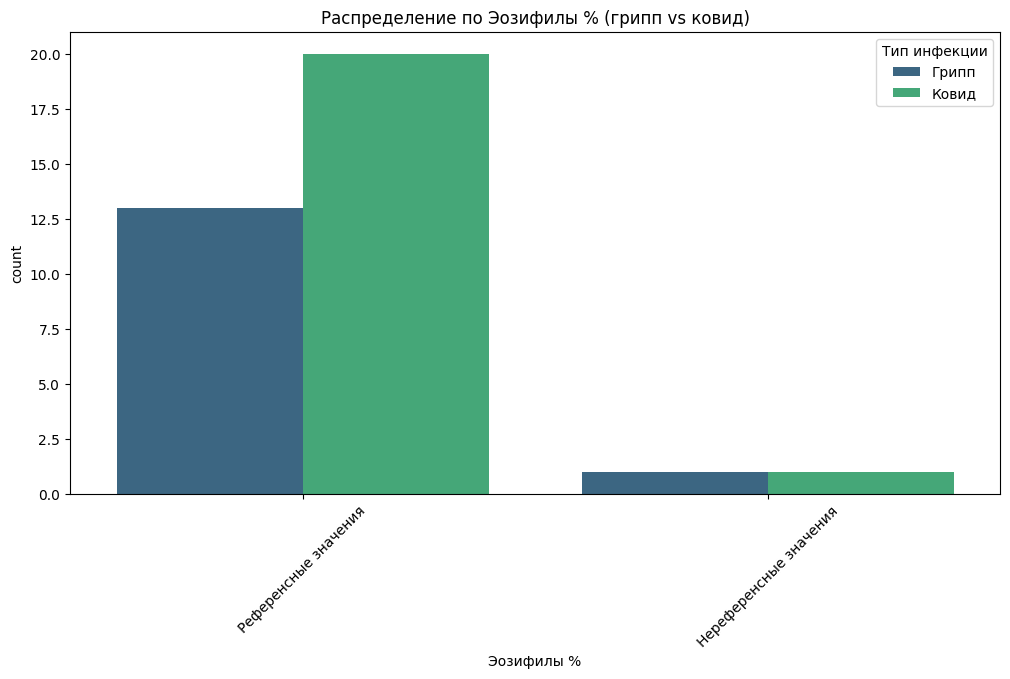

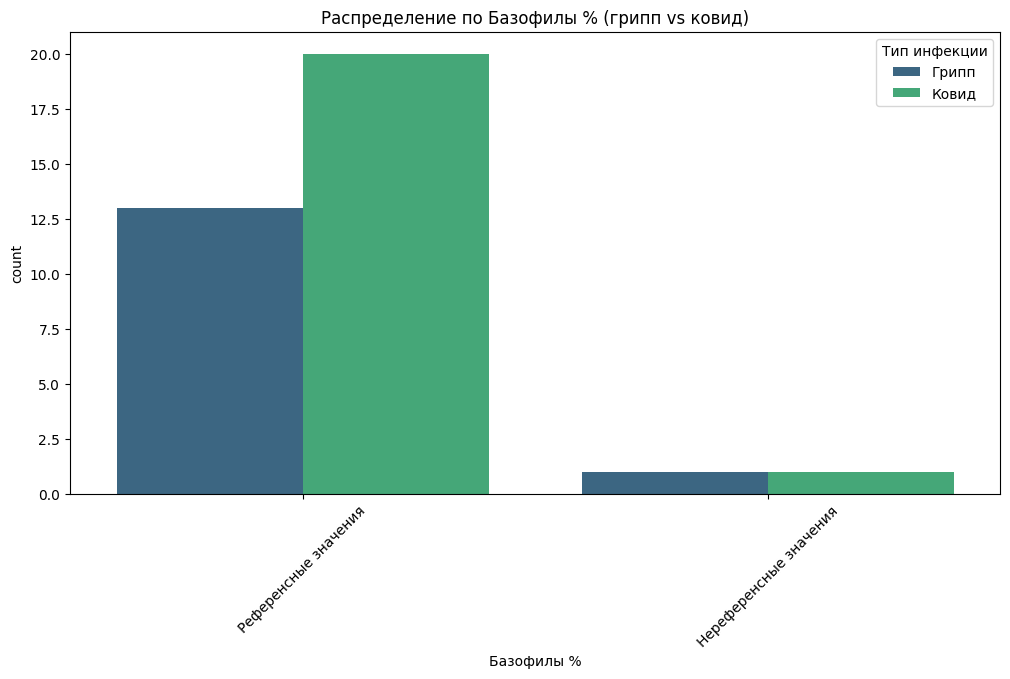

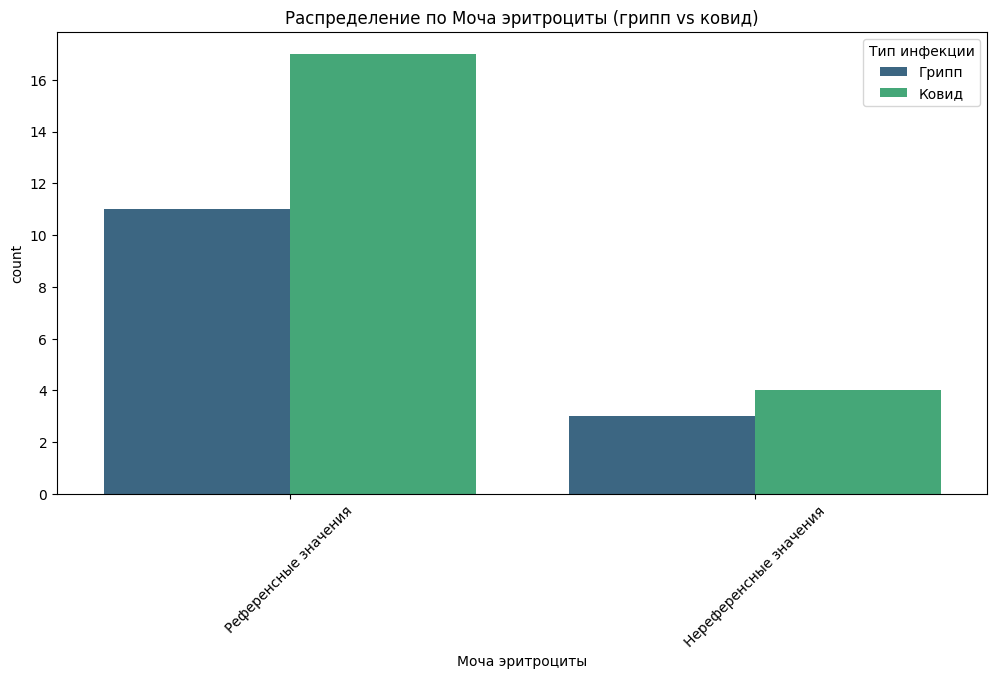

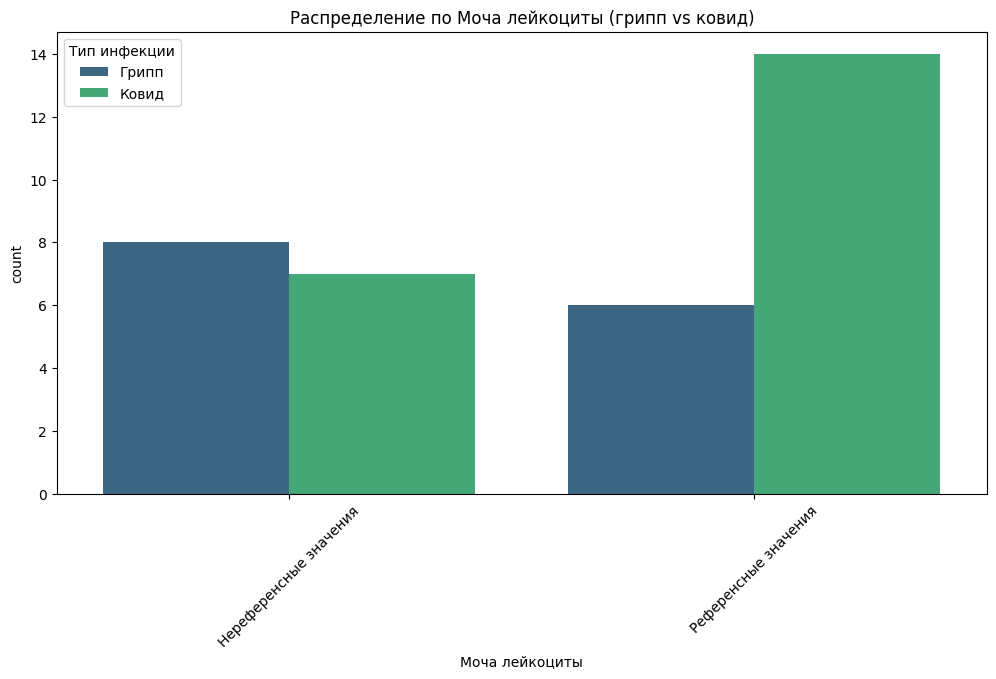

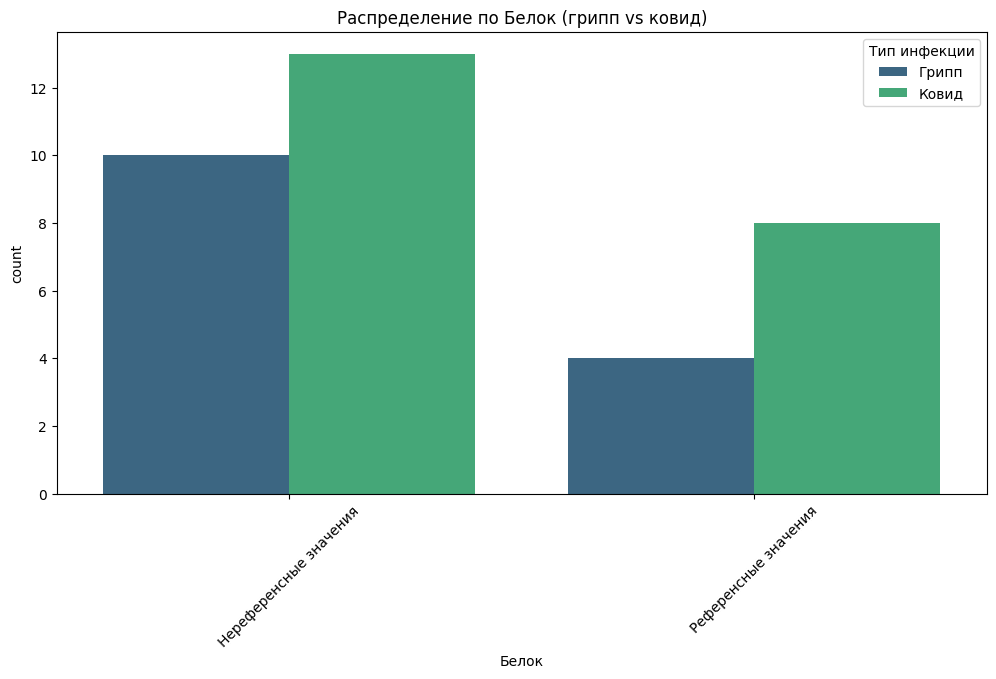

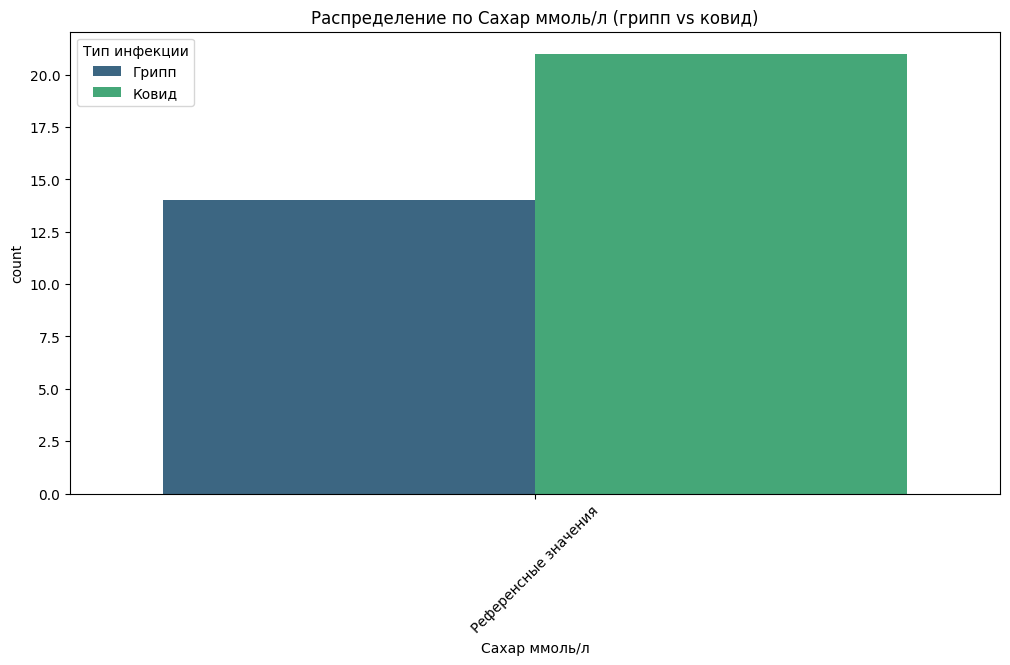

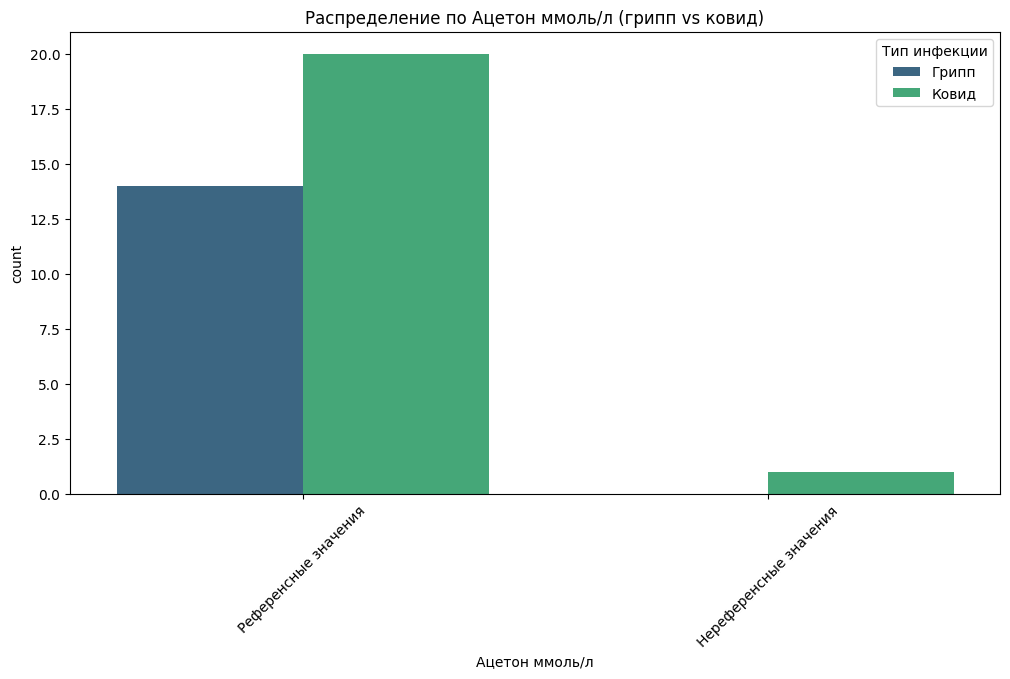

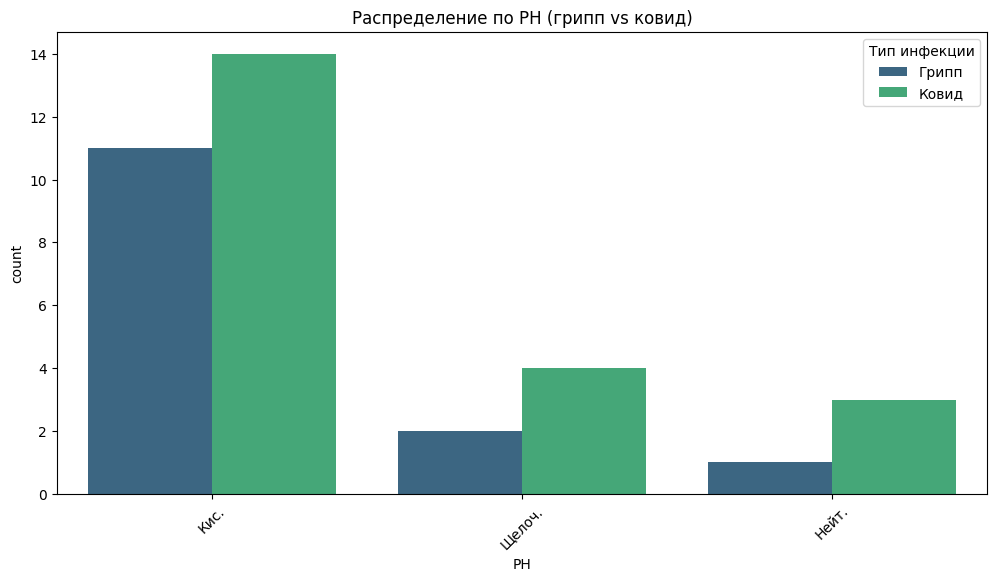

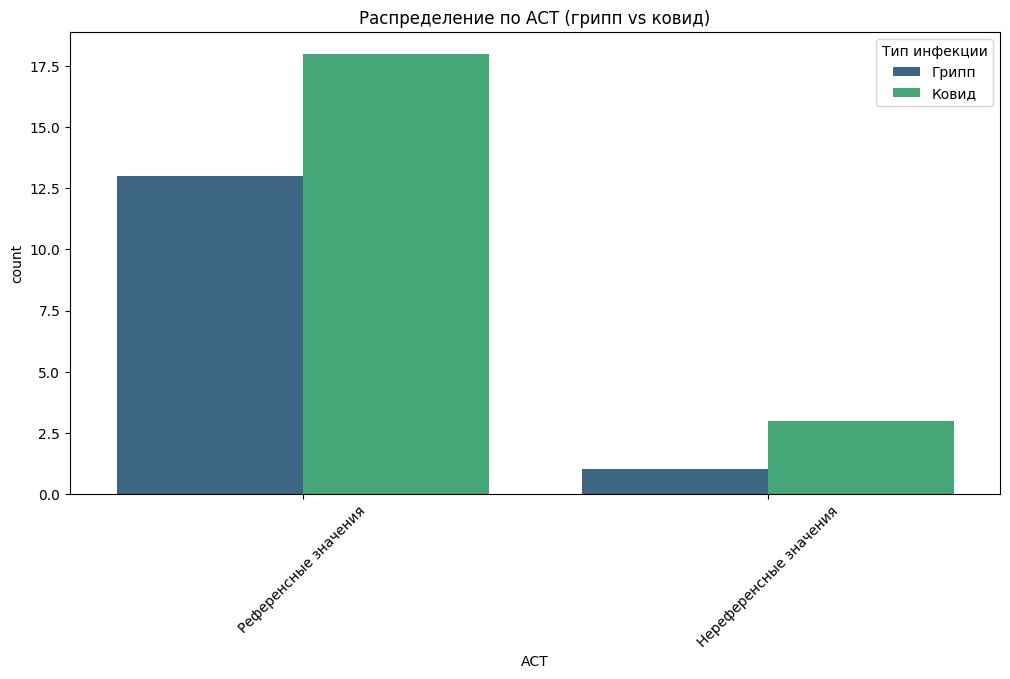

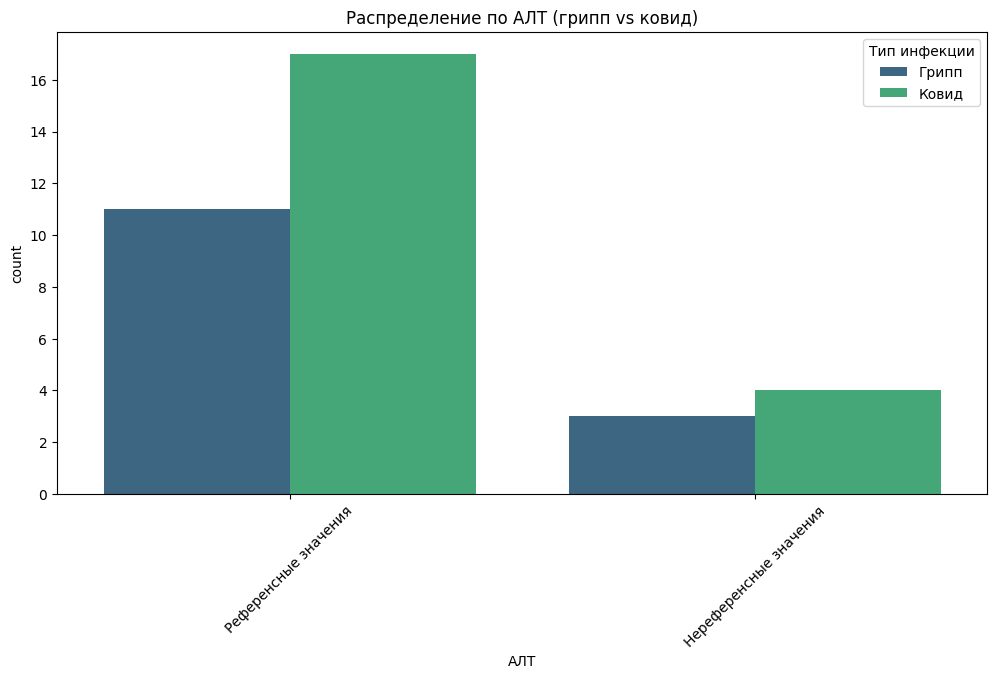

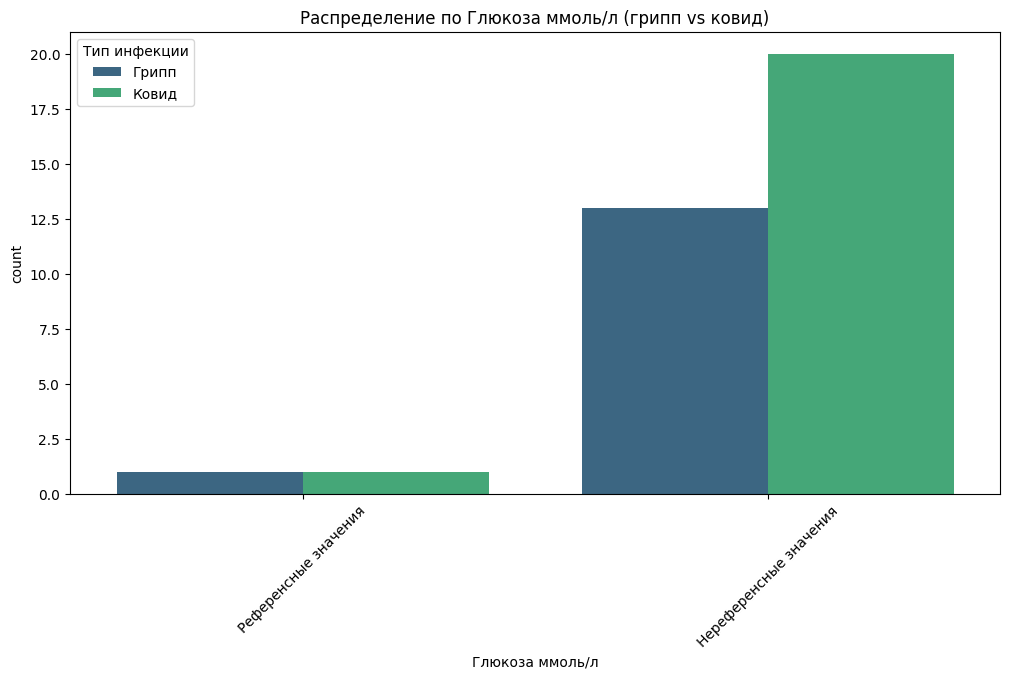

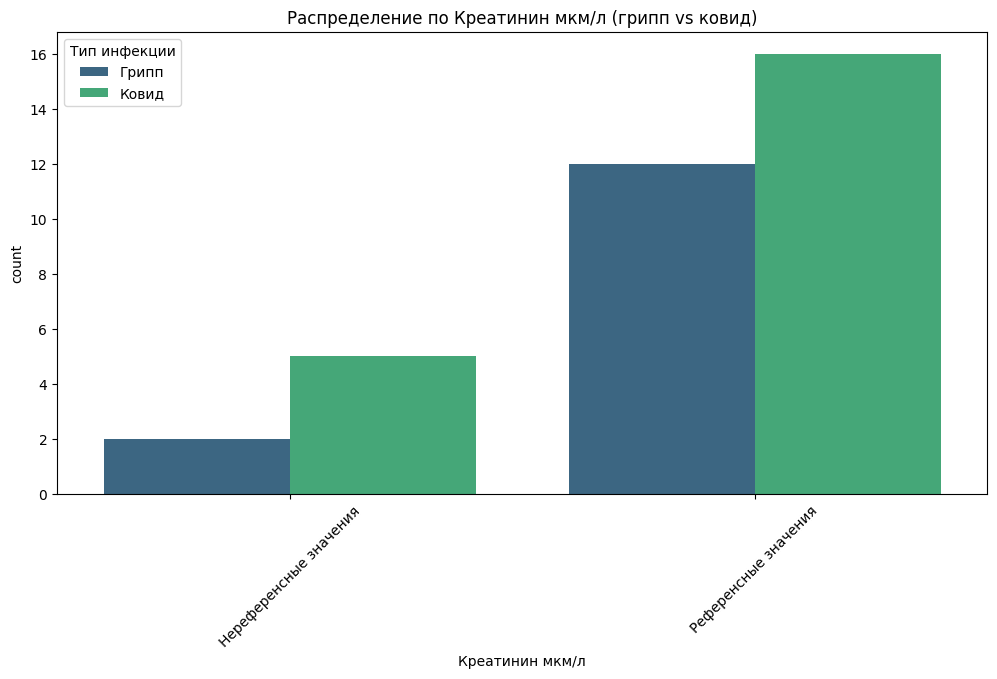

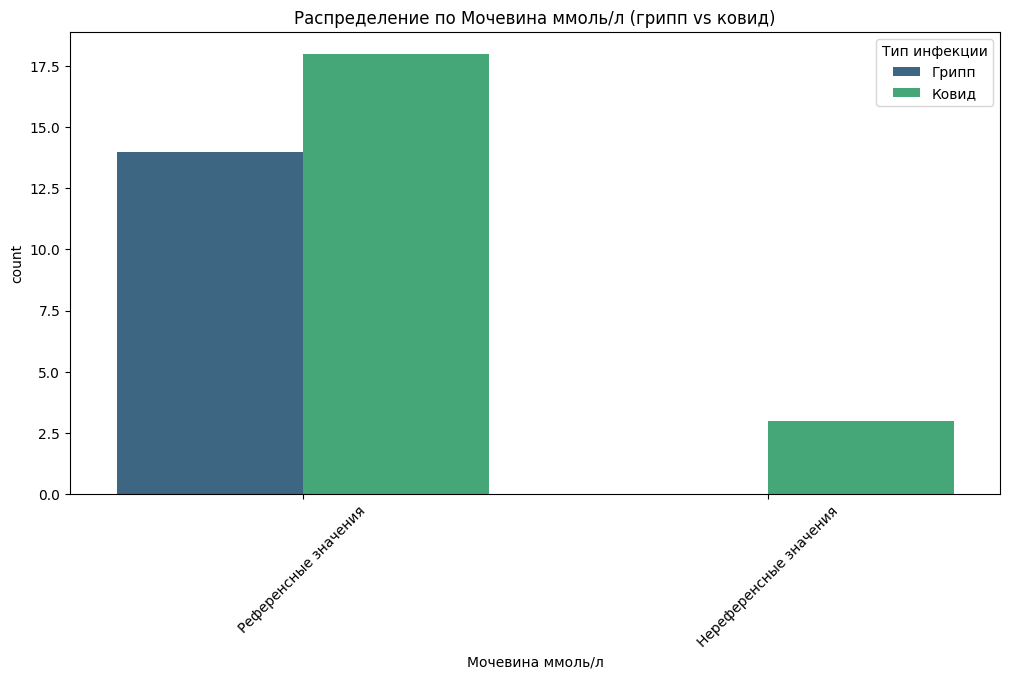

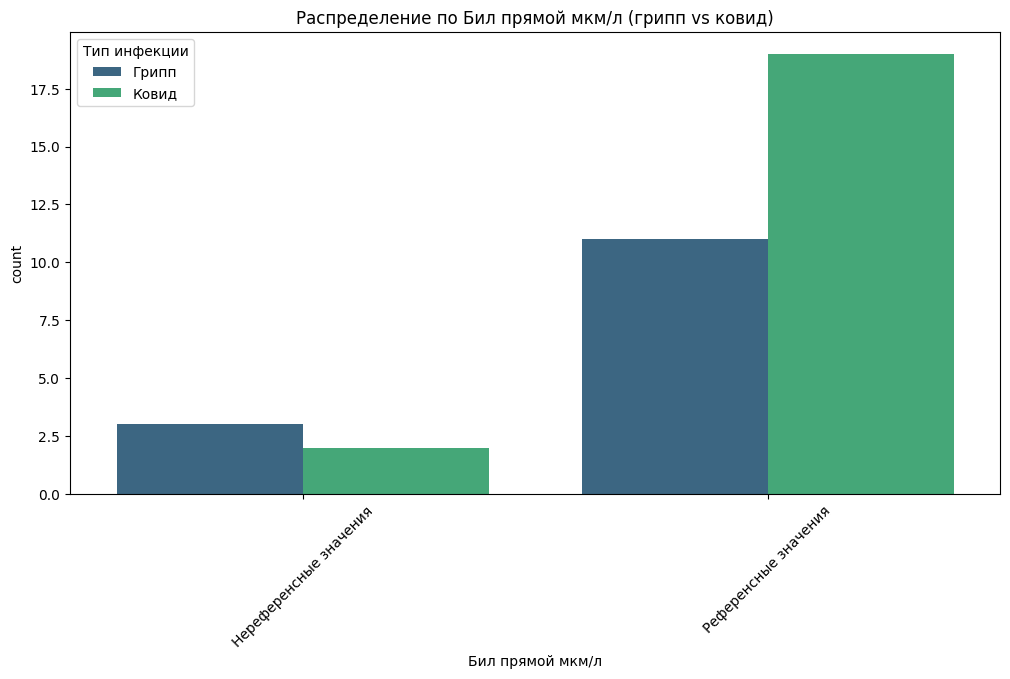

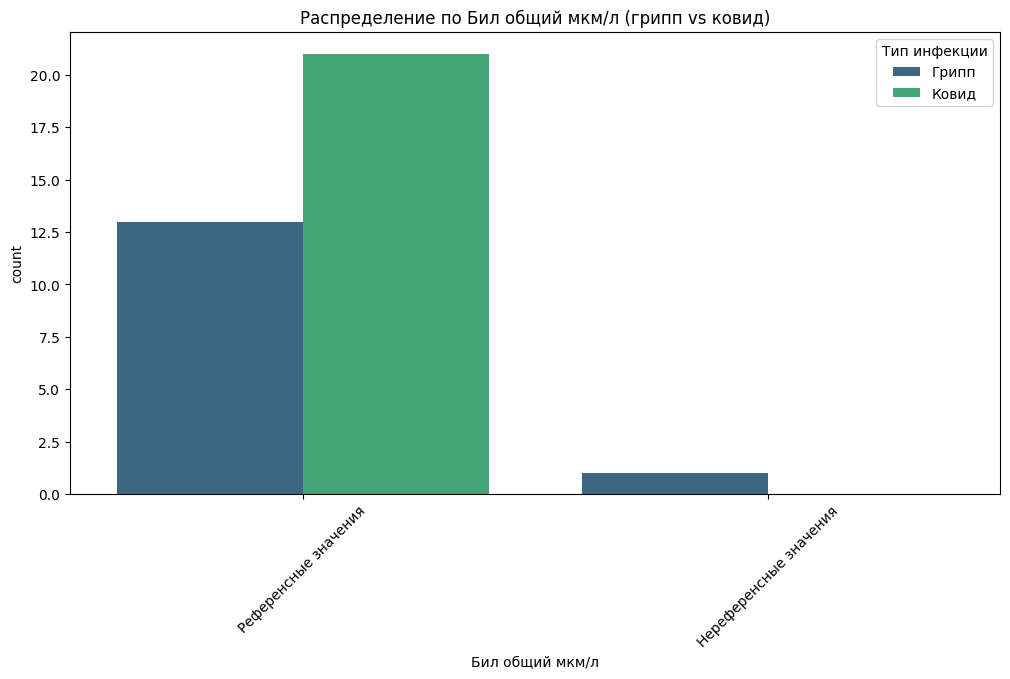

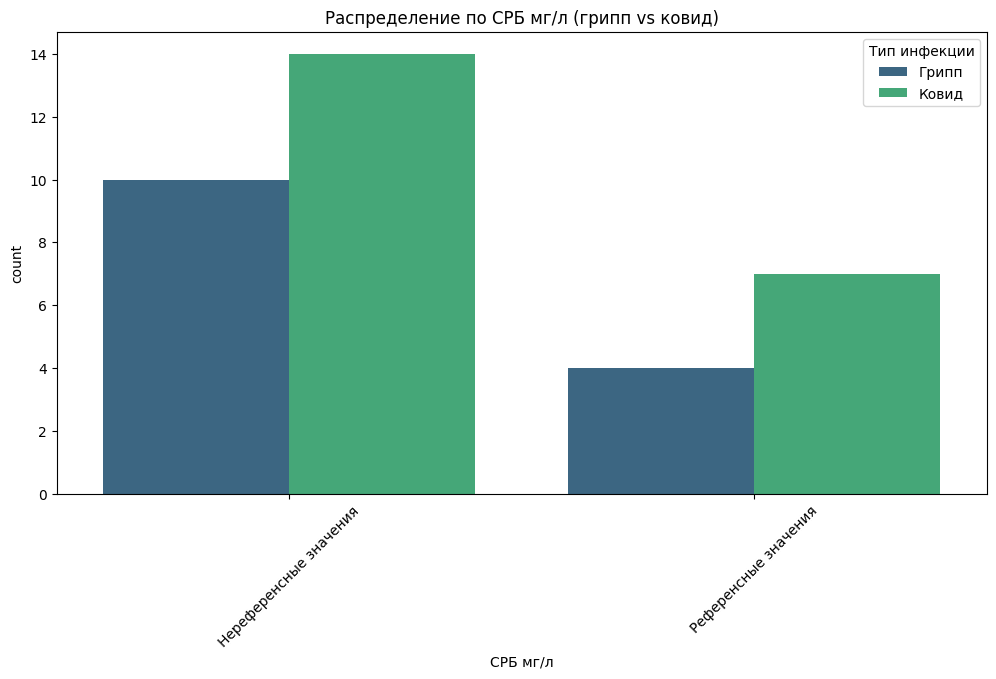

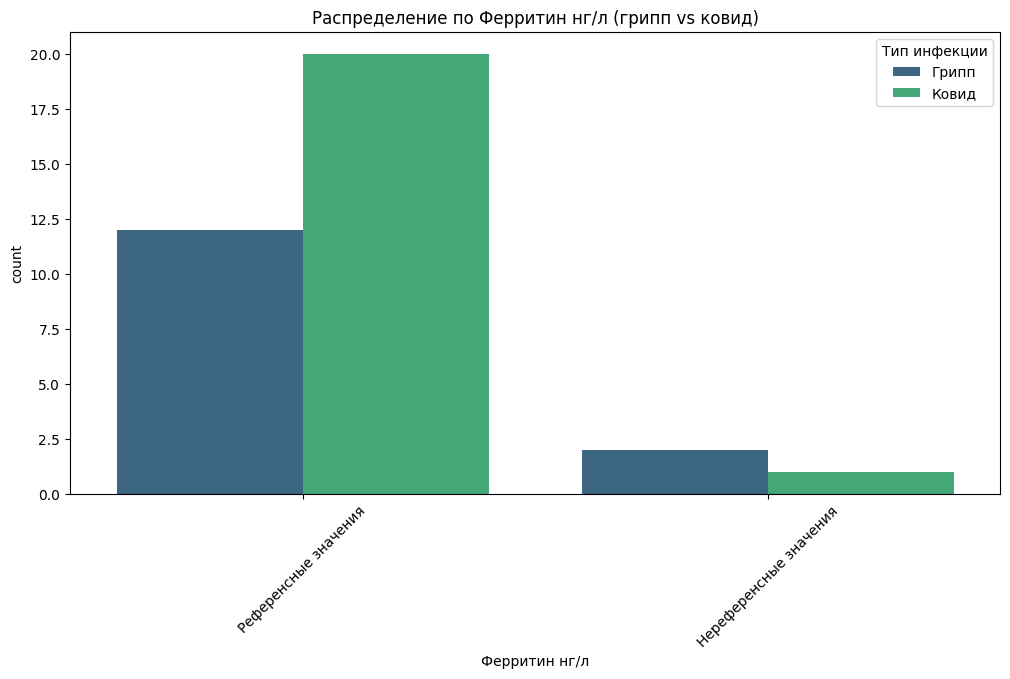

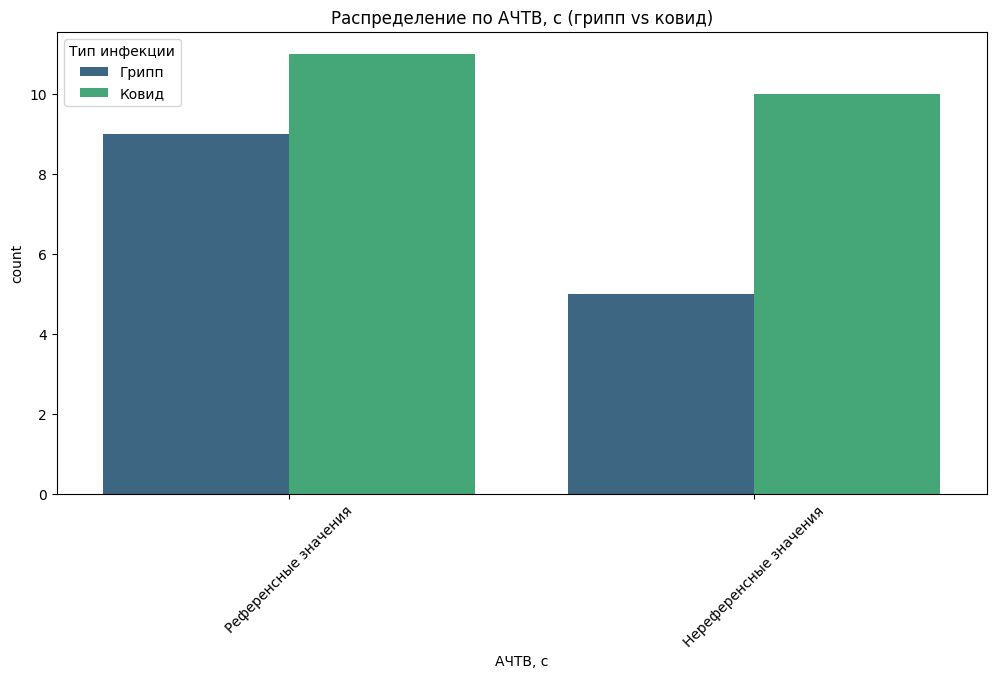

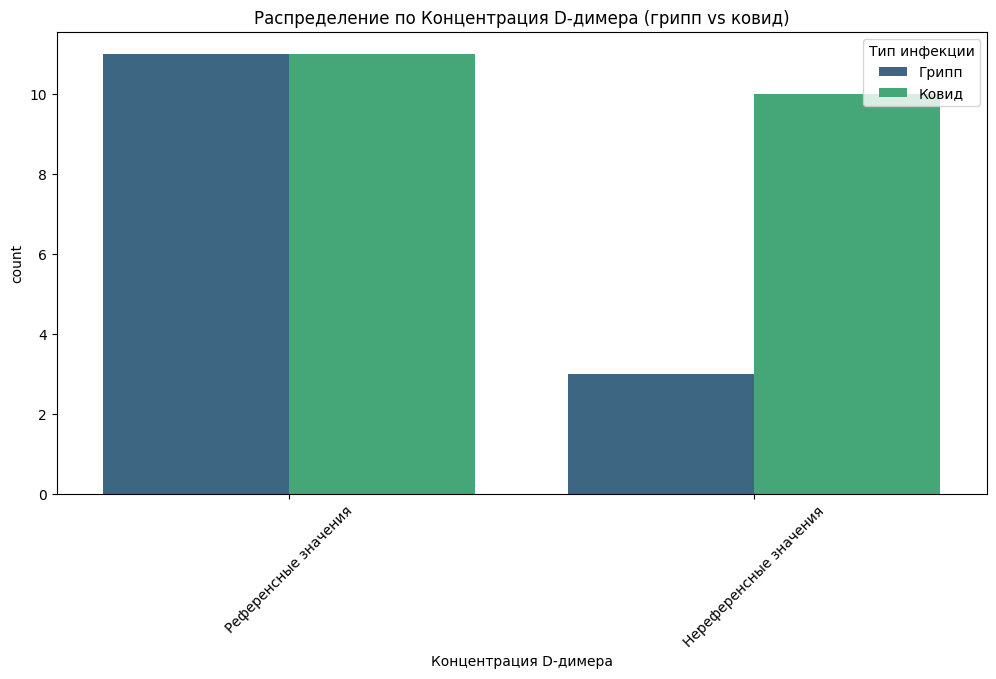

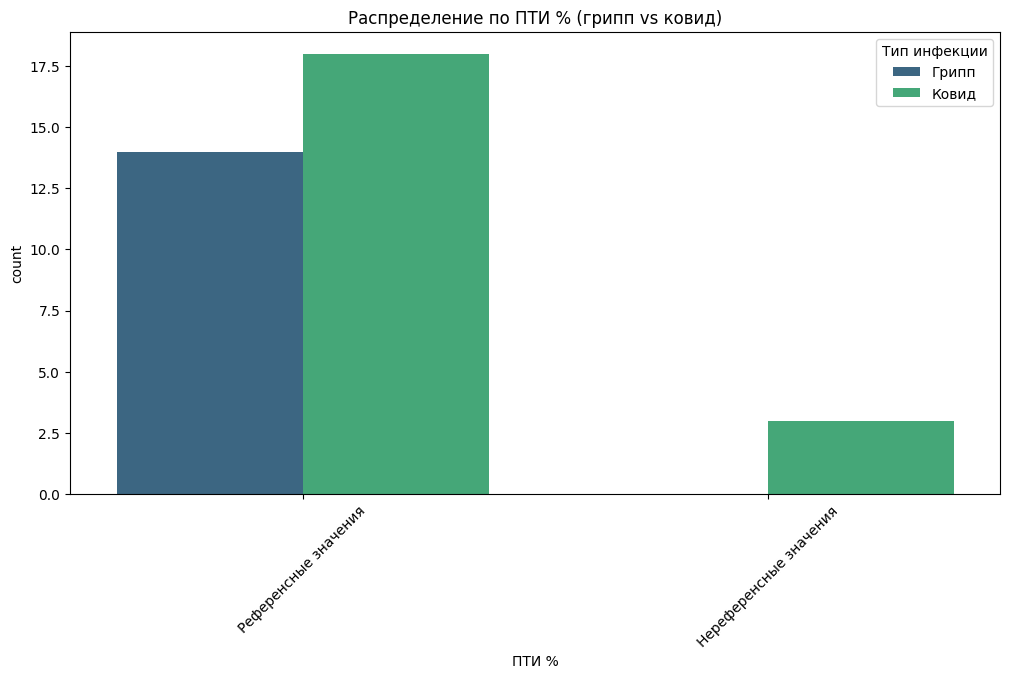

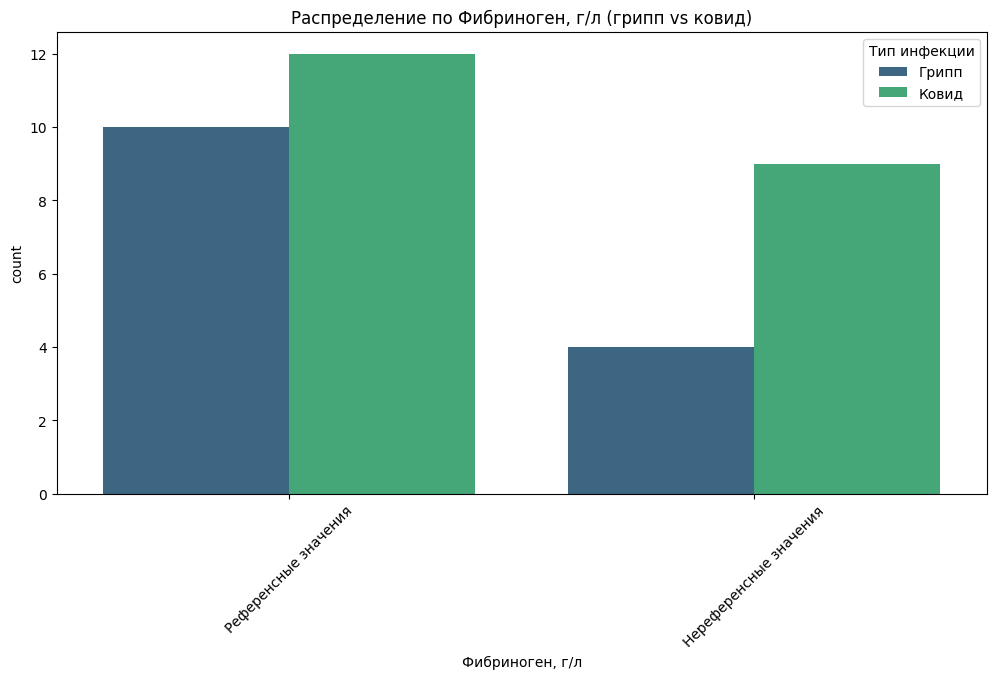

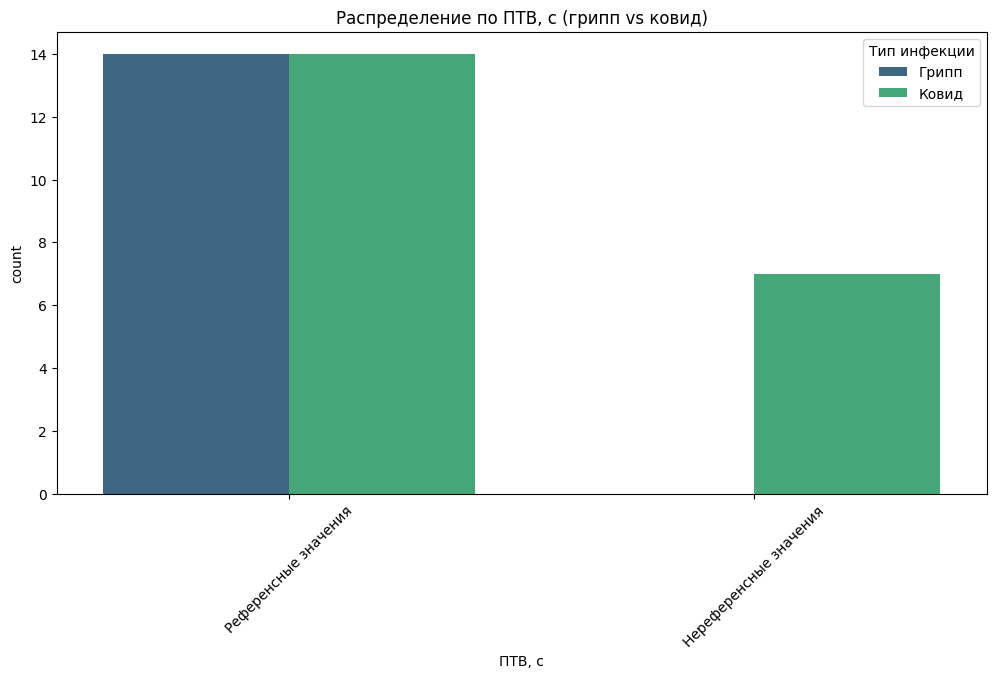

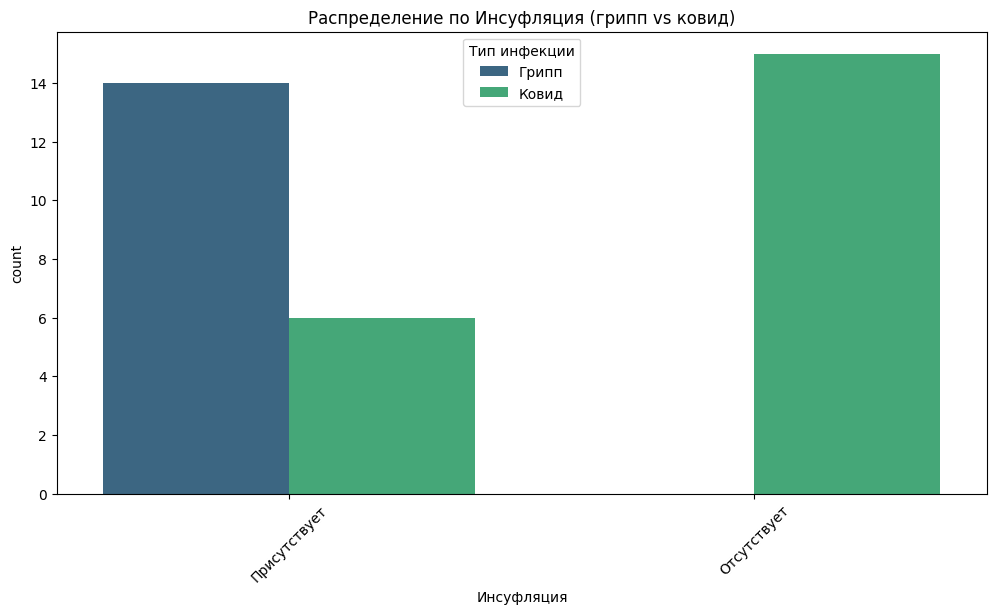

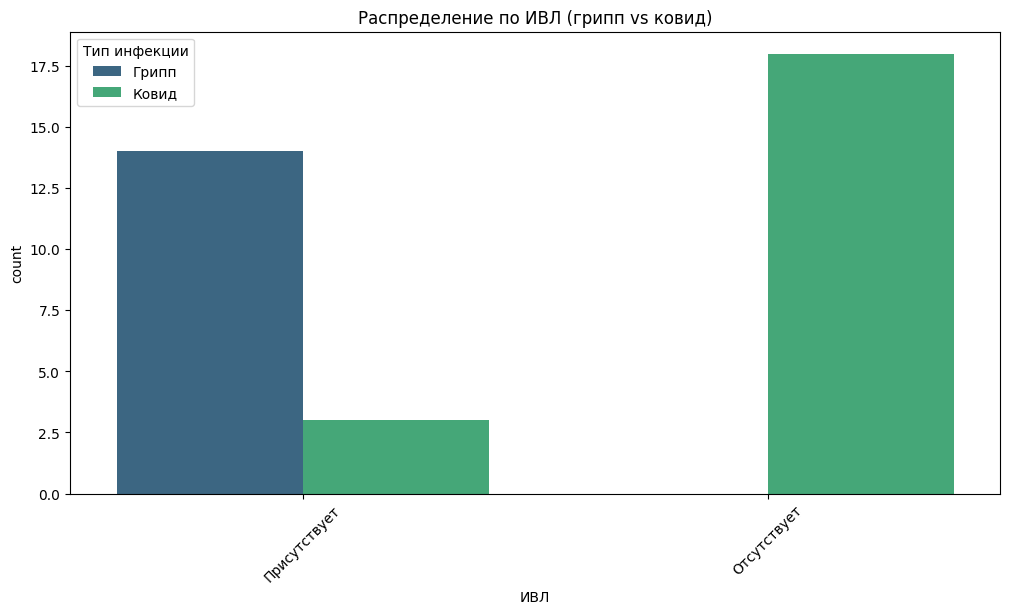

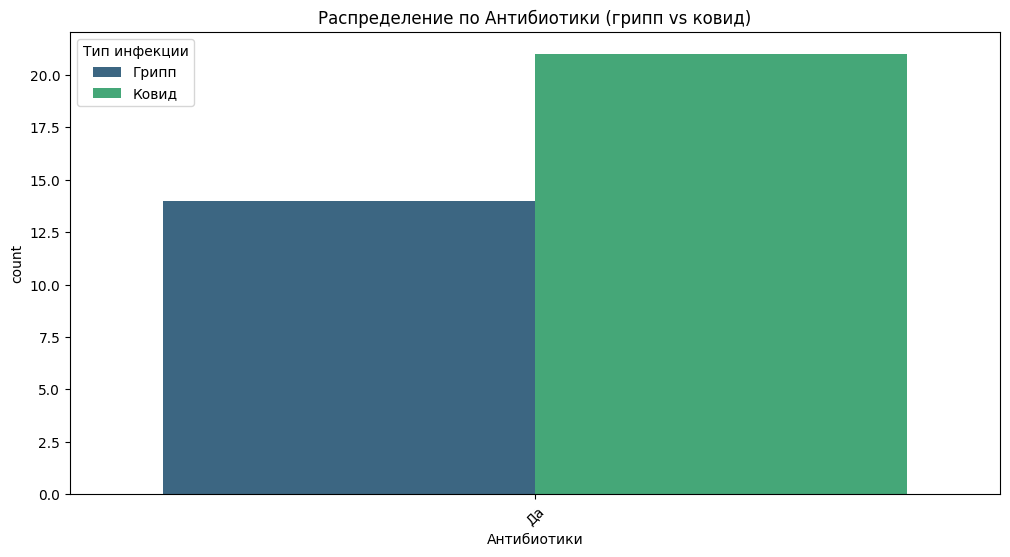

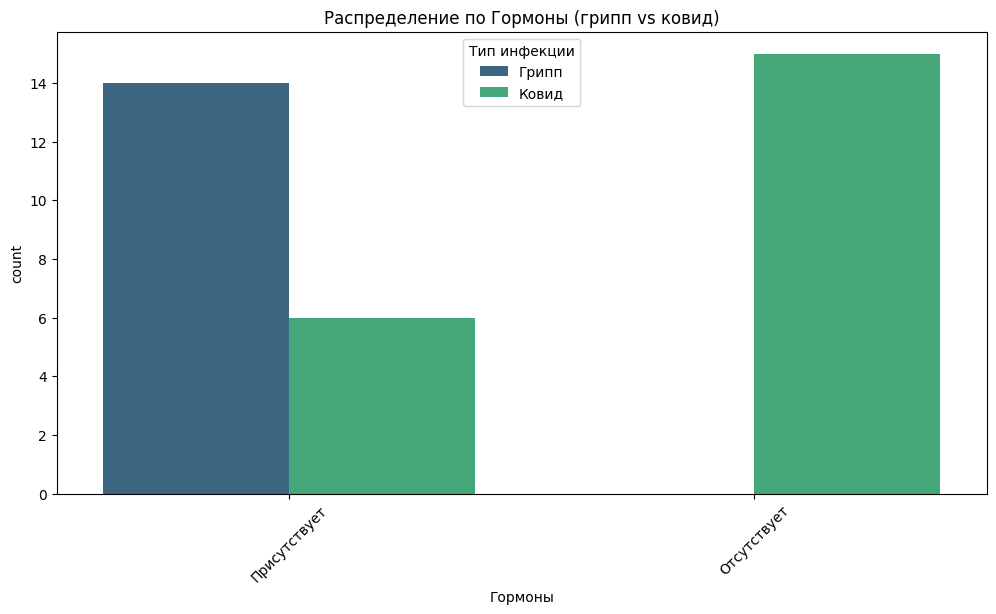

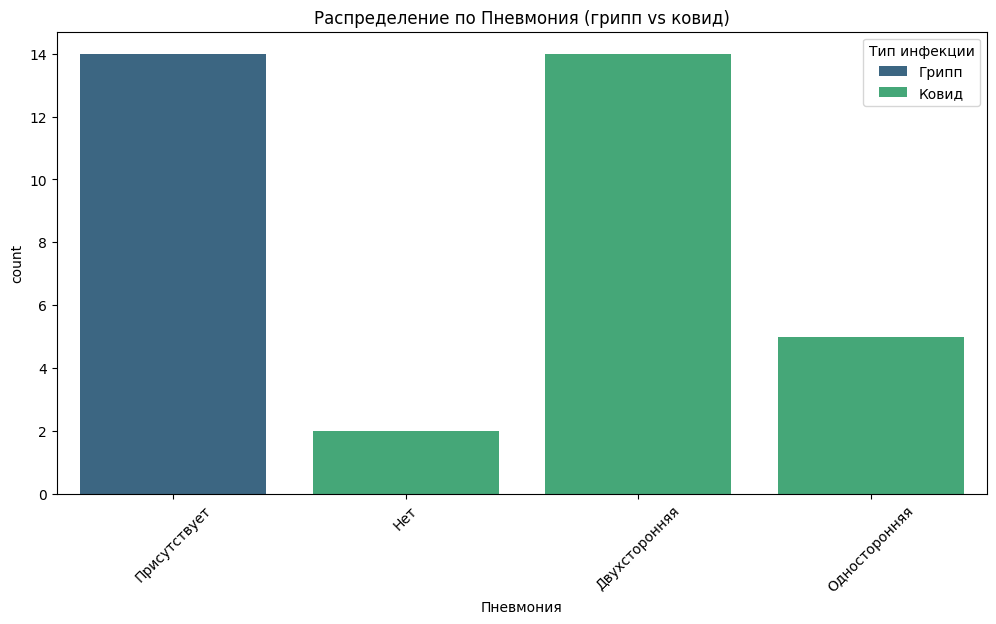

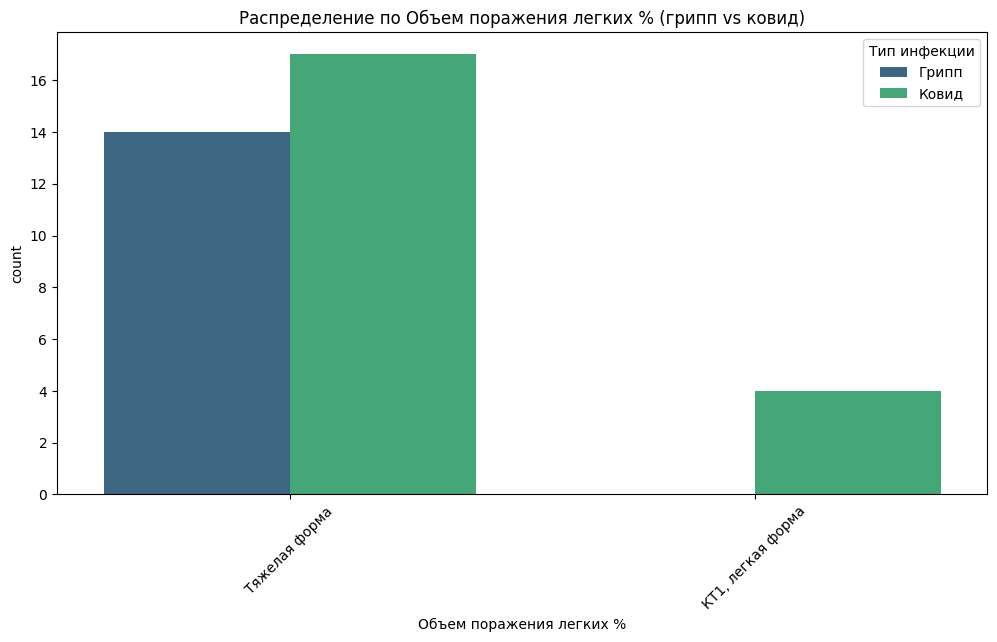

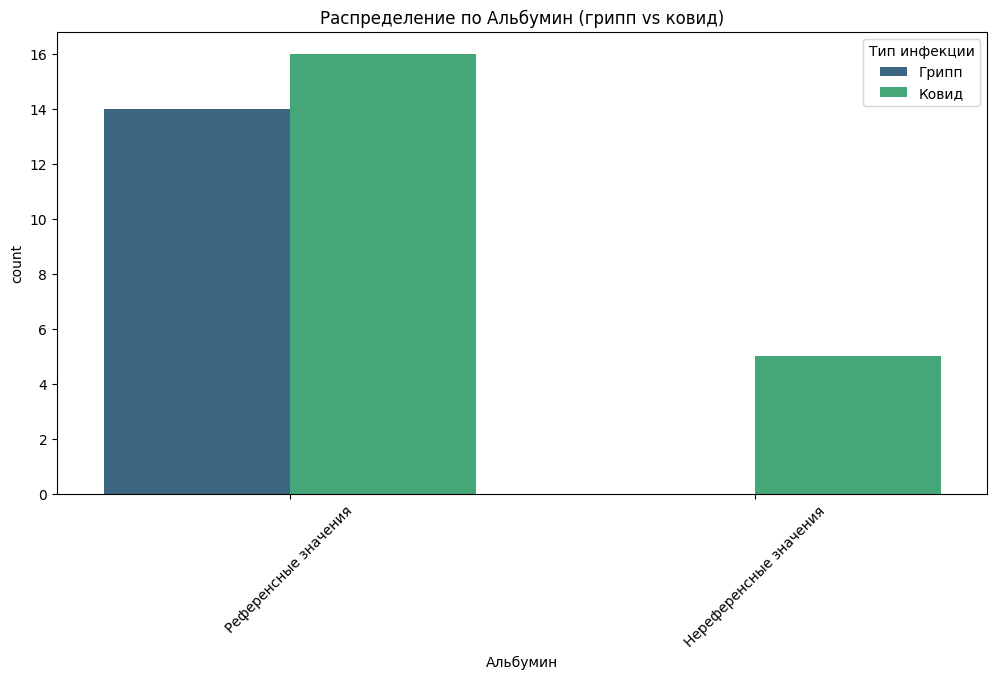

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Загрузка данных
data = pd.read_excel('Очищенные_данные_с_классификацией_мужчины.xlsx',
                    )


# Функция для построения графиков
def plot_column_distribution(column_name):
    plt.figure(figsize=(12, 6))

    # Применяем условие на разделение по COVID-19 и гриппу
    sns.countplot(
        data=data,
        x=column_name,
        hue=data['Шифр'].apply(lambda x: 'Грипп' if 'Г' in str(x) else 'Ковид' if 'кф' in str(x) else ''),
        palette='viridis'
    )

    plt.title(f'Распределение по {column_name} (грипп vs ковид)')
    plt.xticks(rotation=45)
    plt.legend(title="Тип инфекции")
    plt.show()


# Построение графиков для всех столбцов данных
for column in data.columns:
    if column not in ['Шифр', '№', 'Возраст', 'Пол']:  # Исключаем ненужные столбцы
        plot_column_distribution(column)




Предсказание методами машинного обучения

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка данных
data = pd.read_excel('Очищенные_данные.xlsx')

# Убираем строки с NaN в целевой переменной 'Шифр'
data = data.dropna(subset=['Шифр'])

# Преобразуем 'Шифр' в бинарную переменную: если 'Г' - грипп, если 'кф' - ковид
data['Целевая_переменная'] = data['Шифр'].apply(lambda x: 1 if 'кф' in str(x).lower() else 0)

# Выбираем только нужные столбцы для признаков (X) и целевой переменной (y)
X = data[['Пол', 'Возраст', 'Продолжительность госпитализации', 'Категория сопутствующей патологии']]
y = data['Целевая_переменная']  # Теперь целевая переменная - бинарная

# Обработка категориальных признаков
label_encoder = LabelEncoder()
X.loc[:, 'Пол'] = label_encoder.fit_transform(X['Пол'])

# Применяем One Hot Encoding для 'Категория сопутствующей патологии'
X = pd.get_dummies(X, columns=['Категория сопутствующей патологии'], drop_first=True)

# Преобразуем числовые столбцы в формат float (если они еще не в числовом формате)
X['Возраст'] = pd.to_numeric(X['Возраст'], errors='coerce')
X['Продолжительность госпитализации'] = pd.to_numeric(X['Продолжительность госпитализации'], errors='coerce')

# Убираем строки с NaN после преобразования
X = X.dropna()
y = y[X.index]  # Убираем соответствующие значения y, если есть строки с NaN в X

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 84.62%


хи-квадрат(важность показателей)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Загрузка данных
data = pd.read_excel('Очищенные_данные.xlsx')

# Убираем строки с NaN в целевой переменной 'Шифр'
data = data.dropna(subset=['Шифр'])

# Убираем лишние пробелы в названиях столбцов
data.columns = data.columns.str.strip()

# Выбираем нужные столбцы для признаков (X) и целевой переменной (y), исключая "Возраст"
X = data[['Пол', 'Продолжительность госпитализации', 'Sat O2 %', 'СРБ мг/л', 'Эритроциты', 'Лейкоциты', 'Тромбоциты', 'СОЭ мм/ч']]
y = data['Шифр']

# Преобразуем целевую переменную: грипп (Г) -> 0, ковид (КФ) -> 1
y = y.apply(lambda x: 0 if 'Г' in x else 1)

# Обработка категориальных признаков
label_encoder = LabelEncoder()
X.loc[:, 'Пол'] = label_encoder.fit_transform(X['Пол'])  # Кодируем 'Пол'

# Преобразуем числовые столбцы в формат float (если они еще не в числовом формате)
X.loc[:, 'Продолжительность госпитализации'] = pd.to_numeric(X['Продолжительность госпитализации'], errors='coerce')
X.loc[:, 'Sat O2 %'] = pd.to_numeric(X['Sat O2 %'], errors='coerce')
X.loc[:, 'СРБ мг/л'] = pd.to_numeric(X['СРБ мг/л'], errors='coerce')
X.loc[:, 'Эритроциты'] = pd.to_numeric(X['Эритроциты'], errors='coerce')
X.loc[:, 'Лейкоциты'] = pd.to_numeric(X['Лейкоциты'], errors='coerce')
X.loc[:, 'Тромбоциты'] = pd.to_numeric(X['Тромбоциты'], errors='coerce')
X.loc[:, 'СОЭ мм/ч'] = pd.to_numeric(X['СОЭ мм/ч'], errors='coerce')

# Убираем строки с NaN после преобразования
X = X.dropna()
y = y[X.index]  # Убираем соответствующие значения y, если есть строки с NaN в X

# Нормализуем данные для хи-квадрат (только неотрицательные значения)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Применяем критерий хи-квадрат для оценки зависимости признаков от целевой переменной
chi2_selector = SelectKBest(score_func=chi2, k='all')  # Оцениваем все признаки
chi2_selector.fit(X_normalized, y)

# Вывод значений хи-квадрат для каждого признака
scores = chi2_selector.scores_
features = X.columns

print("Значения хи-квадрат для каждого признака:")
for feature, score in zip(features, scores):
    print(f"{feature}: {score:.2f}")

# Отбор лучших признаков (например, оставляем 2 лучших)
k_best_selector = SelectKBest(score_func=chi2, k=2)
X_best = k_best_selector.fit_transform(X_normalized, y)

# Вывод выбранных признаков
selected_features = features[k_best_selector.get_support()]
print(f"Лучшие признаки: {list(selected_features)}")

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель логистической регрессии
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy после отбора признаков: {accuracy * 100:.2f}%")


Значения хи-квадрат для каждого признака:
Пол: 0.31
Продолжительность госпитализации: 0.87
Sat O2 %: 0.82
СРБ мг/л: 0.00
Эритроциты: 0.09
Лейкоциты: 0.05
Тромбоциты: 0.00
СОЭ мм/ч: 0.00
Лучшие признаки: ['Продолжительность госпитализации', 'Sat O2 %']
Accuracy после отбора признаков: 85.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Загрузка данных
data = pd.read_excel('Очищенные_данные.xlsx')

# Убираем строки с NaN в целевой переменной 'Шифр'
data = data.dropna(subset=['Шифр'])

# Убираем лишние пробелы в названиях столбцов
data.columns = data.columns.str.strip()

# Выбираем только нужные столбцы для признаков (X) и целевой переменной (y)
X = data[['Пол', 'Возраст', 'Продолжительность госпитализации', 'Sat O2 %', 'СРБ мг/л', 'Эритроциты', 'Лейкоциты', 'Тромбоциты', 'СОЭ мм/ч']]
y = data['Шифр']

# Преобразуем целевую переменную: грипп (Г) -> 0, ковид (КФ) -> 1
y = y.apply(lambda x: 0 if 'Г' in x else 1)

# Обработка категориальных признаков
label_encoder = LabelEncoder()
X.loc[:, 'Пол'] = label_encoder.fit_transform(X['Пол'])  # Кодируем 'Пол' (М -> 0, Ж -> 1)

# Преобразуем числовые столбцы в формат float (если они еще не в числовом формате)
X.loc[:, 'Возраст'] = pd.to_numeric(X['Возраст'], errors='coerce')
X.loc[:, 'Продолжительность госпитализации'] = pd.to_numeric(X['Продолжительность госпитализации'], errors='coerce')
X.loc[:, 'Sat O2 %'] = pd.to_numeric(X['Sat O2 %'], errors='coerce')
X.loc[:, 'СРБ мг/л'] = pd.to_numeric(X['СРБ мг/л'], errors='coerce')
X.loc[:, 'Эритроциты'] = pd.to_numeric(X['Эритроциты'], errors='coerce')
X.loc[:, 'Лейкоциты'] = pd.to_numeric(X['Лейкоциты'], errors='coerce')
X.loc[:, 'Тромбоциты'] = pd.to_numeric(X['Тромбоциты'], errors='coerce')
X.loc[:, 'СОЭ мм/ч'] = pd.to_numeric(X['СОЭ мм/ч'], errors='coerce')

# Убираем строки с NaN после преобразования
X = X.dropna()
y = y[X.index]  # Убираем соответствующие значения y, если есть строки с NaN в X

# Нормализуем данные для хи-квадрат (только неотрицательные значения)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Применяем критерий хи-квадрат для оценки зависимости признаков от целевой переменной
chi2_selector = SelectKBest(score_func=chi2, k='all')  # Оцениваем все признаки
chi2_selector.fit(X_normalized, y)

# Отбор лучших признаков (например, оставляем 2 лучших)
k_best_selector = SelectKBest(score_func=chi2, k=2)
X_best = k_best_selector.fit_transform(X_normalized, y)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель логистической регрессии
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy после отбора признаков: {accuracy * 100:.2f}%")

# Функция для предсказания нового пациента
def predict_new_data(new_data):
    """
    Функция для предсказания класса для новых данных (новый пациент).
    """
    # Преобразуем категориальные данные (например, 'Пол') в числовые (М -> 0, Ж -> 1)
    if new_data['Пол'] == 'М':
        new_data['Пол'] = 0
    elif new_data['Пол'] == 'Ж':
        new_data['Пол'] = 1
    else:
        raise ValueError("Некорректный ввод пола! Введите 'М' или 'Ж'.")
    
    # Преобразуем числовые данные в формат float
    for column in ['Возраст', 'Продолжительность госпитализации', 'Sat O2 %', 
                   'СРБ мг/л', 'Эритроциты', 'Лейкоциты', 'Тромбоциты', 'СОЭ мм/ч']:
        new_data[column] = float(new_data[column])

    # Преобразуем словарь в DataFrame для правильной обработки
    new_data_df = pd.DataFrame([new_data])

    # Нормализуем данные для хи-квадрат (используем тот же скейлер)
    new_data_normalized = scaler.transform(new_data_df)

    # Отбираем только те признаки, которые были выбраны при обучении модели
    new_data_selected = k_best_selector.transform(new_data_normalized)

    # Прогнозируем результат
    prediction = model.predict(new_data_selected)

    # Возвращаем результат
    return "Грипп" if prediction == 0 else "Ковид"

# Пример ввода данных для нового пациента
def interactive_input():
    print("Введите данные пациента:")
    
    # Запрашиваем данные у пользователя
    Пол = input("Пол (М/Ж): ")
    Возраст = input("Возраст: ")
    Продолжительность_госпитализации = input("Продолжительность госпитализации: ")
    Sat_O2 = input("Sat O2 %: ")
    СРБ = input("С-реактивный белок (мг/л): ")
    Эритроциты = input("Эритроциты: ")
    Лейкоциты = input("Лейкоциты: ")
    Тромбоциты = input("Тромбоциты: ")
    СОЭ = input("СОЭ мм/ч: ")

    # Собираем данные в словарь
    new_patient = {
        'Пол': Пол,
        'Возраст': Возраст,
        'Продолжительность госпитализации': Продолжительность_госпитализации,
        'Sat O2 %': Sat_O2,
        'СРБ мг/л': СРБ,
        'Эритроциты': Эритроциты,
        'Лейкоциты': Лейкоциты,
        'Тромбоциты': Тромбоциты,
        'СОЭ мм/ч': СОЭ
    }

    # Получаем предсказание
    prediction = predict_new_data(new_patient)
    print(f"Предсказание для нового пациента: {prediction}")
    
    # Спрашиваем пользователя, хочет ли он ввести новые данные
    again = input("Хотите ввести данные для другого пациента? (да/нет): ").strip().lower()
    if again == 'да':
        interactive_input()

# Запуск интерактивной системы
interactive_input()
    

Accuracy после отбора признаков: 80.00%
Введите данные пациента:


CatBoost

In [ ]:
from catboost import CatBoostClassifier
from tensorboardX import SummaryWriter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# --- Чтение данных ---
input_file = 'Очищенные_данные.xlsx'
output_file = 'Отнормированные_данные.xlsx'

# Чтение данных
data = pd.read_excel(input_file)
data = data[['Пол', 'Возраст', 'Продолжительность госпитализации', 'Sat O2 %', 
             'СРБ мг/л', 'Эритроциты', 'Лейкоциты', 'Тромбоциты', 'СОЭ мм/ч', 'Шифр']]
data.columns = ['Пол', 'Возраст', 'Продолжительность_госпитализации', 'Sat_O2', 'СРБ', 
                'Эритроциты', 'Лейкоциты', 'Тромбоциты', 'СОЭ', 'Шифр']

# Заполнение пропусков медианными значениями
numeric_columns = ['Возраст', 'Продолжительность_госпитализации', 'Sat_O2', 'СРБ', 
                   'Эритроциты', 'Лейкоциты', 'Тромбоциты', 'СОЭ']
for col in numeric_columns:
    data[col] = data[col].fillna(data[col].median())

# Нормализация числовых данных с MinMaxScaler
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Сохранение нормализованных данных
data.to_excel(output_file, index=False)
print(f"Нормализованные данные сохранены в файл: {output_file}")

# --- Используем нормализованные данные для обучения ---
data = pd.read_excel(output_file)
data['Шифр'] = data['Шифр'].apply(lambda x: 1 if 'КФ' in str(x).upper() else 0)

# Разделение на признаки и целевую переменную
X = data.drop(columns=['Шифр'])
y = data['Шифр']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Инициализация TensorBoard ---
log_dir = "runs/отнормированные_данные"
writer = SummaryWriter(log_dir)

# Логирование нормализованных данных

for column in numeric_columns:
    writer.add_histogram(f"Normalized Data/{column}", data[column].to_numpy(), global_step=0)


# --- Модель CatBoost ---
model = CatBoostClassifier(
    iterations=300,  
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    verbose=50
)

# Обучение модели
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=50)

# --- Оценка модели ---
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Метрики
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall кривая
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# --- Логирование и графики ---
# Логируем метрики
writer.add_scalar('Metrics/Accuracy', accuracy, 0)
writer.add_scalar('Metrics/ROC_AUC', roc_auc, 0)

# ROC-кривая
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC_Curve.png")
writer.add_figure("ROC Curve", plt.gcf())
plt.close()

# Precision-Recall кривая
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig("Precision_Recall_Curve.png")
writer.add_figure("Precision-Recall Curve", plt.gcf())
plt.close()

# Закрытие записи
writer.close()

print(f"\nTensorBoard логи сохранены в: {log_dir}")


Нормализованные данные сохранены в файл: Отнормированные_данные.xlsx
0:	learn: 0.6496047	test: 0.6523072	best: 0.6523072 (0)	total: 142ms	remaining: 42.5s
50:	learn: 0.1371729	test: 0.2424753	best: 0.2424753 (50)	total: 201ms	remaining: 979ms
100:	learn: 0.0577871	test: 0.2089233	best: 0.2072957 (90)	total: 258ms	remaining: 508ms
150:	learn: 0.0278147	test: 0.2338176	best: 0.2068943 (104)	total: 316ms	remaining: 311ms
200:	learn: 0.0169218	test: 0.2532816	best: 0.2068943 (104)	total: 375ms	remaining: 185ms
250:	learn: 0.0113076	test: 0.3146649	best: 0.2068943 (104)	total: 434ms	remaining: 84.7ms
299:	learn: 0.0087857	test: 0.3411635	best: 0.2068943 (104)	total: 489ms	remaining: 0us

bestTest = 0.2068942812
bestIteration = 104

Shrink model to first 105 iterations.

TensorBoard логи сохранены в: runs/отнормированные_данные


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

# Чтение данных из Excel
data = pd.read_excel('Очищенные_данные.xlsx')

# Проверим первые несколько строк данных
print(data.head())

# Создаем объект TensorBoard для записи
writer = SummaryWriter('runs/experiment')

# Пример визуализации распределения классов
sns.countplot(x='Шифр', data=data)
plt.title('Распределение классов')
plt.xlabel('Классы')
plt.ylabel('Частота')

# Сохранение изображения в TensorBoard
writer.add_figure('Class Distribution', plt.gcf())

# Закрытие writer
writer.close()


   №  Шифр  Пол  Возраст  Код возраста  Категория сопутствующей патологии  \
0  1  Г101  1.0       31             1                                  0   
1  2  Г102  1.0       50             3                                  0   
2  3  Г103  1.0       44             2                                  0   
3  4  Г104  1.0       26             1                                  0   
4  5  Г105  1.0       32             1                                  1   

  Степень тяжести  От начала болезни до госпитализации  \
0  средне-тяжелая                                  NaN   
1  средне-тяжелая                                  1.0   
2  средне-тяжелая                                  NaN   
3  средне-тяжелая                                  0.0   
4  средне-тяжелая                                  1.0   

   Продолжительность госпитализации  Отдышка  ...  ПТИ %  Фибриноген, г/л  \
0                                 5      1.0  ...  113.0              4.2   
1                                 

Скрипичная диаграмма

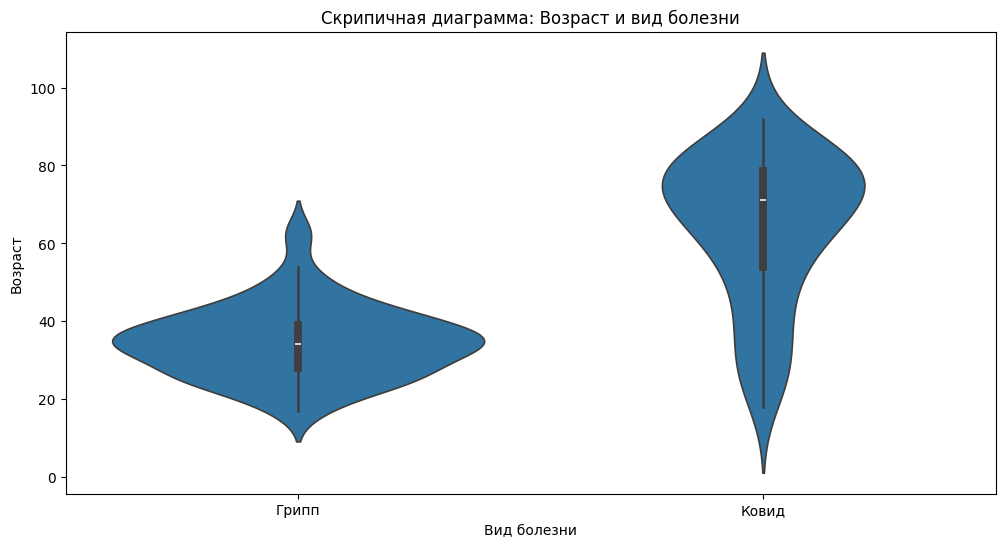

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('Очищенные_данные.xlsx')


# Построение скрипичной диаграммы без создания нового столбца
plt.figure(figsize=(12, 6))
sns.violinplot(
    x=data['Шифр'].apply(lambda code: 'Грипп' if 'Г' in code.upper() else 'Ковид' if 'КФ' in code.upper() else 'Другое'),
    y=data['Возраст']
)
plt.xlabel('Вид болезни')
plt.ylabel('Возраст')
plt.title('Скрипичная диаграмма: Возраст и вид болезни')
plt.show()



Код возраста и сатурация

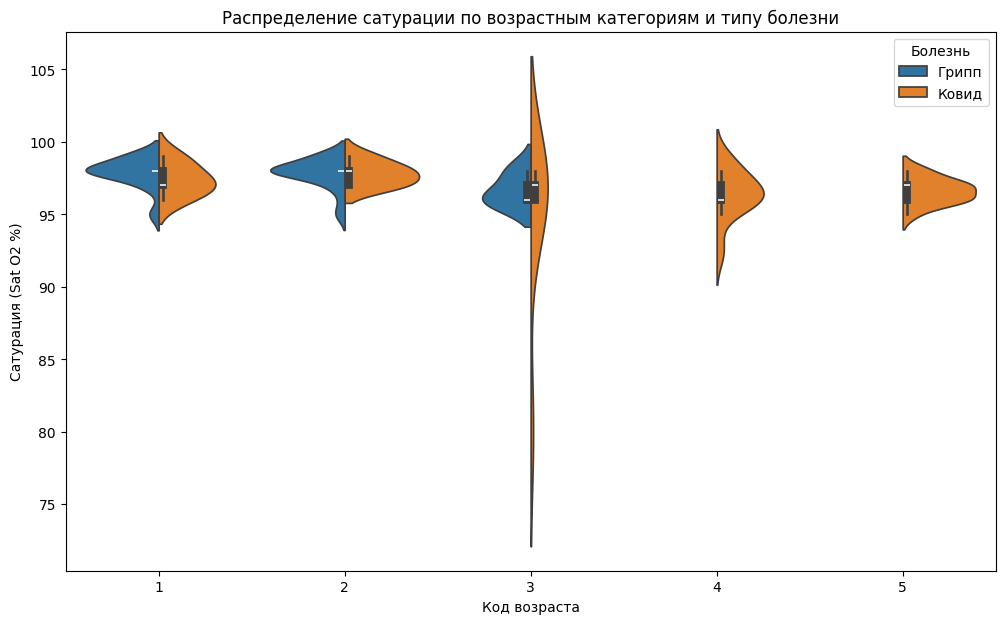

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_excel('Очищенные_данные.xlsx')

# Добавляем столбец для категории болезни по шифру
data['Болезнь'] = data['Шифр'].apply(lambda x: 'Грипп' if 'Г' in str(x) else ('Ковид' if 'кф' in str(x).lower() else 'Не указано'))

# Строим скрипичную диаграмму зависимости сатурации от кода возраста для каждого типа болезни
plt.figure(figsize=(12, 7))
sns.violinplot(x='Код возраста', y='Sat O2 %', hue='Болезнь', data=data, split=True)

# Настройки графика
plt.title('Распределение сатурации по возрастным категориям и типу болезни')
plt.xlabel('Код возраста')
plt.ylabel('Сатурация (Sat O2 %)')
plt.show()


Диаграмма корреляций показателей свертывающей системы крови пациентов в зависимости от вида болезни

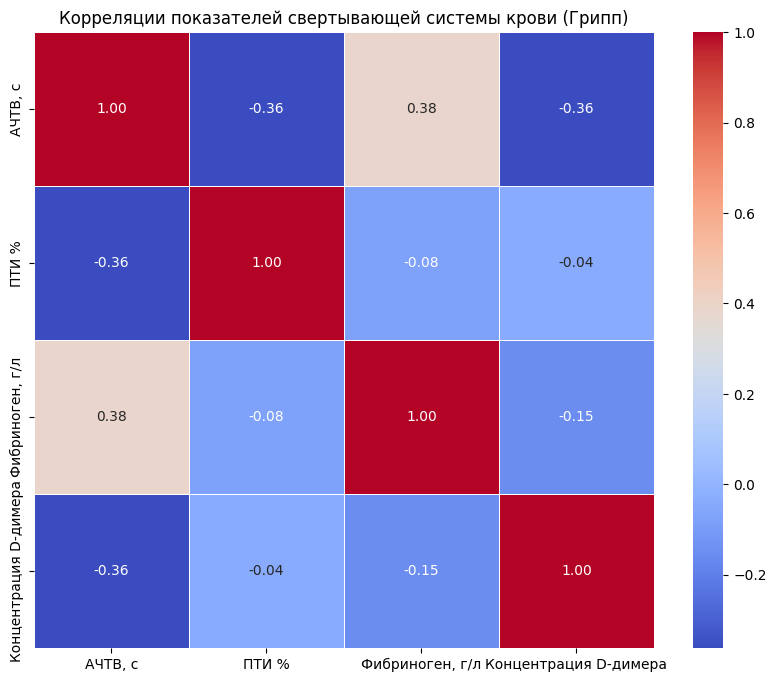

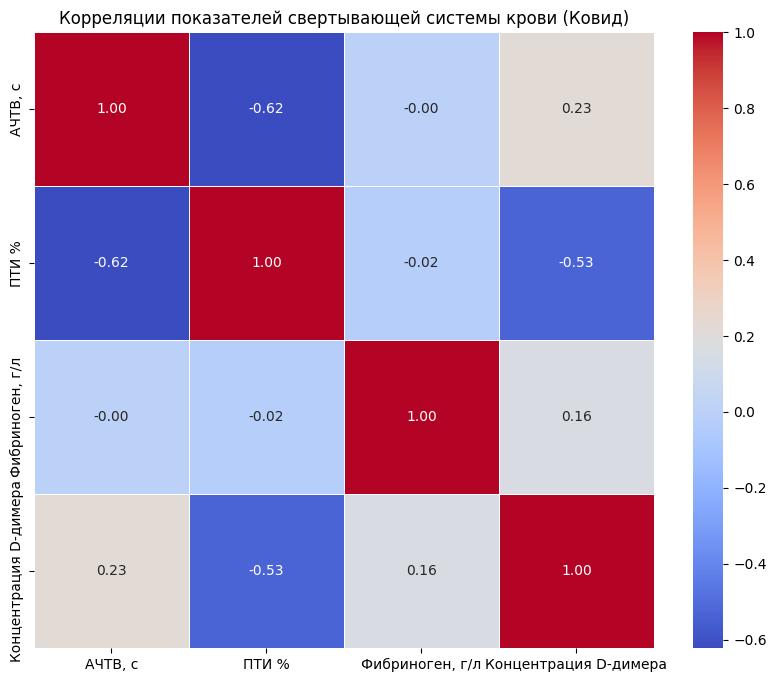

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные
data = pd.read_excel('Очищенные_данные.xlsx')

# Добавляем столбец для категории болезни по шифру
data['Болезнь'] = data['Шифр'].apply(lambda x: 'Грипп' if 'Г' in str(x) else ('Ковид' if 'кф' in str(x).lower() else 'Не указано'))

# Выбираем столбцы, относящиеся к показателям свертывающей системы крови
coagulation_columns = ['АЧТВ, с', 'ПТИ %', 'Фибриноген, г/л', 'Концентрация D-димера']

# Фильтруем данные по типу болезни (грипп или ковид)
data_gripp = data[data['Болезнь'] == 'Грипп'][coagulation_columns]
data_kovid = data[data['Болезнь'] == 'Ковид'][coagulation_columns]

# Строим корреляционную тепловую карту для гриппа
plt.figure(figsize=(10, 8))
correlation_gripp = data_gripp.corr()
sns.heatmap(correlation_gripp, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляции показателей свертывающей системы крови (Грипп)')
plt.show()

# Строим корреляционную тепловую карту для ковида
plt.figure(figsize=(10, 8))
correlation_kovid = data_kovid.corr()
sns.heatmap(correlation_kovid, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляции показателей свертывающей системы крови (Ковид)')
plt.show()
